<a href="https://colab.research.google.com/github/PrajsPrabs/UpgradBACaseStudy/blob/main/EComm1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [492]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Reading the Data

In [493]:
EleData = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/ConsumerElectronics.csv")


# Data Understanding

In [494]:
EleData = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/ConsumerElectronics.csv")

In [495]:
EleData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   fsn_id                           1648824 non-null  object 
 1   order_date                       1648824 non-null  object 
 2   Year                             1648824 non-null  int64  
 3   Month                            1648824 non-null  int64  
 4   order_id                         1648824 non-null  float64
 5   order_item_id                    1648824 non-null  float64
 6   gmv                              1648824 non-null  object 
 7   units                            1648824 non-null  int64  
 8   deliverybdays                    1648824 non-null  object 
 9   deliverycdays                    1648824 non-null  object 
 10  s1_fact.order_payment_type       1648824 non-null  object 
 11  sla                              1648824 non-null 

In [496]:
## correct the datatypes
EleData['order_date']=pd.to_datetime(EleData['order_date'])
EleData['Year']=EleData['Year'].astype(str)
EleData['Month']=EleData['Month'].astype(str)

In [497]:
##  MMM is on subcategories : 'Camera','HomeAudio','GamingAccessory' hence dropping other rows
EleData.product_analytic_sub_category.value_counts()
EleData = EleData.loc[EleData.product_analytic_sub_category.isin(['Camera','HomeAudio','GamingAccessory'])]
EleData.product_analytic_sub_category.value_counts()


GamingAccessory    201899
HomeAudio          124860
Camera             101172
Name: product_analytic_sub_category, dtype: int64

In [498]:
## dates between July 2015 to June 2016
EleData=EleData.loc[(EleData.order_date >= '2015-07-01') &(EleData.order_date<'2016-07-01')]

In [499]:
EleData.describe()

order_id  order_item_id          units            sla  \
count  4.277750e+05   4.277750e+05  427775.000000  427775.000000   
mean   2.845230e+15   1.321295e+16       1.021941       5.469492   
std    1.268358e+15   5.458201e+16       0.222356       2.658440   
min    1.528676e+08   2.072001e+08       1.000000       0.000000   
25%    1.600075e+15   1.603993e+15       1.000000       4.000000   
50%    2.611817e+15   2.618906e+15       1.000000       5.000000   
75%    3.610341e+15   4.397844e+15       1.000000       7.000000   
max    4.641665e+15   3.000373e+17      19.000000      60.000000   

         product_mrp  product_procurement_sla  
count  427775.000000            427775.000000  
mean     8297.878123                 2.578220  
std     13781.504587                 1.960068  
min         0.000000                -1.000000  
25%       900.000000                 1.000000  
50%      2000.000000                 2.000000  
75%      6900.000000                 3.000000  
max    280000.000000                15.000000

In [500]:
## removing duplicate order items records
EleData= EleData.drop_duplicates(subset=["order_id","order_item_id"],keep='first')

In [501]:
# EleData.info()
Ele_obj_columns=[]
for i in EleData.columns:
  if EleData[i].dtype=='object':
    Ele_obj_columns.append(i)

In [502]:
## removing duplicates using strip and lower and keep first instance
Ele_obj_columns
EleData[Ele_obj_columns]=EleData[Ele_obj_columns].apply(lambda x : x.astype(str).str.strip())
EleData[Ele_obj_columns]=EleData[Ele_obj_columns].apply(lambda x : x.astype(str).str.lower())
EleData= EleData.drop_duplicates(keep='first')
EleData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396689 entries, 1598 to 1542378
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   fsn_id                           396689 non-null  object        
 1   order_date                       396689 non-null  datetime64[ns]
 2   Year                             396689 non-null  object        
 3   Month                            396689 non-null  object        
 4   order_id                         396689 non-null  float64       
 5   order_item_id                    396689 non-null  float64       
 6   gmv                              396689 non-null  object        
 7   units                            396689 non-null  int64         
 8   deliverybdays                    396689 non-null  object        
 9   deliverycdays                    396689 non-null  object        
 10  s1_fact.order_payment_type       396689 

In [503]:
EleData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396689 entries, 1598 to 1542378
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   fsn_id                           396689 non-null  object        
 1   order_date                       396689 non-null  datetime64[ns]
 2   Year                             396689 non-null  object        
 3   Month                            396689 non-null  object        
 4   order_id                         396689 non-null  float64       
 5   order_item_id                    396689 non-null  float64       
 6   gmv                              396689 non-null  object        
 7   units                            396689 non-null  int64         
 8   deliverybdays                    396689 non-null  object        
 9   deliverycdays                    396689 non-null  object        
 10  s1_fact.order_payment_type       396689 

# Data Cleaning

In [504]:
EleData.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 'deliverybdays', 'deliverycdays',
       's1_fact.order_payment_type', 'sla', 'cust_id', 'pincode',
       'product_analytic_super_category', 'product_analytic_category',
       'product_analytic_sub_category', 'product_analytic_vertical',
       'product_mrp', 'product_procurement_sla'],
      dtype='object')

In [505]:
## Year and Month

print(EleData.Year.value_counts())
print(EleData.Month.value_counts())

2016    217241
2015    179448
Name: Year, dtype: int64
10    52752
12    43314
1     41236
2     39987
3     38840
5     37301
11    35110
4     31092
6     28785
9     25571
7     22667
8        34
Name: Month, dtype: int64


In [506]:
## gmv
# EleData.gmv.isna().sum()
# print(EleData.loc[EleData.gmv==''].count())
# # # trying to impute using mrp

EleData=EleData[(EleData.gmv!='')]
EleData.gmv=EleData.gmv.astype(float)

In [507]:
# deliverybdays
EleData[EleData.deliverybdays=='\\N']
EleData.deliverybdays.replace('\\N','NA',inplace=True)
EleData.info()
EleData[EleData.deliverycdays=='\\N']
EleData.deliverycdays.replace('\\N','NA',inplace=True)
EleData.deliverybdays.value_counts()[0]/EleData.shape[0]
# --78% values are NA so dropping this column
EleData.deliverycdays.value_counts()[0]/EleData.shape[0]
# --78% values are NA so dropping this column
EleData.drop(["deliverybdays","deliverycdays"],1,inplace=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 395657 entries, 1598 to 1542378
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   fsn_id                           395657 non-null  object        
 1   order_date                       395657 non-null  datetime64[ns]
 2   Year                             395657 non-null  object        
 3   Month                            395657 non-null  object        
 4   order_id                         395657 non-null  float64       
 5   order_item_id                    395657 non-null  float64       
 6   gmv                              395657 non-null  float64       
 7   units                            395657 non-null  int64         
 8   deliverybdays                    395657 non-null  object        
 9   deliverycdays                    395657 non-null  object        
 10  s1_fact.order_payment_type       395657 

In [508]:
# order_paymeny_type
EleData["s1_fact.order_payment_type"].value_counts()
EleData.rename(columns={"s1_fact.order_payment_type":"order_payment_type"},inplace=True)
EleData.order_payment_type.value_counts()

cod        279237
prepaid    116420
Name: order_payment_type, dtype: int64

In [509]:
# sla
EleData.sla=EleData.sla.astype(int)
EleData[EleData.sla==0].shape[0]/EleData.shape[0]
## impute with median
EleData[EleData.sla==0]['sla'] = EleData.sla.median()


In [510]:
EleData.pincode.value_counts()
## Too many groups , plus format isnt correct so drooping it
EleData.drop(["pincode"],1,inplace=True)

In [511]:
## product analytics category , sub category and vertical

print(EleData.product_analytic_category.value_counts())
print(EleData.product_analytic_sub_category.value_counts())
print(EleData.product_analytic_vertical.value_counts())
##droppning supercategory as its having only 1 value
EleData.drop(['product_analytic_super_category'],1,inplace=True)

gaminghardware        185057
entertainmentsmall    114716
camera                 95884
Name: product_analytic_category, dtype: int64
gamingaccessory    185057
homeaudio          114716
camera              95884
Name: product_analytic_sub_category, dtype: int64
homeaudiospeaker         79638
gamingheadset            59564
dslr                     54956
gamepad                  52821
point & shoot            35422
gamingmouse              34741
fmradio                  25315
gamingaccessorykit        7613
tvoutcableaccessory       6644
gamingkeyboard            6226
gamingmemorycard          5939
gamingmousepad            4173
voicerecorder             3402
gamingadapter             3037
joystickgamingwheel       2672
boombox                   2456
instant cameras           2415
sportsandaction           2171
dock                      1889
hifisystem                1400
motioncontroller          1039
camcorders                 920
gamingspeaker              496
dockingstation            

In [512]:
## vertical grouping
print(EleData[['product_analytic_sub_category','product_analytic_vertical']].value_counts().reset_index().sort_values(by=['product_analytic_sub_category',0]))
vertical1=(EleData.product_analytic_vertical.value_counts()<20000)[EleData.product_analytic_vertical.value_counts()<20000].index
EleData.product_analytic_vertical.value_counts()<20000

   product_analytic_sub_category product_analytic_vertical      0
21                        camera                camcorders    920
17                        camera           sportsandaction   2171
16                        camera           instant cameras   2415
4                         camera             point & shoot  35422
2                         camera                      dslr  54956
31               gamingaccessory          gamecontrolmount      1
29               gamingaccessory                 gaminggun      3
27               gamingaccessory     gamingchargingstation     43
26               gamingaccessory                coolingpad     45
22               gamingaccessory             gamingspeaker    496
20               gamingaccessory          motioncontroller   1039
14               gamingaccessory       joystickgamingwheel   2672
13               gamingaccessory             gamingadapter   3037
11               gamingaccessory            gamingmousepad   4173
10        

homeaudiospeaker         False
gamingheadset            False
dslr                     False
gamepad                  False
point & shoot            False
gamingmouse              False
fmradio                  False
gamingaccessorykit        True
tvoutcableaccessory       True
gamingkeyboard            True
gamingmemorycard          True
gamingmousepad            True
voicerecorder             True
gamingadapter             True
joystickgamingwheel       True
boombox                   True
instant cameras           True
sportsandaction           True
dock                      True
hifisystem                True
motioncontroller          True
camcorders                True
gamingspeaker             True
dockingstation            True
djcontroller              True
soundmixer                True
coolingpad                True
gamingchargingstation     True
slingbox                  True
gaminggun                 True
karaokeplayer             True
gamecontrolmount          True
Name: pr

In [513]:
EleData["product_analytic_vertical_derived"]=EleData.product_analytic_vertical.replace(vertical1,"Others")

In [514]:
## product MRP
EleData.product_mrp.astype(float)


1598        3999.0
1599        3999.0
1600        3999.0
1601        3999.0
1602        3999.0
            ...   
1542374    10500.0
1542375    10500.0
1542376    10500.0
1542377    10500.0
1542378    10500.0
Name: product_mrp, Length: 395657, dtype: float64

# Data Analysis and feature extraction

In [515]:
EleData.Year=EleData.Year.astype(object)
EleData.Month=EleData.Month.astype(object)
EleData.columns


Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 'order_payment_type', 'sla', 'cust_id',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical', 'product_mrp', 'product_procurement_sla',
       'product_analytic_vertical_derived'],
      dtype='object')

In [516]:
## Deleting columns which wont be required
EleData2=EleData.drop(['fsn_id','cust_id','product_analytic_vertical','order_id'],1)


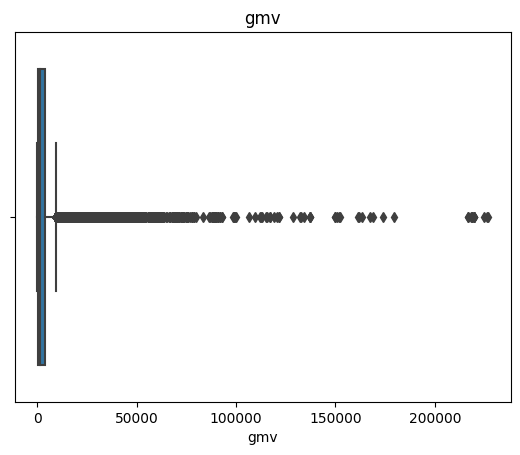

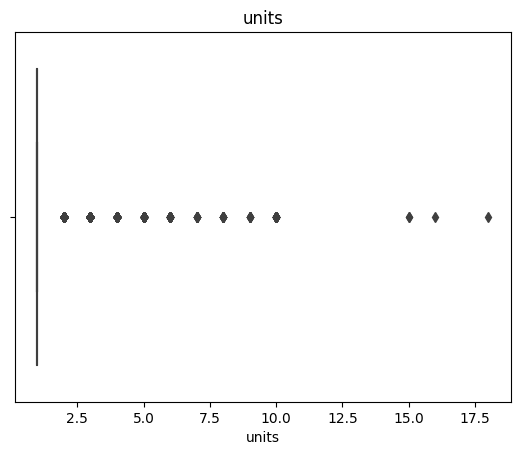

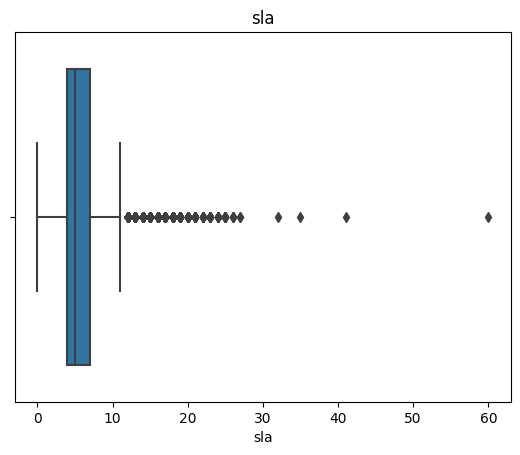

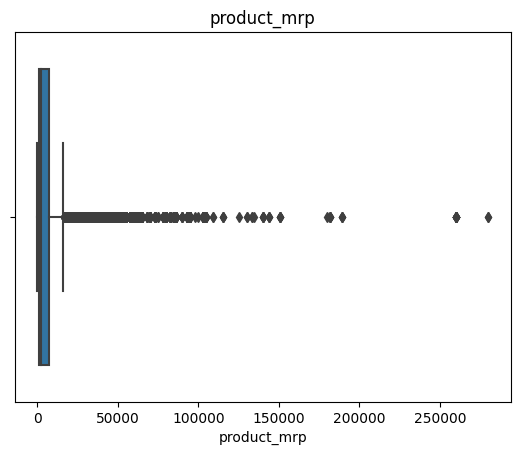

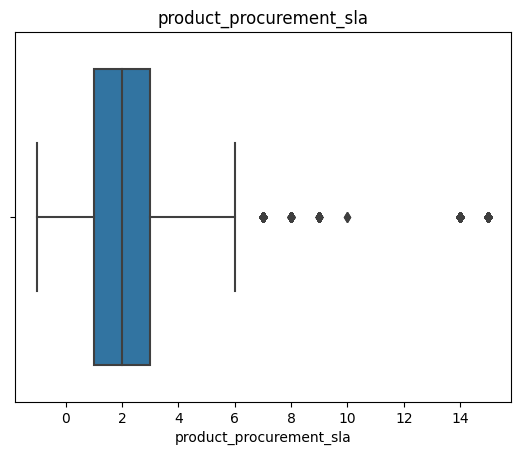

In [517]:
## integer column handling
num=[]
obj=[]
for i in EleData2.columns:
  if EleData2[i].dtype=='float64':
    num.append(i)
  if EleData2[i].dtype=='int64':
    num.append(i)
  if EleData2[i].dtype=='object':
    obj.append(i)


num.remove('order_item_id')

x=1
for i in num:
  plt.title(i)
  sns.boxplot(x=EleData2[i])
  plt.show()
  x=x+1

## we will treat outliers later based on sub categories

In [518]:
EleData2.columns
EleData2.order_date=EleData2['order_date'].dt.date

In [519]:
## Week
EleData2['week']=((pd.to_datetime(EleData2['order_date'])-pd.to_datetime('2015-07-01'))/7)
EleData2['week']=EleData2['week'].apply(lambda x: x.days+1)
EleData2.loc[:,['order_date','week']]
EleData2.week.value_counts()

16    28442
44    13958
19    13225
30    12482
36    12240
25    12165
34    12092
48    11047
26     9762
32     9499
37     9451
23     9406
28     9009
35     9000
24     8572
27     8469
31     8251
33     8234
46     8168
17     8003
18     7957
47     7703
29     7569
22     7442
45     7425
49     7367
40     7159
41     7121
38     7101
50     6966
39     6799
20     6576
51     6530
3      6431
10     6342
15     6243
2      6205
52     6198
13     6141
21     5921
4      5691
12     5595
11     5593
14     5520
42     5282
43     2532
5      2531
53     1724
1      1578
9       933
6         4
8         2
7         1
Name: week, dtype: int64

In [520]:
# 2. Listing Price and Pricing Discounts
EleData2=EleData2[EleData.product_mrp!=0]
EleData2['gmv']=EleData2.gmv.astype(float)
EleData2['listing_price'] = ((EleData2.gmv)/EleData2.units).round(2)
EleData2['discount_per']=(((EleData2['product_mrp']-EleData2['listing_price'])/EleData2['product_mrp'])).round(2)
EleData2.discount_per.describe()
EleData2[EleData2.product_mrp < EleData2.listing_price]
EleData2=EleData2[EleData2.product_mrp >= EleData2.listing_price]

In [521]:
## joining rest of the data and calculating other variables from it
# ProdList
# Investment
# MonthlyNPS
# SalesCal
# Ont2015
# Ont2016


In [522]:
# ## Sales
SalesCal = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/Media data and other information.xlsx",sheet_name="Special Sale Calendar")

# SalesCal.head(20)

SalesCal1=pd.DataFrame(['2015-07-18','2015-07-19','2015-08-15','2015-08-16','2015-08-17','2015-08-28','2015-08-29','2015-08-30',
                        '2015-10-15','2015-10-16','2015-10-17','2015-11-07','2015-11-08','2015-11-09','2015-11-10','2015-11-11','2015-11-12',
                        '2015-11-13','2015-11-14','2015-12-25','2015-12-26','2015-12-27','2015-12-28','2015-12-29','2015-12-30','2015-12-31',
                        '2016-01-01','2016-01-02','2016-01-03','2016-01-20','2016-01-21','2016-01-22','2016-02-01','2016-02-02','2016-02-20','2016-02-21',
                       '2016-02-14','2016-02-15','2016-03-07','2016-03-08','2016-03-09','2016-05-25','2016-05-26','2016-05-27'],columns=["sale_date"])

# SalesCal1=SalesCal1[0].to_list()
# SalesCal1
EleData2.order_date=EleData2.order_date.apply(lambda x :str(x).strip())
EleData2=pd.merge(EleData2,SalesCal1,left_on='order_date',right_on='sale_date',how='left')
# # test[~test["date"].isna()]
# EleData2['sale_date'].value_counts()

In [523]:
### Weather infomation canada
Ont2015=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/ONTARIO-2015.xlsx",header=24)
Ont2016=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/ONTARIO-2016.xlsx",header=24)
Ont_Weather = pd.concat([Ont2015,Ont2016])
Ont_Weather=Ont_Weather.loc[(Ont_Weather['Date/Time']>='2015-07-01') &(Ont_Weather['Date/Time']<'2016-07-01')]

# Ont2015['Max Temp Flag'].value_counts()
todrop= (Ont_Weather.isnull().sum()/Ont_Weather.shape[0]).reset_index()
todrop
req=todrop.loc[todrop[0]<0.50,:]['index'].to_list()
Ont_Weather=Ont_Weather[req]
Ont_Weather =Ont_Weather.drop(['Total Precip (mm)','Snow on Grnd (cm)','Data Quality'],1)

# Ont_Weather
Ont_Weather['week']=((pd.to_datetime(Ont_Weather['Date/Time'])-pd.to_datetime('2015-07-01'))/7)
Ont_Weather['week']=Ont_Weather['week'].apply(lambda x: x.days+1)
Ont_Weather['Date/Time']=Ont_Weather['Date/Time'].dt.date
weekly_kpis=Ont_Weather.groupby('week').mean().reset_index()

In [524]:
weekly_kpis.head()
weekly_kpis.drop(['Year','Month'],1,inplace=True)

In [525]:

weekly_kpis=weekly_kpis.sort_values(by='week')
Ont_Weather.info()
weekly_kpis.rename(columns={"Max Temp (°C)":"max_temp_c","Min Temp (°C)":"mon_temp_c","Mean Temp (°C)":"mean_temp_c",
                            "Heat Deg Days (°C)":"heat_deg_c","Cool Deg Days (°C)":"cool_deg_c","Total Rain (mm)":"total_rain",
                            "Total Snow (cm)":"total_snow"},inplace=True)
## filling missing values with fronyfill method as temp is time series
weekly_kpis.ffill(inplace=True)
weekly_kpis.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 181 to 181
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date/Time           366 non-null    object 
 1   Year                366 non-null    int64  
 2   Month               366 non-null    int64  
 3   Day                 366 non-null    int64  
 4   Max Temp (°C)       208 non-null    float64
 5   Min Temp (°C)       191 non-null    float64
 6   Mean Temp (°C)      191 non-null    float64
 7   Heat Deg Days (°C)  191 non-null    float64
 8   Cool Deg Days (°C)  191 non-null    float64
 9   Total Rain (mm)     215 non-null    float64
 10  Total Snow (cm)     215 non-null    float64
 11  week                366 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 37.2+ KB


week           0
Day            0
max_temp_c     0
mon_temp_c     0
mean_temp_c    0
heat_deg_c     0
cool_deg_c     0
total_rain     0
total_snow     0
dtype: int64

In [526]:
# MonthlyNPS
MonthlyNPS = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/Media data and other information.xlsx",sheet_name="Monthly NPS Score")
# ?pd.melt
MonthlyNPS.head()
NPS = pd.melt(MonthlyNPS,id_vars="Unnamed: 0",value_vars=["July'15","Aug'15","Sept'15","Oct'15","Nov'15",
                                                  "Dec'15","Jan'16","Feb'16","Mar'16","Apr'16",
                                                  "May'16","June'16"],).reset_index()
# ?pd.pivot
NPS.rename(columns={"Unnamed: 0":"Header","variable":"Month1","value":"Value"},inplace=True)
# NPS
# NPS
NPS['Month']=0
NPS.loc[NPS["Month1"].str.startswith("July"), "Month"] = 7
NPS.loc[NPS["Month1"].str.startswith("Aug"), "Month"] = 8
NPS.loc[NPS["Month1"].str.startswith("Sept"), "Month"] = 9
NPS.loc[NPS["Month1"].str.startswith("Oct"), "Month"] = 10
NPS.loc[NPS["Month1"].str.startswith("Nov"), "Month"] = 11
NPS.loc[NPS["Month1"].str.startswith("Dec"), "Month"] = 12
NPS.loc[NPS["Month1"].str.startswith("Jan"), "Month"] = 1
NPS.loc[NPS["Month1"].str.startswith("Feb"), "Month"] = 2
NPS.loc[NPS["Month1"].str.startswith("Mar"), "Month"] = 3
NPS.loc[NPS["Month1"].str.startswith("Apr"), "Month"] = 4
NPS.loc[NPS["Month1"].str.startswith("May"), "Month"] = 5
NPS.loc[NPS["Month1"].str.startswith("June"), "Month"] = 6
NPS['Year'] = pd.Series([2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016])
NPS['Month']=NPS['Month'].astype(str)
NPS.drop("index",1,inplace=True)

# print(NPS)
# print(NPS)
NPS


Header   Month1        Value Month  Year
0           NPS  July'15    54.599588     7  2015
1   Stock Index  July'15  1177.000000     7  2015
2           NPS   Aug'15    59.987101     8  2015
3   Stock Index   Aug'15  1206.000000     8  2015
4           NPS  Sept'15    46.925419     9  2015
5   Stock Index  Sept'15  1101.000000     9  2015
6           NPS   Oct'15    44.398389    10  2015
7   Stock Index   Oct'15  1210.000000    10  2015
8           NPS   Nov'15    47.000000    11  2015
9   Stock Index   Nov'15  1233.000000    11  2015
10          NPS   Dec'15    45.800000    12  2015
11  Stock Index   Dec'15  1038.000000    12  2015
12          NPS   Jan'16    47.093031     1  2016
13  Stock Index   Jan'16  1052.000000     1  2016
14          NPS   Feb'16    50.327406     2  2016
15  Stock Index   Feb'16  1222.000000     2  2016
16          NPS   Mar'16    49.020550     3  2016
17  Stock Index   Mar'16  1015.000000     3  2016
18          NPS   Apr'16    51.827605     4  2016
19  Stock Index   Apr'16  1242.000000     4  2016
20          NPS   May'16    47.306951     5  2016
21  Stock Index   May'16  1228.000000     5  2016
22          NPS  June'16    50.516687     6  2016
23  Stock Index  June'16  1194.000000     6  2016

In [527]:
EleData2.rename(columns={"Year_x":"Year","Month_x":"Month"},inplace=True)
EleData2=pd.merge(EleData2,NPS.loc[NPS['Header']=='Stock Index'],how='left',on='Month')
EleData2=pd.merge(EleData2,NPS.loc[NPS['Header']=='NPS'],how='left',on='Month')
# EleData2['Year_x'].count()
EleData2.rename(columns={"Value_x":"Stock_Index","Value_y":"NPS"},inplace=True)


In [528]:
# lets clean the frame with _x _y coluumns
# EleData2.columns
EleData2['Year']=EleData2['Year_x']
# EleData2['week']=EleData2['week_x']

col=[]
for i in EleData2.columns:
  if (str(i).endswith("_x")) | (str(i).endswith("_y") | (str(i)=='key_0')):
    col.append(i)

EleData2.drop(col,1,inplace=True)


In [529]:
EleData2.columns

Index(['order_date', 'Month', 'order_item_id', 'gmv', 'units',
       'order_payment_type', 'sla', 'product_analytic_category',
       'product_analytic_sub_category', 'product_mrp',
       'product_procurement_sla', 'product_analytic_vertical_derived', 'week',
       'listing_price', 'discount_per', 'sale_date', 'Stock_Index', 'NPS',
       'Year'],
      dtype='object')

In [530]:
### Investments

Investment = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/Media data and other information.xlsx",header=2,sheet_name="Media Investment")
Investment.isna().sum()
Investment.fillna(0,inplace=True)
Investment.drop(["Unnamed: 0"],1,inplace=True)
Investment=Investment.loc[Investment.Year!=0]
Investment.head()
Investment['month_start'] = pd.to_datetime(Investment[['Year', 'Month']].assign(DAY=1))
Investment.set_index('month_start',inplace=True)


In [531]:
# Investment.info()
july=Investment.index[-1] + pd.offsets.MonthBegin(1)
july

Timestamp('2016-07-01 00:00:00')

In [532]:
Investment =Investment.append(Investment.iloc[[-1]].rename({Investment.index[-1]: july}))
Inv2=Investment.resample("W").ffill().reset_index()
Inv2.set_index('month_start',inplace=True)
# Inv2=Inv2.iloc[:-1]
# EleData2['week'].value_counts()
Inv2.head()
Inv2.rename(columns={' Affiliates':'Affiliates'},inplace=True)


In [533]:
Inv2['Total Investment'] = Inv2['Total Investment']/Inv2.resample('MS')['Total Investment'].transform('size')
Inv2['TV'] = Inv2['TV']/Inv2.resample('MS')['TV'].transform('size')
Inv2['Digital'] = Inv2['Digital'] /Inv2.resample('MS')['Digital'].transform('size')
Inv2['Sponsorship'] = Inv2['Sponsorship']/Inv2.resample('MS')['Sponsorship'].transform('size')
Inv2['Content Marketing'] = Inv2['Content Marketing']/Inv2.resample('MS')['Content Marketing'].transform('size')
Inv2['Online marketing'] = Inv2['Online marketing']/ Inv2.resample('MS')['Online marketing'].transform('size')
Inv2['Affiliates'] = Inv2['Affiliates']/ Inv2.resample('MS')['Affiliates'].transform('size')
Inv2['SEM'] = Inv2['SEM']/Inv2.resample('MS')['SEM'].transform('size')
Inv2['Radio'] = Inv2['Radio']/Inv2.resample('MS')['Radio'].transform('size')
Inv2['Other'] = Inv2['Other']/Inv2.resample('MS')['Other'].transform('size')



In [534]:
## aDstock
# EleData3.columns
# considering 0.5 decay
ad = ['Total Investment', 'TV', 'Digital','Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates','SEM', 'Radio', 'Other']
def adstock(channel):
  Inv_ad=[]
  for i in range(0,(len(Inv2))):
    if i==0:
      Inv_ad.append(Inv2.iloc[i][channel].round(2))
    else:
      Inv_ad.append((Inv2.iloc[i][channel]+ (0.5 * Inv2.iloc[i-1][channel])).round(2))
  return Inv_ad


In [535]:
Inv2['Total_Investment_AD']=adstock("Total Investment")
Inv2['TV_AD']=adstock("TV")
Inv2['Digital_AD']=adstock("Digital")
Inv2['Content_Marketing_AD']=adstock("Content Marketing")
Inv2['Sponsorship_AD']=adstock("Sponsorship")
Inv2['Online_marketing_AD']=adstock("Online marketing")
Inv2['Affiliates_AD']=adstock("Affiliates")
Inv2['SEM_AD']=adstock("SEM")
Inv2['Radio_AD']=adstock("Radio")
Inv2['Other_AD']=adstock("Other")


In [536]:
Inv2['week']=nm.arange(1,54)
weekly_kpis=pd.merge(weekly_kpis,Inv2,on='week')

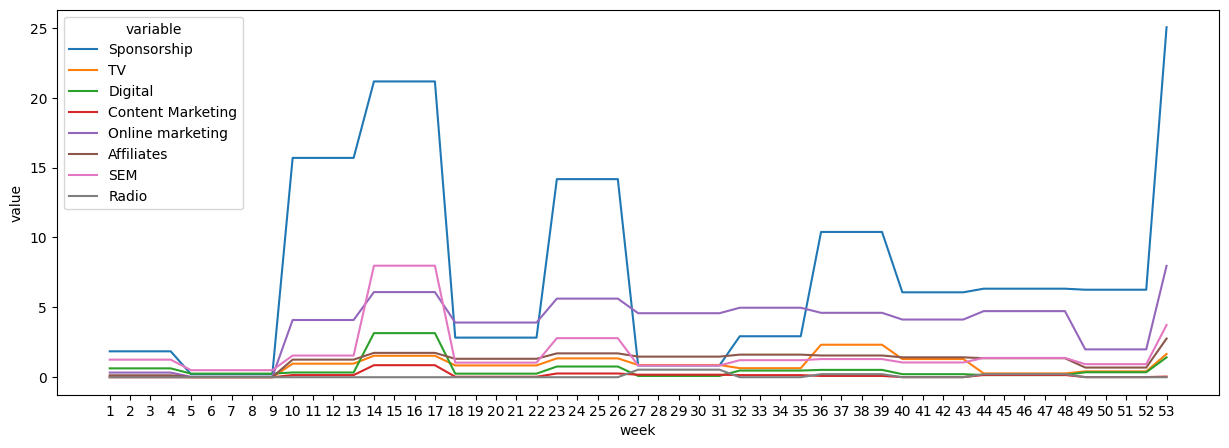

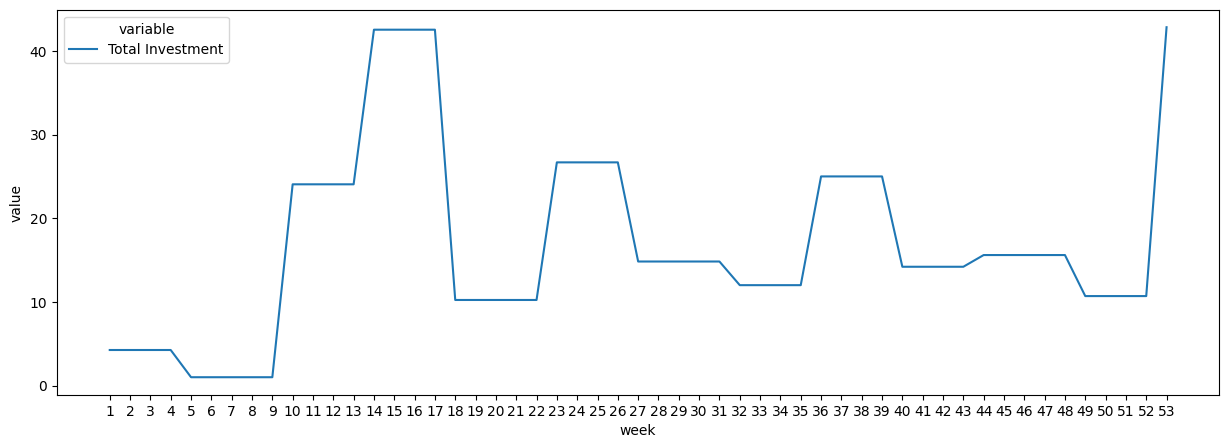

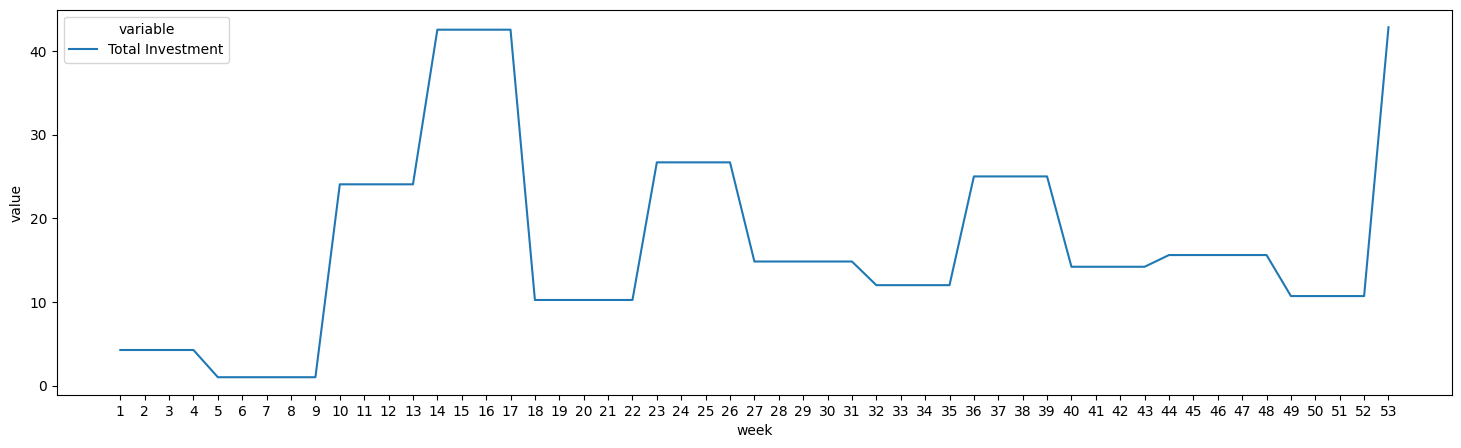

In [537]:
markinv = ['week', 'Sponsorship','TV','Digital', 'Content Marketing', 'Online marketing','Affiliates', 'SEM', 'Radio']

plt.figure(figsize=(15,5))
sns.lineplot(x='week',y='value',data=pd.melt(Inv2[markinv],['week']),hue='variable')
plt.xticks(Inv2['week'])
plt.show()

plt.figure(figsize=(15,5))
sns.lineplot(x='week',y='value',data=pd.melt(Inv2[['Total Investment','week']],['week']),hue='variable')
plt.xticks(Inv2['week'])
plt.show()

plt.figure(figsize=(18,5))
sns.lineplot(x='week',y='value',data=pd.melt(Inv2[['Total Investment','week']],['week']),hue='variable')
plt.xticks(Inv2['week'])
plt.show()



In [538]:
## Pay Date 1st and 15th
EleData2.order_date=pd.to_datetime(EleData2.order_date).dt.date
EleData2["pay_date_flag"]=EleData2['order_date'].apply(lambda x : 1 if ((x).day==15)|(pd.to_datetime(x).is_month_end) else 0)


In [539]:
# holiday flag
import holidays
holidays=pd.DataFrame(pd.Series(holidays.CA(prov='ON',years=[2015,2016]))).reset_index()
holidays=holidays.rename(columns={'index':'Holiday_flag'})
holidays=holidays.drop(0,axis=1)
holidays['Holiday_flag']=pd.to_datetime(holidays['Holiday_flag'], dayfirst=True)
holidays.info()
holidays['Holiday_flag']=holidays['Holiday_flag'].dt.date


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Holiday_flag  18 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 272.0 bytes


In [540]:
EleData3=pd.merge(EleData2,holidays,how='left',left_on='order_date',right_on='Holiday_flag').fillna(0)

In [541]:
## payment type
EleData3.order_payment_type= EleData3.order_payment_type.apply(lambda x : 1 if x=='cod' else 0)


In [542]:
EleData3.pay_date_flag.value_counts()

0    362012
1     23984
Name: pay_date_flag, dtype: int64

In [543]:
df_prod=EleData3.groupby(['product_analytic_sub_category','product_analytic_vertical_derived'])['gmv'].sum()
df_prod=pd.DataFrame(df_prod.reset_index())
# df_prod.rename(columns={0:"count"},inplace=True)

In [544]:
df_prod

product_analytic_sub_category product_analytic_vertical_derived  \
0                        camera                            Others   
1                        camera                              dslr   
2                        camera                     point & shoot   
3               gamingaccessory                            Others   
4               gamingaccessory                           gamepad   
5               gamingaccessory                     gamingheadset   
6               gamingaccessory                       gamingmouse   
7                     homeaudio                            Others   
8                     homeaudio                           fmradio   
9                     homeaudio                  homeaudiospeaker   

            gmv  
0  4.568340e+07  
1  1.378907e+09  
2  2.587350e+08  
3  3.530583e+07  
4  6.082473e+07  
5  3.145047e+07  
6  2.561555e+07  
7  2.799037e+07  
8  1.871460e+07  
9  1.938923e+08

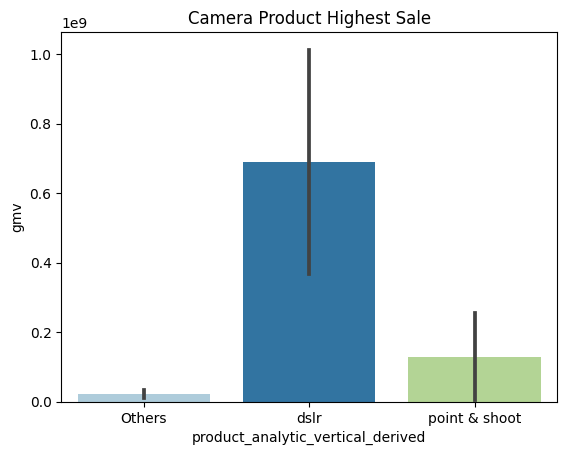

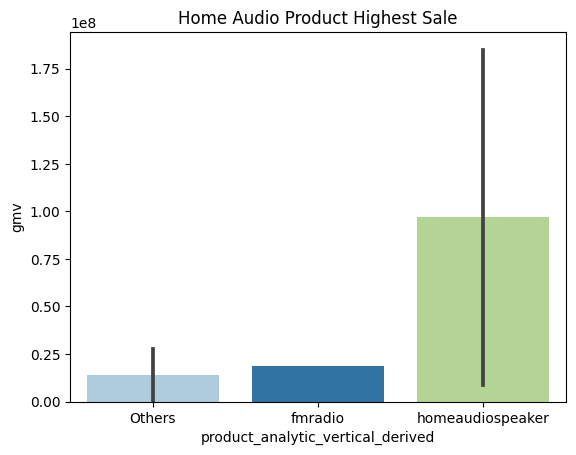

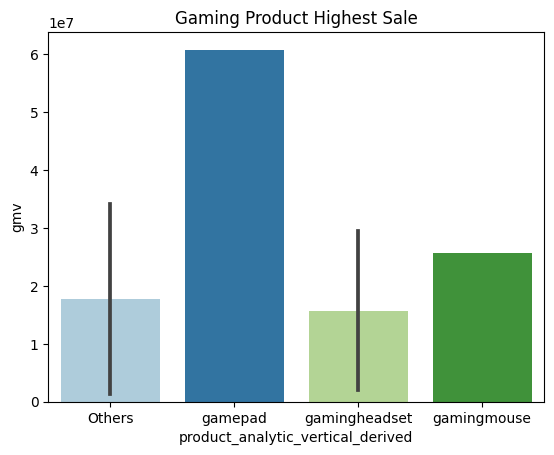

In [142]:
# df_prod.sort_values('product_analytic_sub_category')
sns.set_palette("Paired")
sns.barplot(data = df_prod[df_prod.product_analytic_sub_category=='camera'] , x='product_analytic_vertical_derived' ,y='gmv')
plt.title("Camera Product Highest Sale")
plt.show()

sns.set_palette("Paired")
sns.barplot(data = df_prod[df_prod.product_analytic_sub_category=='homeaudio'] , x='product_analytic_vertical_derived',y='gmv' )
plt.title("Home Audio Product Highest Sale")
plt.show()

sns.set_palette("Paired")
sns.barplot(data = df_prod[df_prod.product_analytic_sub_category=='gamingaccessory'] , x='product_analytic_vertical_derived',y='gmv')
plt.title("Gaming Product Highest Sale")
plt.show()

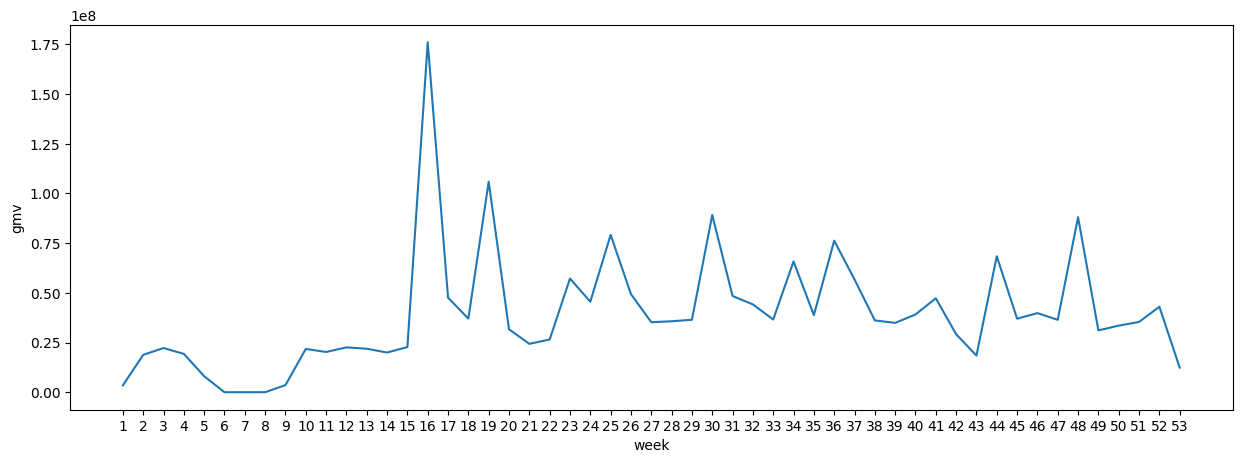

In [63]:
wowgmv=EleData3.groupby('week')['gmv'].sum().reset_index()
plt.figure(figsize=(15,5))
sns.lineplot(x=wowgmv.week,y=wowgmv.gmv)
plt.xticks(wowgmv['week'])
plt.show()


In [458]:
EleData3.columns

Index(['order_date', 'Month', 'order_item_id', 'gmv', 'units',
       'order_payment_type', 'sla', 'product_analytic_category',
       'product_analytic_sub_category', 'product_mrp',
       'product_procurement_sla', 'product_analytic_vertical_derived', 'week',
       'listing_price', 'discount_per', 'sale_date', 'Stock_Index', 'NPS',
       'Year', 'pay_date_flag', 'Holiday_flag'],
      dtype='object')

# Data Aggregation and analysis

Camera Analysis

In [619]:
##
camera=EleData3[EleData3.product_analytic_sub_category=='camera']
# camera.discount_per

In [620]:
cam_dummies = pd.get_dummies(camera['product_analytic_vertical_derived'])
camera=pd.concat([camera,cam_dummies],axis=1)


In [621]:
camera.drop(["product_analytic_sub_category","product_analytic_category"],1,inplace=True)

In [74]:
num
num.append('discount_per')
num.append('listing_price')

In [ ]:
camera[num].describe()

gmv         units           sla    product_mrp  \
count   94706.000000  94706.000000  94706.000000   94706.000000   
mean    17774.221234      1.011816      4.694370   27114.656505   
std     11423.619524      0.143116      2.399058   16922.490081   
min         0.000000      1.000000      0.000000     599.000000   
25%      6599.000000      1.000000      3.000000    8000.000000   
50%     19490.000000      1.000000      4.000000   34950.000000   
75%     24990.000000      1.000000      6.000000   40000.000000   
max    226947.000000      9.000000     35.000000  280000.000000   

       product_procurement_sla  discount_per  listing_price  
count             94706.000000  94706.000000   94706.000000  
mean                  2.777754      0.321185   17615.696167  
std                   2.490936      0.133102   11240.653746  
min                  -1.000000      0.000000       0.000000  
25%                   1.000000      0.210000    6552.000000  
50%                   3.000000      0.350000   19490.000000  
75%                   4.000000      0.430000   24990.000000  
max                  15.000000      1.000000  226947.000000

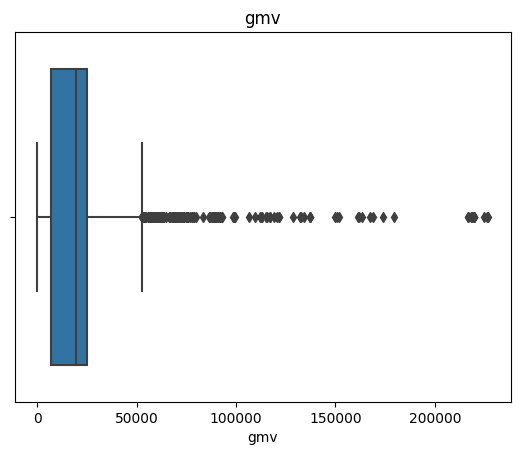

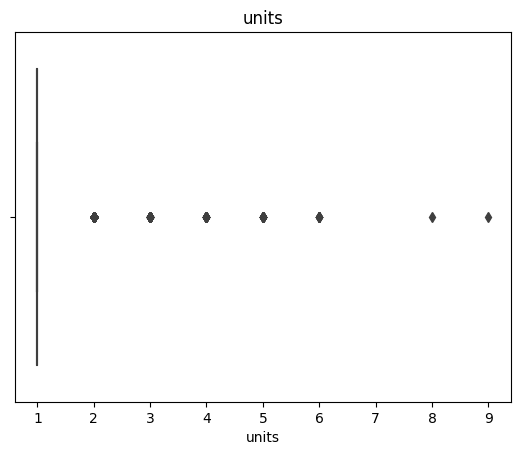

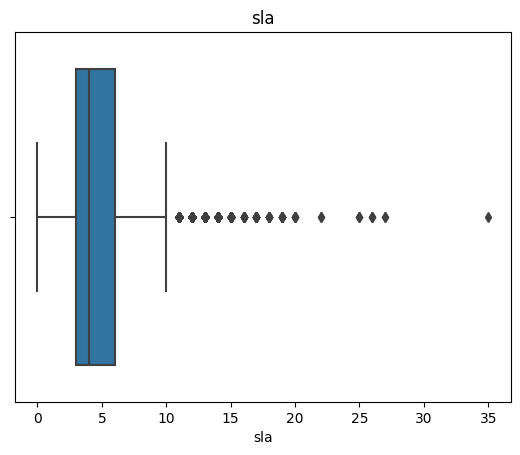

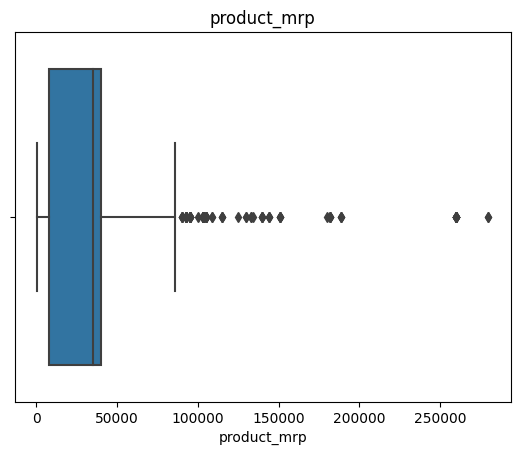

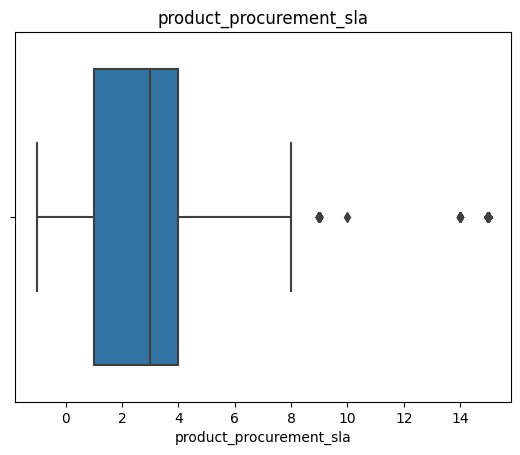

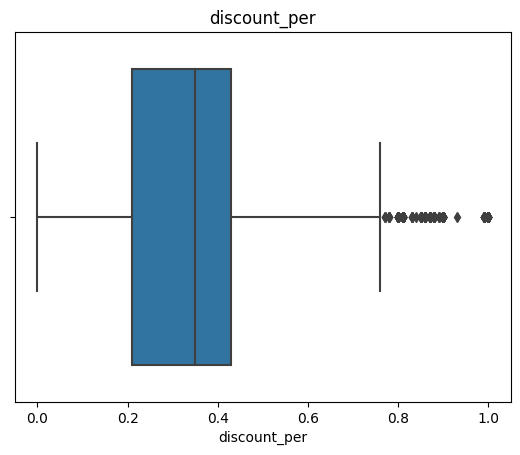

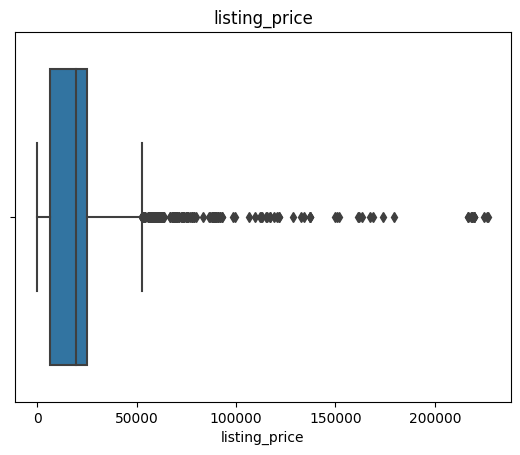

In [75]:
for i in num:
  sns.boxplot(x=camera[i])
  plt.title(i)
  plt.show()

In [622]:
q1=camera['product_mrp'].quantile(0.25)
q3=camera['product_mrp'].quantile(0.75)
iqr=q1+q3
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
# camera[camera['product_mrp']>112000]
camera.loc[camera['product_mrp']>112000,'product_mrp']=up
camera.loc[camera['product_mrp']<-64000,'product_mrp']=lw

-64000.0   112000.0


In [623]:
q1=camera['gmv'].quantile(0.25)
q3=camera['gmv'].quantile(0.75)
iqr=q1+q3
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
camera[camera['gmv']>72373.5]
camera.loc[camera['gmv']>72373.5,'gmv']=up
camera.loc[camera['gmv']<-40784.5,'gmv']=lw

-40784.5   72373.5


In [624]:
q1=camera['listing_price'].quantile(0.25)
q3=camera['listing_price'].quantile(0.75)
iqr=q1+q3
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
# camera[camera['listing_price']>72373.5]
camera.loc[camera['listing_price']>72303.0,'listing_price']=up
camera.loc[camera['listing_price']<-40761.0,'listing_price']=lw

-40761.0   72303.0


In [ ]:
camera['product_mrp'].describe()

count     94706.000000
mean      27081.116909
std       16634.542524
min         599.000000
25%        8000.000000
50%       34950.000000
75%       40000.000000
max      112000.000000
Name: product_mrp, dtype: float64

In [625]:
q1=camera['discount_per'].quantile(0.25)
q3=camera['discount_per'].quantile(0.75)
iqr=q1+q3
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
camera[camera['discount_per']>1.39]
q1=camera['sla'].quantile(0.25)
q3=camera['sla'].quantile(0.75)
iqr=q1+q3
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
camera.loc[camera['sla']>19.5,'sla']=up
camera.loc[camera['sla']<-10.5,'sla']=lw
q1=camera['product_procurement_sla'].quantile(0.25)
q3=camera['product_procurement_sla'].quantile(0.75)
iqr=q1+q3
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
camera.loc[camera['product_procurement_sla']>11.5,'product_procurement_sla']=up
camera.loc[camera['product_procurement_sla']<-6.5,'product_procurement_sla']=lw

-0.75   1.39
-10.5   19.5
-6.5   11.5


In [489]:
camera.columns

Index(['order_date', 'Month', 'order_item_id', 'gmv', 'units',
       'order_payment_type', 'sla', 'product_mrp', 'product_procurement_sla',
       'product_analytic_vertical_derived', 'week', 'listing_price',
       'discount_per', 'sale_date', 'Stock_Index', 'NPS', 'Year',
       'pay_date_flag', 'Holiday_flag', 'Others', 'dslr', 'point & shoot'],
      dtype='object')

In [635]:
camera_wk=camera.groupby(['week']).agg({"order_item_id":"nunique",'gmv':'sum','units':'sum','order_payment_type':'sum','sla':'mean',
                                        'product_mrp':'sum','product_procurement_sla':'mean','listing_price':'sum',
                                         'discount_per':'sum','Stock_Index':'max','NPS':'max','pay_date_flag':'max',
                                          "Holiday_flag": "nunique",'sale_date':"nunique","Others":"sum","dslr":"sum","point & shoot":"sum"}).round(2)

camera_wk=pd.merge(camera_wk,weekly_kpis,on='week')

camera_wk.rename(columns={"sales_date":"num_of_sales"},inplace=True)

In [636]:
camera_wk.drop(['heat_deg_c','mon_temp_c','Year','Month','Day'],1,inplace=True)

In [ ]:
camera_wk.head()

week  order_item_id         gmv  units  order_payment_type   sla  \
0     1            183   1683100.0    187                 126  5.00   
1     2            866  10726820.5    871                 527  4.83   
2     3           1053  14527023.0   1065                 620  4.32   
3     4            849  11893556.5    856                 533  4.33   
4     5            373   4812133.0    380                 243  4.16   

   product_mrp  product_procurement_sla  listing_price  discount_per  ...  \
0      2075447                     2.71      1660644.0         50.14  ...   
1     13665461                     2.74     10695536.0        218.17  ...   
2     18871251                     2.71     14462593.0        223.39  ...   
3     15014935                     2.44     11859463.0        165.17  ...   
4      6130674                     2.37      4760935.0         82.01  ...   

   total_snow  Total_Investment_AD  TV_AD  Digital_AD  Content_Marketing_AD  \
0         0.0                 4.27   0.05        0.63                   0.0   
1         0.0                 6.40   0.08        0.95                   0.0   
2         0.0                 6.40   0.08        0.95                   0.0   
3         0.0                 6.40   0.08        0.95                   0.0   
4         0.0                 3.15   0.03        0.57                   0.0   

   Online_marketing_AD  Affiliates_AD  SEM_AD  Radio_AD  Other_AD  
0                 0.33           0.14    1.26       0.0       0.0  
1                 0.50           0.21    1.88       0.0       0.0  
2                 0.50           0.21    1.88       0.0       0.0  
3                 0.50           0.21    1.88       0.0       0.0  
4                 0.19           0.08    1.13       0.0       0.0  

[5 rows x 29 columns]

In [637]:
camera_wk.order_payment_type.value_counts()
camera_wk.rename(columns={'order_item_id':'order_count',"order_payment_type":"order_payment_cod",'mon_temp_c':"min_temp_c","pay_date_flag":"pay_day_in_wk"},inplace=True)
camera_wk["cod_per"]=camera_wk["order_payment_cod"]/camera_wk["order_count"]
camera_wk.drop("order_payment_cod",1,inplace=True)
camera_wk.rename(columns={'sale_date':"num_of_sales"},inplace=True)


In [638]:
camera_wk.num_of_sales=camera_wk.num_of_sales-1
# camera_wk.head()

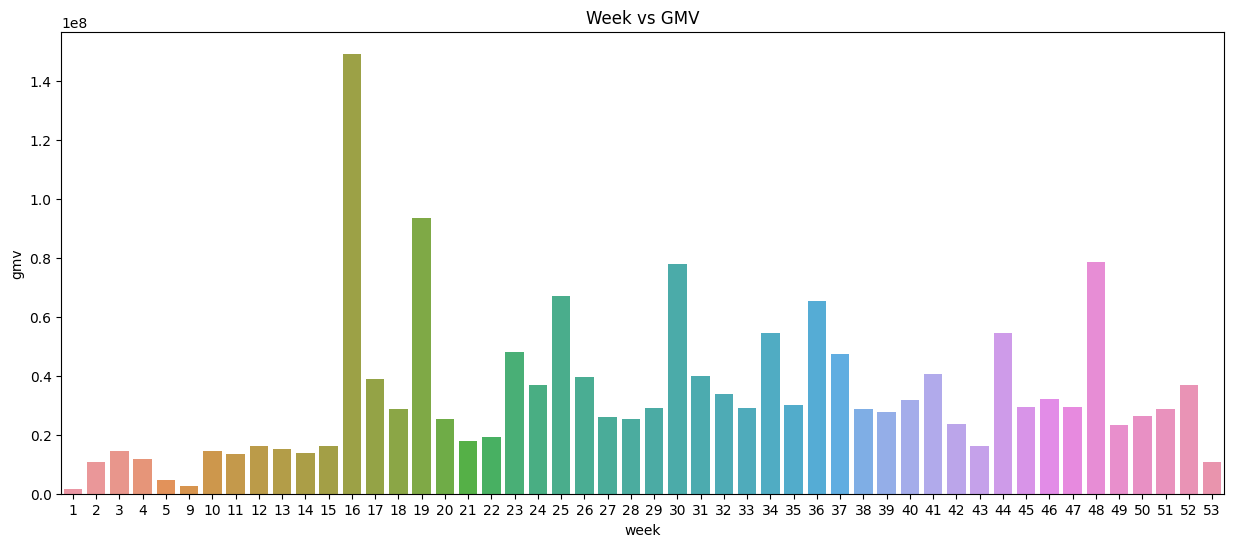

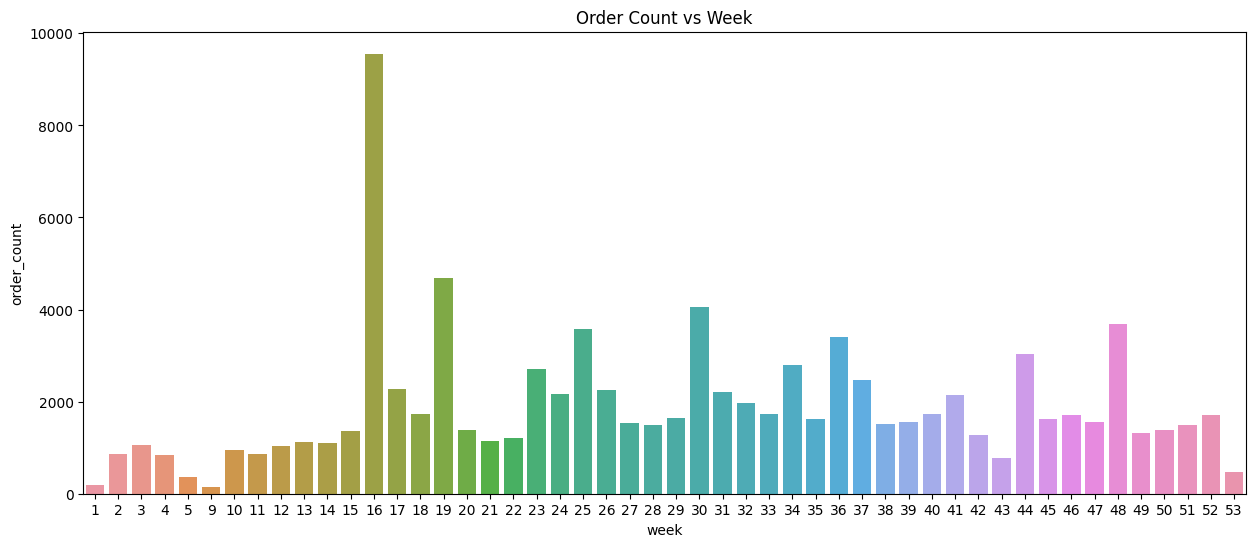

In [629]:


plt.figure(figsize=(15,6))
sns.barplot(x=camera_wk['week'],y=camera_wk['gmv'])
plt.title("Week vs GMV")
plt.show()
# On an avverage 3 sales a week giving better result


plt.figure(figsize=(15,6))
sns.barplot(x=camera_wk['week'],y=camera_wk['order_count'])
plt.title("Order Count vs Week")
plt.show()

## On week 16 , 19, 25, 30,36,44 and 48 sales was good

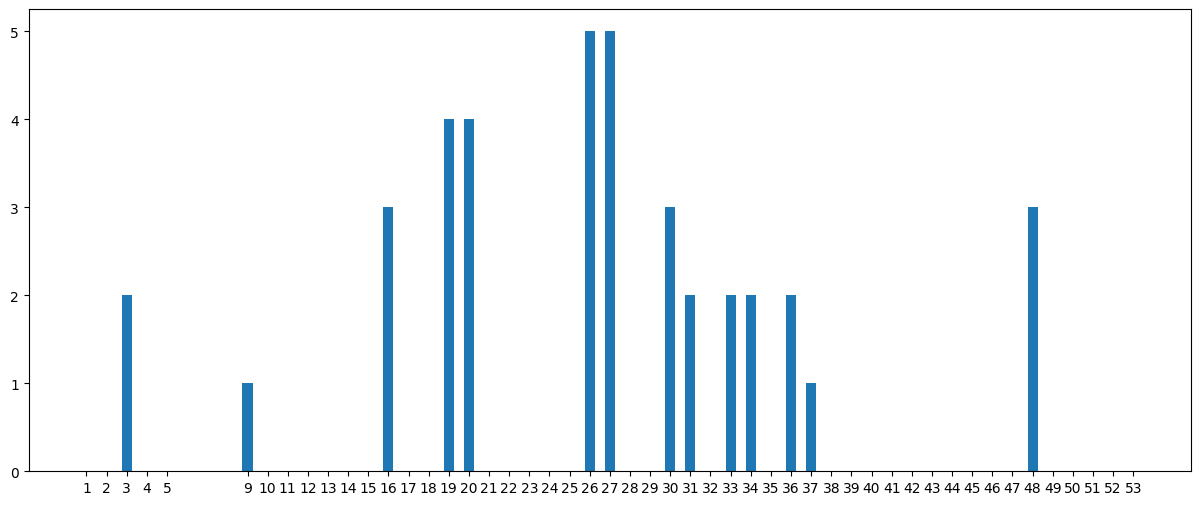

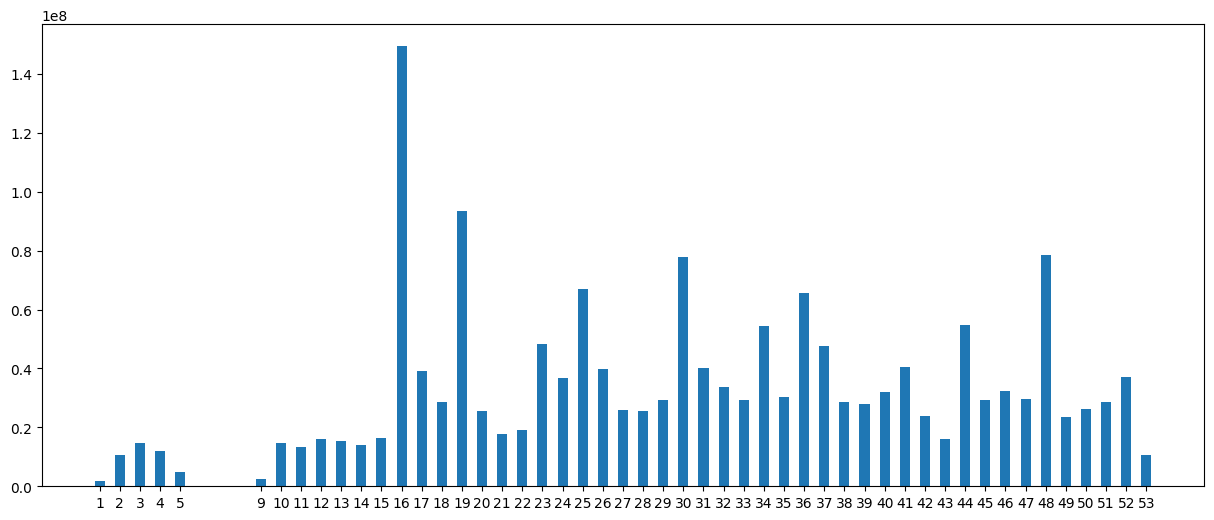

In [ ]:
plt.figure(figsize=(15,6))
width=0.5
plt.bar(x=camera_wk['week'],height=camera_wk['num_of_sales'],width=width)
plt.xticks(camera_wk['week'])
plt.show()
plt.figure(figsize=(15,6))
plt.bar(x=camera_wk['week'],height=camera_wk['gmv'],width=width)
plt.xticks(camera_wk['week'])
plt.show()

##  week 16th had 3 days of sale and it improved its gmv, similarly for week 48, 19 and 30
# But in Week 26 27 5 days were sale days bt id didnt improve the GMV much

# Week 16, 19 , 30 , 34,36 and 48 : has impact because has good gmv and number of sales

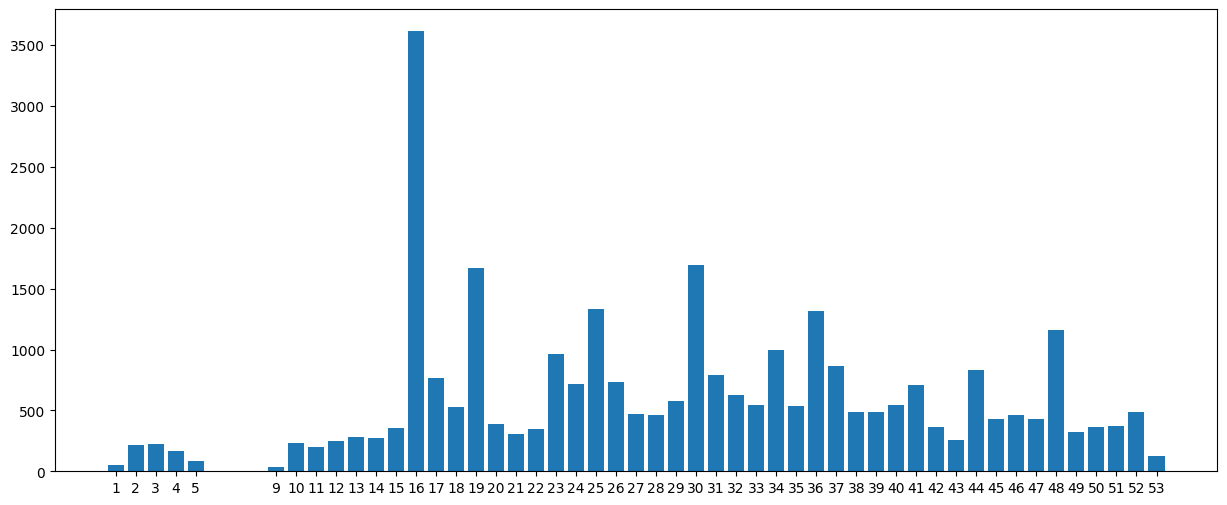

In [ ]:
plt.figure(figsize=(15,6))
plt.bar(x=camera_wk['week'],height=camera_wk['discount_per'])
plt.xticks(camera_wk['week'])
plt.show()

### Now week 25th may not have any sale but disocunts were given for most items and hence GMV was improved which makes sense

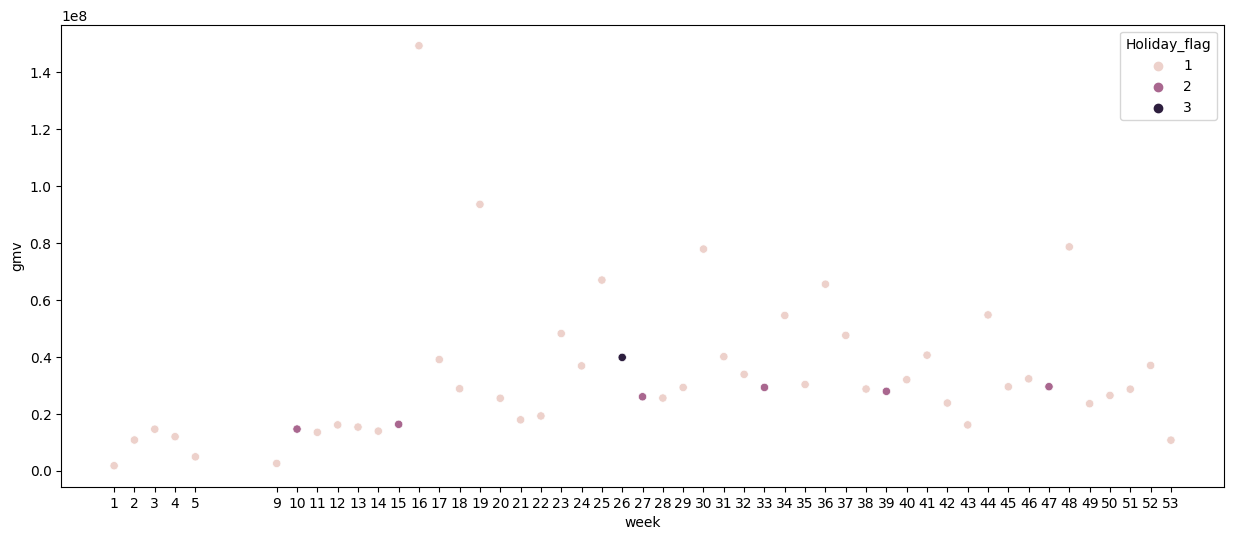

In [ ]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=camera_wk['week'],y=camera_wk['gmv'],hue=camera_wk['Holiday_flag'])
plt.xticks(camera_wk['week'])
plt.show()

# Week 26, 15, 27 33 39 47


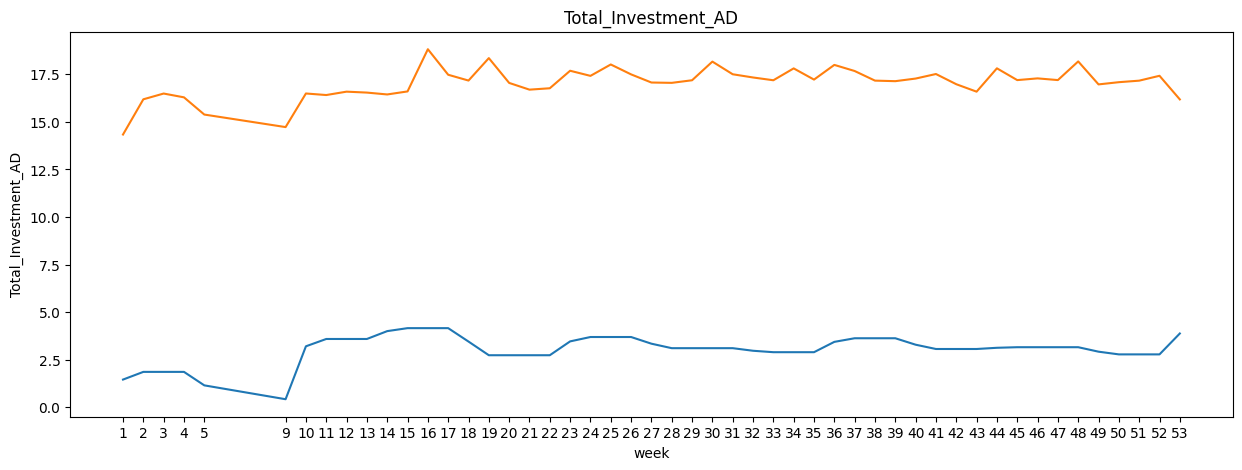

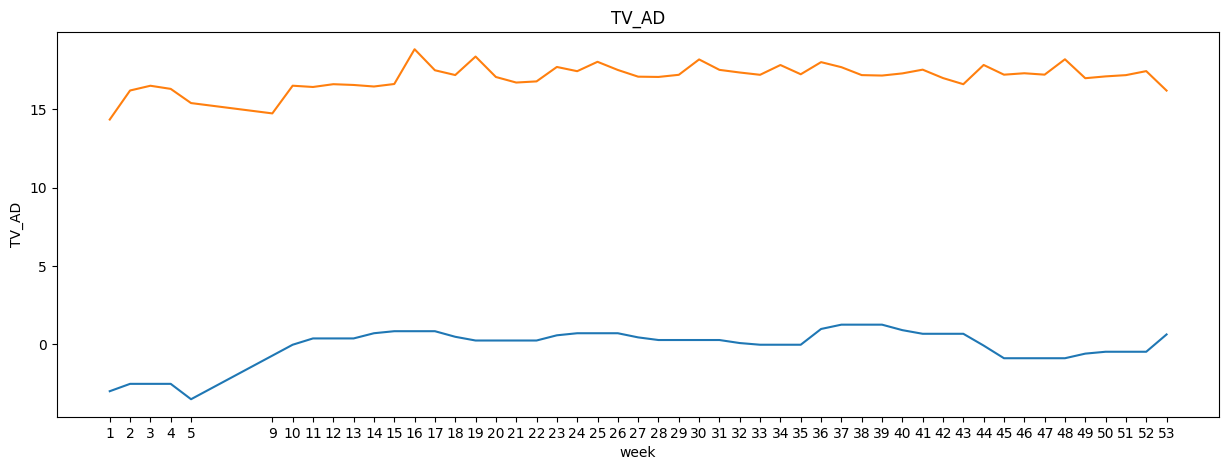

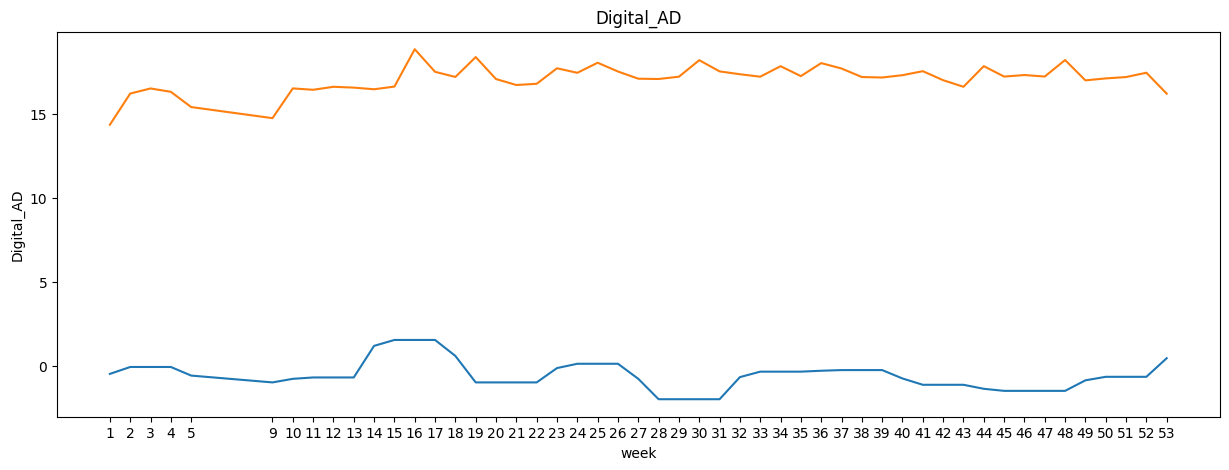

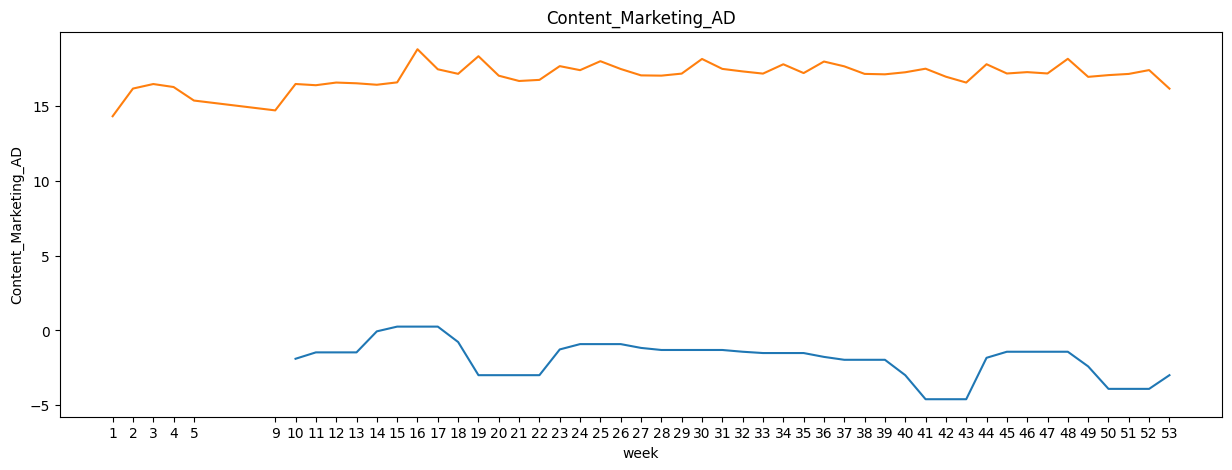

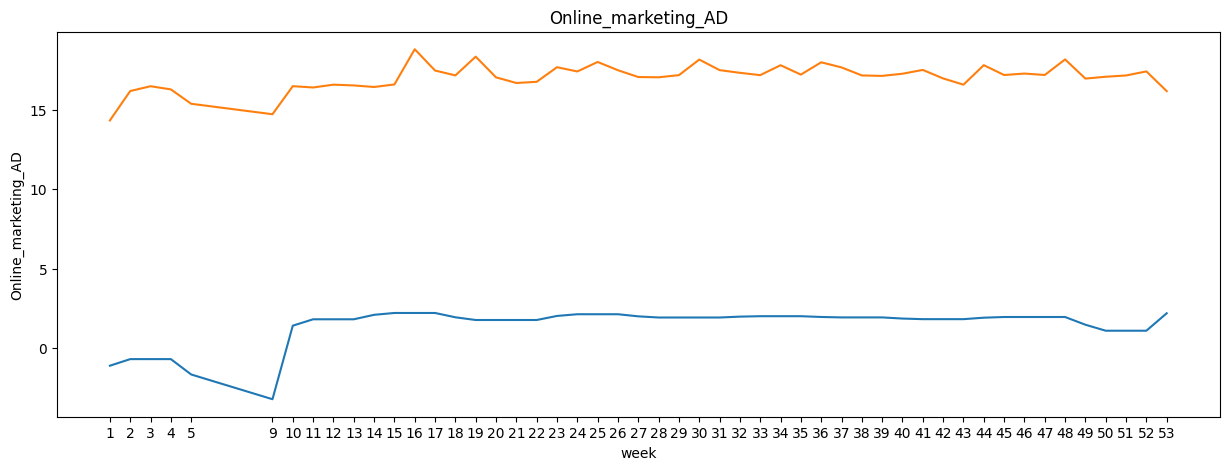

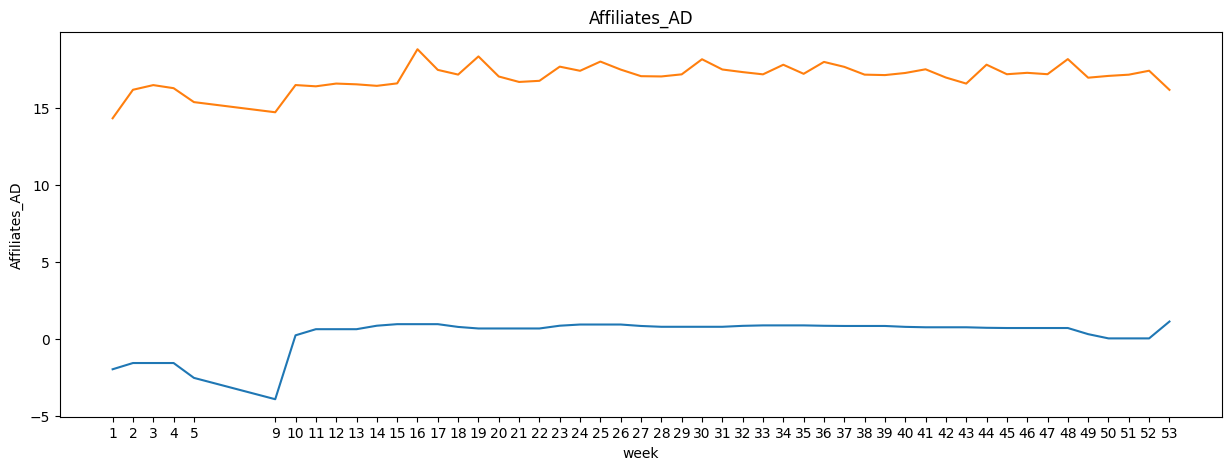

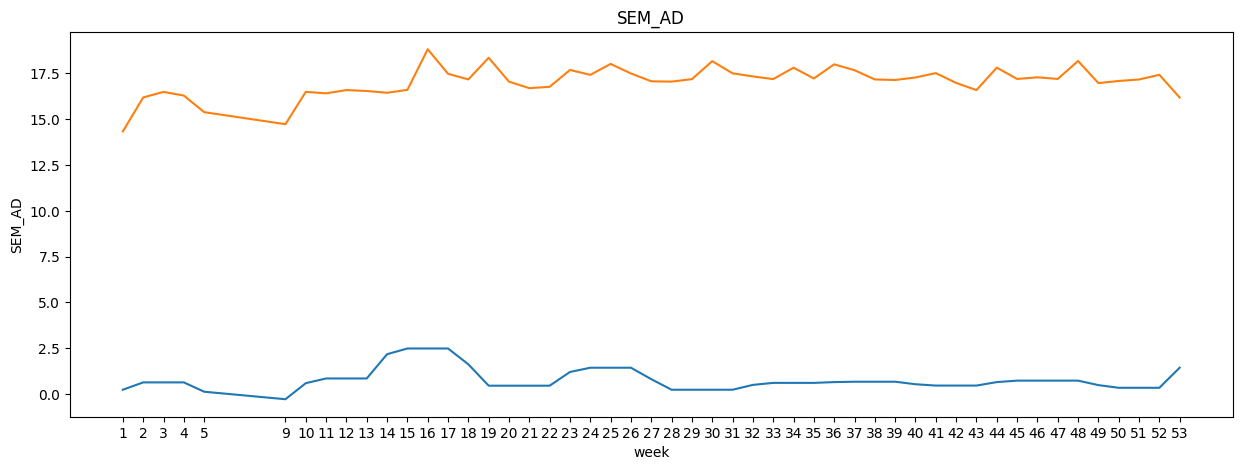

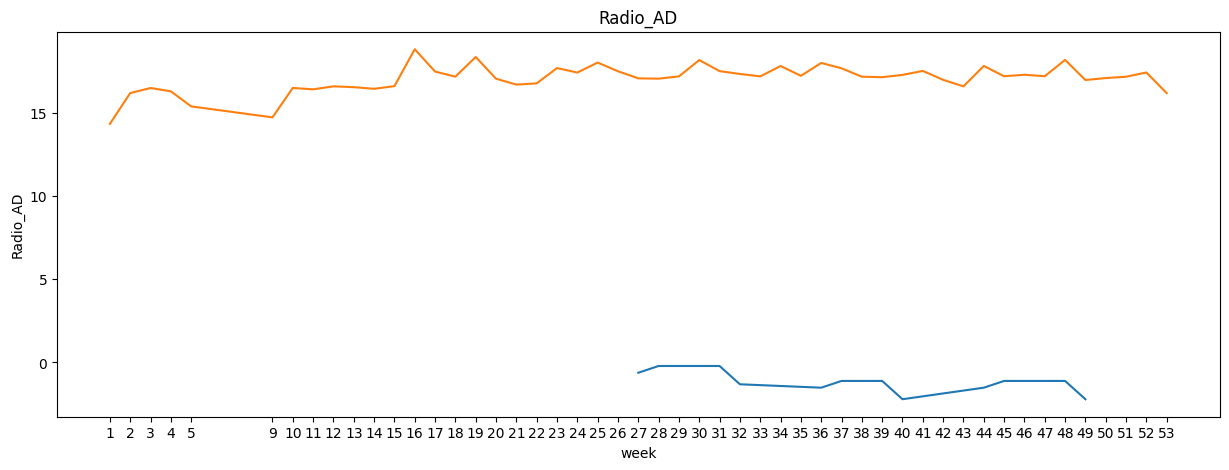

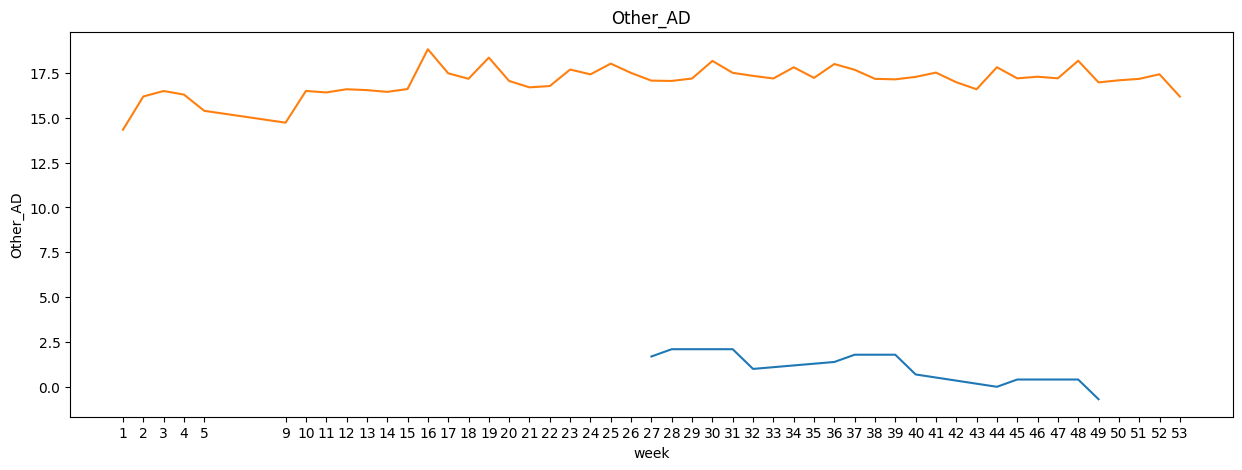

In [86]:
camera.columns
markinv = ['Total_Investment_AD', 'TV_AD','Digital_AD', 'Content_Marketing_AD', 'Online_marketing_AD','Affiliates_AD', 'SEM_AD', 'Radio_AD', 'Other_AD','gmv']

# average_sale_per_week
# plt.figure(figsize=(25, 19))
x=1
for i in markinv:
  if i != 'gmv':
    # plt.subplot(9,1,x)
    plt.figure(figsize=(15, 5))
    plt.title(i)
    sns.lineplot(x=camera_wk['week'],y=nm.log(camera_wk[i]))
    sns.lineplot(x=camera_wk['week'],y=nm.log(camera_wk['gmv']))
    plt.xticks(camera_wk['week'])
    x=x+1
    plt.show()



# tv , online marketing , affliates , radio and other doesnt seems impacting the sales much

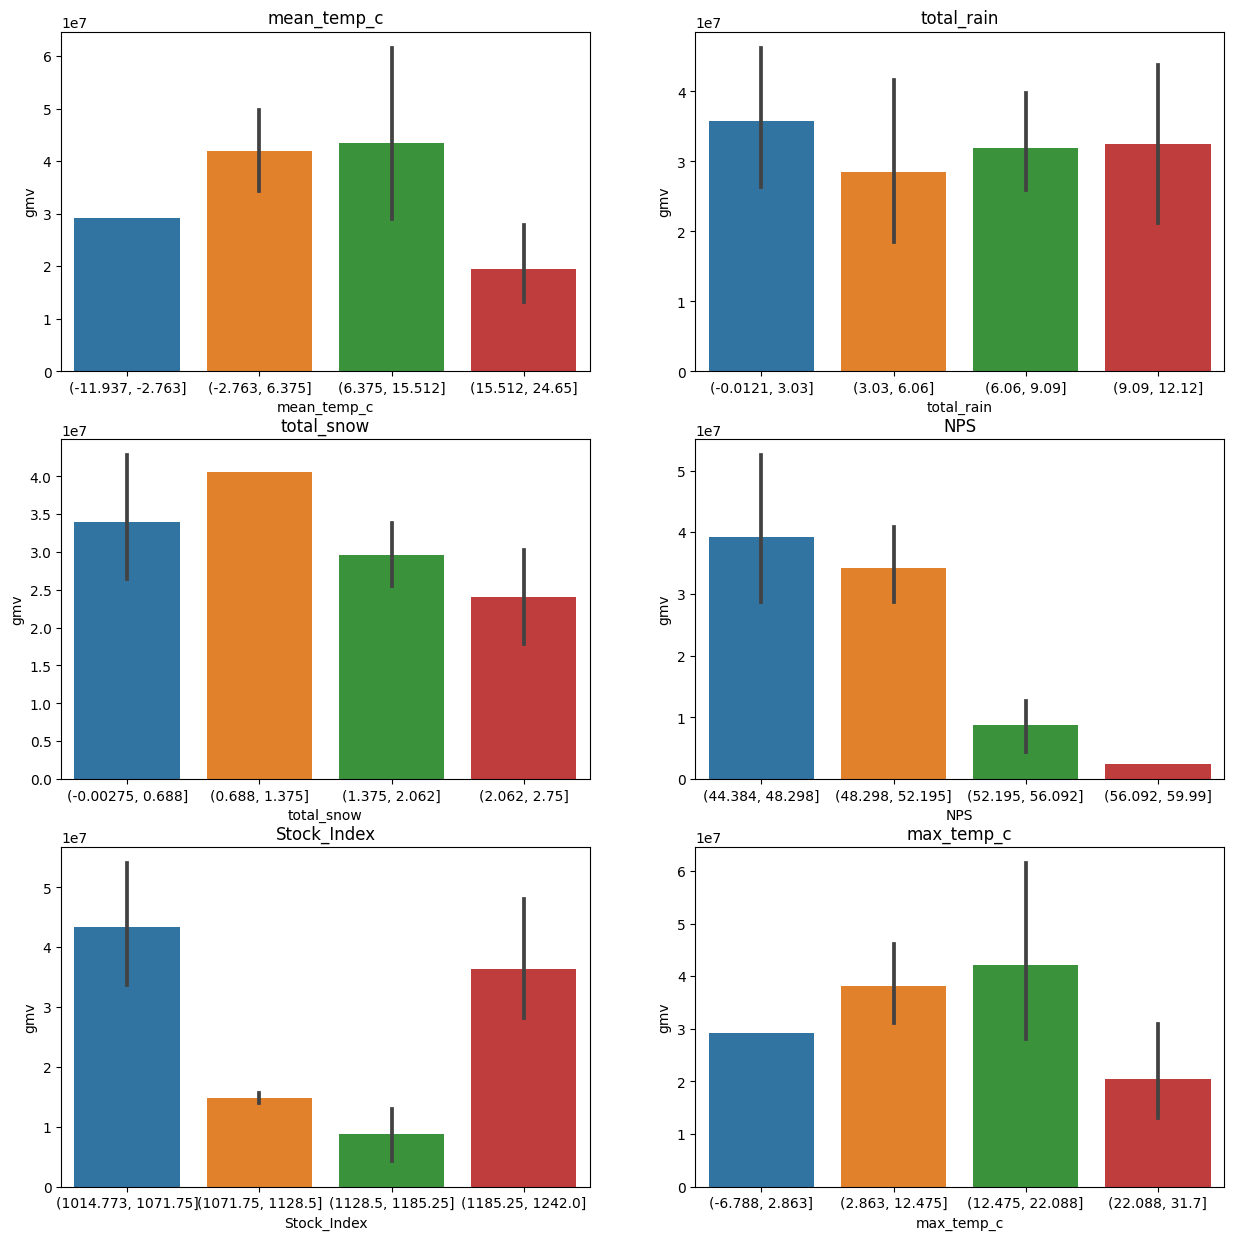

In [87]:
wc = ['mean_temp_c', 'total_rain', 'total_snow','NPS',"Stock_Index",'max_temp_c']

plt.figure(figsize=(15, 15))
x=1
for i in wc:
  plt.subplot(3,2,x)
  plt.title(i)
  sns.barplot(y=camera_wk['gmv'],x=pd.cut(camera_wk[i],bins=4))
  x=x+1

## total rain , stock index looks no pattern

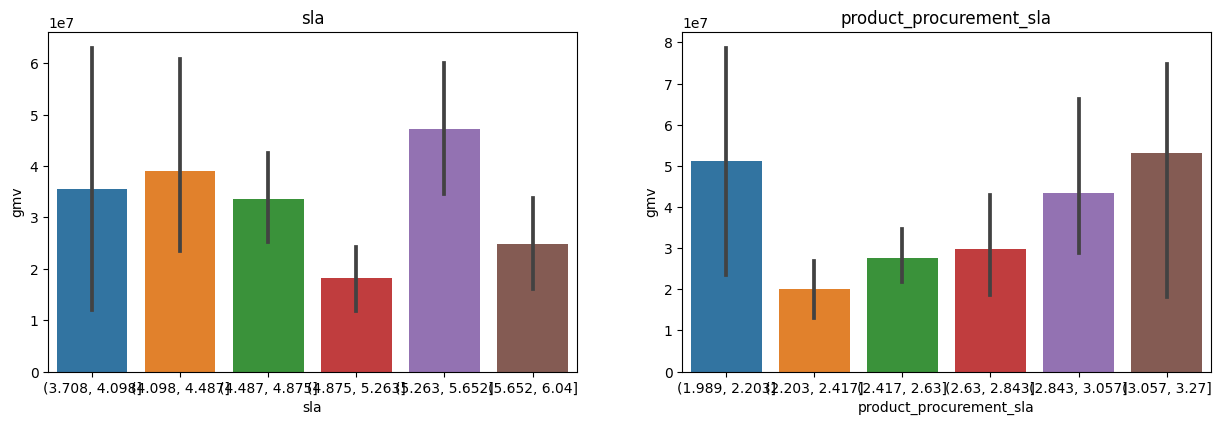

In [158]:
wc = ['sla','product_procurement_sla']

plt.figure(figsize=(15, 15))
x=1
for i in wc:
  plt.subplot(3,2,x)
  plt.title(i)
  sns.barplot(y=camera_wk['gmv'],x=pd.cut(camera_wk[i],bins=6))
  x=x+1

# product procurement sla has a pattern , less days probably are cheap products and getting sold out at high number and then high priced product
# taking high procurement time and high gmv
# but doesnt look like a reason of impact

In [639]:
camera_wk['sales_per']=(camera_wk['num_of_sales'])/7
camera_wk.drop('num_of_sales',1,inplace=True)

<Axes: >

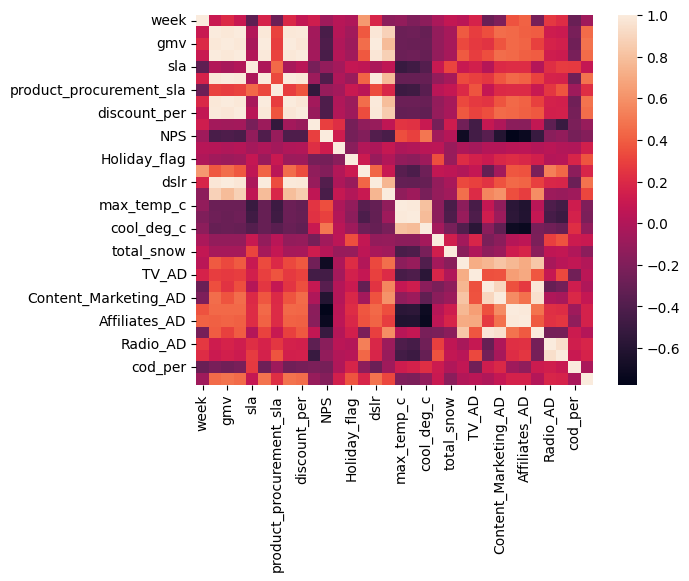

In [185]:
# camera_wk.corr()[camera_wk.corr()>0.5]

sns.heatmap(camera_wk.corr())


In [640]:
camera_wk.columns
camera_wk.drop([ 'Total Investment', 'TV', 'Digital',
       'Sponsorship', 'Content Marketing', 'Online marketing', 'Affiliates',
       'SEM', 'Radio', 'Other'],1,inplace=True)

In [ ]:
## removing nps as its high correlated to ads


Camera Modeling


In [160]:

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [641]:
camera_wk.isnull().sum()
# camera_wk.drop(['NPS'],1,inplace=True)

week                       0
order_count                0
gmv                        0
units                      0
sla                        0
product_mrp                0
product_procurement_sla    0
listing_price              0
discount_per               0
Stock_Index                0
NPS                        0
pay_day_in_wk              0
Holiday_flag               0
Others                     0
dslr                       0
point & shoot              0
max_temp_c                 0
mean_temp_c                0
cool_deg_c                 0
total_rain                 0
total_snow                 0
Total_Investment_AD        0
TV_AD                      0
Digital_AD                 0
Content_Marketing_AD       0
Sponsorship_AD             0
Online_marketing_AD        0
Affiliates_AD              0
SEM_AD                     0
Radio_AD                   0
Other_AD                   0
cod_per                    0
sales_per                  0
dtype: int64

In [642]:
camera_wk.drop(['units','order_count','product_mrp'],1,inplace=True)

In [644]:
## dropping other variables who doesnt look like havong an impact from analysis done above
# total rain, nps,tv , online marketing , affliates , radio and other ads doesnt seems impacting the sales much
camera_wk.drop(['Other_AD','Radio_AD','Online_marketing_AD','Affiliates_AD','total_rain','NPS','listing_price','Others'],1,inplace=True)

In [646]:
camera_wk.drop('Holiday_flag',1,inplace=True)
camera_wk.drop(['sla'],1,inplace=True)
camera_wk.drop('cool_deg_c',1,inplace=True)

KeyError: ignored

In [647]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(camera_wk, train_size = 0.7, test_size = 0.3, random_state = 100)

In [648]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df_train[df_train.columns]=scaler.fit_transform(df_train[df_train.columns])
# df_train

In [649]:
X_train=df_train.drop('gmv',1)
y_train=df_train['gmv']
# X_train

In [169]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [590]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary

def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [665]:
## as variables are more than observations check RFE method
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=8, step=1)

In [666]:
selector.fit(X_train, y_train)

# print(selector.support_)
# print(selector.ranking_)
df=pd.DataFrame(list(zip(X_train.columns,selector.support_,selector.ranking_)))
features =X_train.columns[selector.support_]
features


Index(['discount_per', 'dslr', 'point & shoot', 'max_temp_c', 'mean_temp_c',
       'Content_Marketing_AD', 'cod_per', 'sales_per'],
      dtype='object')

In [197]:
list(features)

['week',
 'discount_per',
 'Stock_Index',
 'pay_day_in_wk',
 'dslr',
 'point & shoot',
 'max_temp_c',
 'mean_temp_c',
 'Total_Investment_AD',
 'TV_AD',
 'Digital_AD',
 'Content_Marketing_AD',
 'SEM_AD',
 'cod_per',
 'sales_per']

In [667]:
x_train_m =build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4645.
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           5.34e-39
Time:                        18:49:16   Log-Likelihood:                 134.34
No. Observations:                  35   AIC:                            -250.7
Df Residuals:                      26   BIC:                            -236.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0036 

Features     VIF
4           mean_temp_c  510.33
3            max_temp_c  475.61
0          discount_per  329.80
1                  dslr  216.90
2         point & shoot   33.09
6               cod_per    7.22
5  Content_Marketing_AD    3.35
7             sales_per    1.93

In [668]:
features=features.drop('mean_temp_c',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5093.
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           2.00e-40
Time:                        18:49:25   Log-Likelihood:                 132.96
No. Observations:                  35   AIC:                            -249.9
Df Residuals:                      27   BIC:                            -237.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0060 

Features     VIF
0          discount_per  329.37
1                  dslr  216.76
2         point & shoot   31.34
3            max_temp_c    8.50
5               cod_per    6.90
4  Content_Marketing_AD    3.21
6             sales_per    1.92

In [669]:
# checkVIF(X_train[features])

features=features.drop('dslr')
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])



                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     149.0
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           6.42e-20
Time:                        18:49:36   Log-Likelihood:                 68.346
No. Observations:                  35   AIC:                            -122.7
Df Residuals:                      28   BIC:                            -111.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0131 

Features    VIF
1         point & shoot  10.28
0          discount_per   8.41
4               cod_per   6.89
2            max_temp_c   6.03
3  Content_Marketing_AD   3.17
5             sales_per   1.88

In [670]:
features=features.drop('cod_per',1)
X_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])



                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     185.2
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           4.45e-21
Time:                        18:49:47   Log-Likelihood:                 68.344
No. Observations:                  35   AIC:                            -124.7
Df Residuals:                      29   BIC:                            -115.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0152 

Features    VIF
1         point & shoot  10.09
0          discount_per   8.38
3  Content_Marketing_AD   2.74
2            max_temp_c   1.83
4             sales_per   1.78

In [671]:
features=features.drop('point & shoot')
X_train_m==build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     197.4
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           4.39e-21
Time:                        18:50:07   Log-Likelihood:                 65.074
No. Observations:                  35   AIC:                            -120.1
Df Residuals:                      30   BIC:                            -112.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0275 

Features   VIF
0          discount_per  3.19
2  Content_Marketing_AD  2.34
3             sales_per  1.77
1            max_temp_c  1.59

In [672]:
features=features.drop('sales_per')
X_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     263.7
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           3.85e-22
Time:                        18:50:18   Log-Likelihood:                 64.554
No. Observations:                  35   AIC:                            -121.1
Df Residuals:                      31   BIC:                            -114.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0320 

Features   VIF
0          discount_per  2.36
2  Content_Marketing_AD  2.29
1            max_temp_c  1.55

In [673]:
features=features.drop('max_temp_c')
X_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])



                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     393.9
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           2.91e-23
Time:                        18:50:25   Log-Likelihood:                 63.951
No. Observations:                  35   AIC:                            -121.9
Df Residuals:                      32   BIC:                            -117.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0515 

Features   VIF
0          discount_per  2.16
1  Content_Marketing_AD  2.16

In [674]:
lm = sm.OLS(y_train,X_train[features]).fit() # fitting the model
print(lm.summary()) # model summary
y_train_pred=lm.predict(X_train[features])


                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              514.1
Date:                Sat, 07 Oct 2023   Prob (F-statistic):                    1.35e-25
Time:                        18:50:39   Log-Likelihood:                          53.183
No. Observations:                  35   AIC:                                     -102.4
Df Residuals:                      33   BIC:                                     -99.26
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

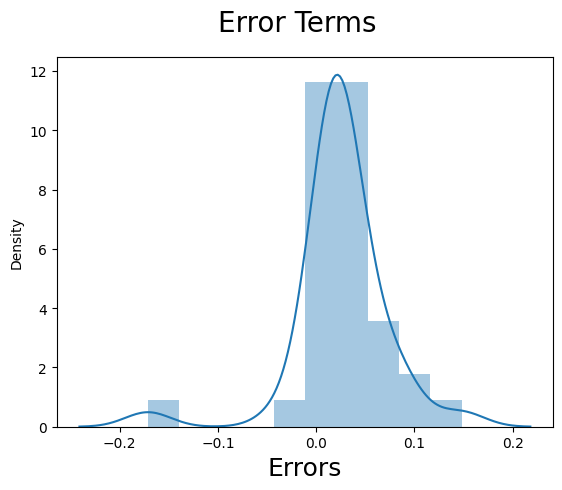

In [675]:
fig=plt.figure()
sns.distplot((y_train-y_train_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()


Text(0, 0.5, 'y_pred')

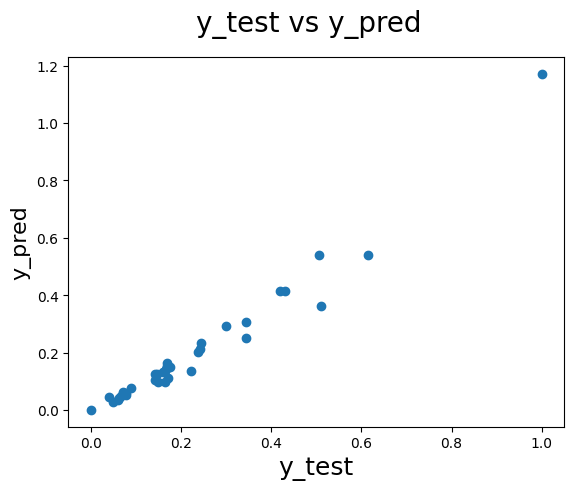

In [676]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train ,y_train_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [677]:
## on test
df_test[df_train.columns]=scaler.fit_transform(df_test[df_train.columns])
X_test=df_test.drop('gmv',1)
y_test=df_test['gmv']
X_test=sm.add_constant(X_test)
X_test=X_test[features]

In [678]:
y_test_pred=lm.predict(X_test)

Text(0, 0.5, 'y_test_pred')

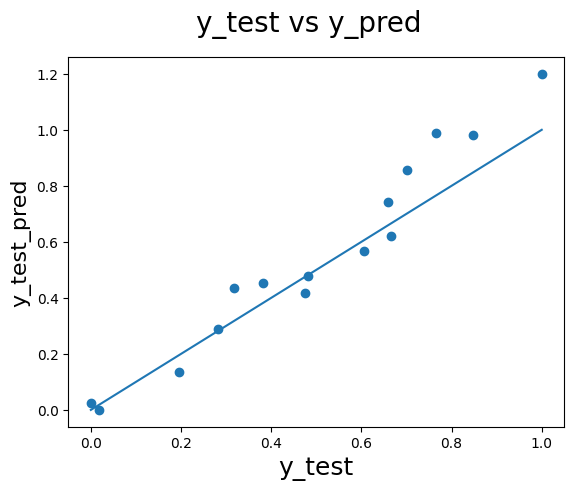

In [679]:
# Plotting y_test and y_pred to understand the spread

fig,ax = plt.subplots()
ax.scatter(y_test, y_test_pred )
fig.suptitle('y_test vs y_pred', fontsize = 20)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])#,  lw=1)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

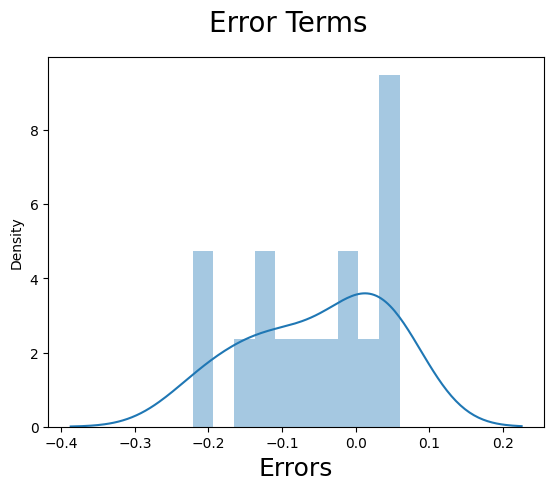

In [680]:
fig=plt.figure()
sns.distplot((y_test-y_test_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()


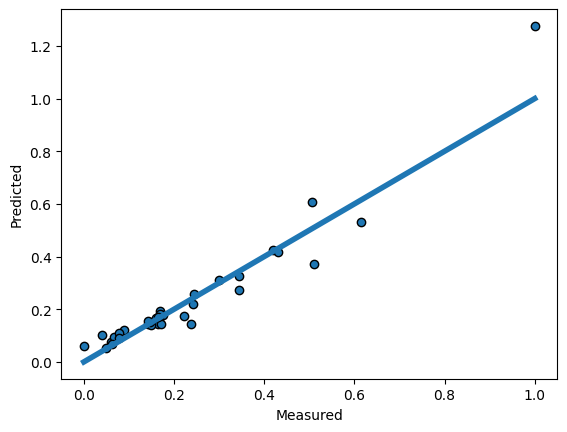

In [681]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

f = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train[features], y_train, scoring='r2', cv=f)
scores
y_pred = cross_val_predict(lm, X_train[features], y_train, cv=f)



fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],  lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

Multiplicative

In [ ]:

# camera_wk=camera.groupby(['week']).agg({"order_item_id":"nunique",'gmv':'sum','units':'sum','order_payment_type':'sum','sla':'mean',
#                                         'product_mrp':'sum','product_procurement_sla':'mean','listing_price':'sum',
#                                          'discount_per':'sum','Stock_Index':'max','NPS':'max','pay_date_flag':'max',
#                                           'sale_date':"nunique"}).round(2)

# camera_wk=pd.merge(camera_wk,weekly_kpis,on='week')


# camera_wk.drop(['heat_deg_c','mon_temp_c','Year','Month','Day','Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
#        'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other'],1,inplace=True)

# # camera_wk.sale_date.value_counts()
# camera_wk.rename(columns={'order_item_id':'order_count',"order_payment_type":"order_payment_cod",'mon_temp_c':"min_temp_c","pay_date_flag":"pay_day_in_wk"},inplace=True)
# camera_wk["cod_per"]=camera_wk["order_payment_cod"]/camera_wk["order_count"]
# camera_wk.drop("order_payment_cod",1,inplace=True)
# camera_wk.rename(columns={"sale_date":"num_of_sales"},inplace=True)
# camera_wk['sales_per']=((camera_wk['num_of_sales']-1)/7)*100
# camera_wk.drop('num_of_sales',1,inplace=True)

In [ ]:

# camera_wk.drop(['units','order_count','product_mrp'],1,inplace=True)
# camera_wk.drop(['Other_AD','Radio_AD','Online_marketing_AD','Affiliates_AD','total_rain','NPS'],1,inplace=True)
# camera_wk.drop(['sla','product_procurement_sla'],1,inplace=True)
# camera_wk.drop('cool_deg_c',1,inplace=True)

In [685]:
camera_wk[camera_wk.columns]=nm.log(camera_wk[camera_wk.columns])
# camera_wk.columns

In [686]:
camera_wk.describe()

camera_wk=camera_wk.replace([nm.inf, -nm.inf], 0)
camera_wk=camera_wk.fillna(0)



In [706]:
df_train, df_test = train_test_split(camera_wk, train_size = 0.7, test_size = 0.3, random_state = 100)

In [707]:
df_train[df_train.columns]=scaler.fit_transform(df_train[df_train.columns])
X_train=df_train.drop('gmv',1)
y_train=df_train['gmv']
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=10, step=1)
selector.fit(X_train, y_train)
# X_train.columns
#
df=pd.DataFrame(list(zip(X_train.columns,selector.support_,selector.ranking_)))
features =X_train.columns[selector.support_]
features


Index(['week', 'product_procurement_sla', 'discount_per', 'dslr',
       'point & shoot', 'total_snow', 'Total_Investment_AD', 'TV_AD',
       'Content_Marketing_AD', 'sales_per'],
      dtype='object')

In [708]:
m1=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     508.3
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           2.07e-25
Time:                        18:53:59   Log-Likelihood:                 100.16
No. Observations:                  35   AIC:                            -178.3
Df Residuals:                      24   BIC:                            -161.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features     VIF
2             discount_per  891.07
3                     dslr  838.70
7                    TV_AD  114.29
6      Total_Investment_AD   93.26
0                     week   50.16
4            point & shoot   37.78
8     Content_Marketing_AD   14.53
1  product_procurement_sla   14.22
5               total_snow   10.78
9                sales_per    9.05

In [709]:
features=features.drop('dslr',1)
m1=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     283.9
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           6.87e-23
Time:                        18:54:02   Log-Likelihood:                 87.491
No. Observations:                  35   AIC:                            -155.0
Df Residuals:                      25   BIC:                            -139.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features     VIF
6                    TV_AD  114.27
5      Total_Investment_AD   91.12
2             discount_per   37.83
3            point & shoot   30.35
0                     week   26.15
7     Content_Marketing_AD   14.46
1  product_procurement_sla   12.52
4               total_snow   10.77
8                sales_per    8.91

In [710]:
features=features.drop('TV_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     268.8
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           5.46e-23
Time:                        18:54:06   Log-Likelihood:                 83.830
No. Observations:                  35   AIC:                            -149.7
Df Residuals:                      26   BIC:                            -135.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
2             discount_per  37.67
3            point & shoot  30.29
5      Total_Investment_AD  24.20
0                     week  22.27
6     Content_Marketing_AD  10.89
4               total_snow   9.75
1  product_procurement_sla   9.29
7                sales_per   8.86

In [711]:
features=features.drop('point & shoot',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     280.8
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           1.60e-23
Time:                        18:54:14   Log-Likelihood:                 81.621
No. Observations:                  35   AIC:                            -147.2
Df Residuals:                      27   BIC:                            -134.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
4      Total_Investment_AD  21.97
0                     week  18.97
2             discount_per  18.60
3               total_snow   9.39
6                sales_per   8.75
5     Content_Marketing_AD   8.06
1  product_procurement_sla   8.03

In [712]:
features=features.drop('Total_Investment_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     333.2
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           1.07e-24
Time:                        18:54:20   Log-Likelihood:                 81.289
No. Observations:                  35   AIC:                            -148.6
Df Residuals:                      28   BIC:                            -137.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
2             discount_per  16.89
0                     week  15.73
3               total_snow   8.62
1  product_procurement_sla   7.55
4     Content_Marketing_AD   7.51
5                sales_per   7.33

In [713]:
features=features.drop('week',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     403.5
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           7.23e-26
Time:                        18:54:25   Log-Likelihood:                 80.838
No. Observations:                  35   AIC:                            -149.7
Df Residuals:                      29   BIC:                            -140.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features   VIF
2               total_snow  8.29
0  product_procurement_sla  7.54
1             discount_per  6.64
3     Content_Marketing_AD  6.40
4                sales_per  5.54

In [714]:
features=features.drop('sales_per',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     521.6
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           2.96e-27
Time:                        18:54:31   Log-Likelihood:                 80.835
No. Observations:                  35   AIC:                            -151.7
Df Residuals:                      30   BIC:                            -143.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features   VIF
0  product_procurement_sla  7.54
1             discount_per  6.56
3     Content_Marketing_AD  6.11
2               total_snow  4.53

In [715]:
features=features.drop('product_procurement_sla',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     478.6
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           4.91e-26
Time:                        18:54:39   Log-Likelihood:                 73.843
No. Observations:                  35   AIC:                            -139.7
Df Residuals:                      31   BIC:                            -133.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1085 

Features   VIF
2  Content_Marketing_AD  4.85
0          discount_per  4.64
1            total_snow  4.50

In [716]:
features=features.drop('total_snow',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     734.9
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           1.80e-27
Time:                        18:55:00   Log-Likelihood:                 73.702
No. Observations:                  35   AIC:                            -141.4
Df Residuals:                      32   BIC:                            -136.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1001 

Features  VIF
0          discount_per  3.8
1  Content_Marketing_AD  3.8

In [717]:
lm_m = sm.OLS(y_train,X_train[features]).fit() # fitting the model
print(lm_m.summary()) # model summary
y_train_pred=lm_m.predict(X_train[features])
features


                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              3199.
Date:                Sat, 07 Oct 2023   Prob (F-statistic):                    1.66e-38
Time:                        18:55:04   Log-Likelihood:                          62.514
No. Observations:                  35   AIC:                                     -121.0
Df Residuals:                      33   BIC:                                     -117.9
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

Index(['discount_per', 'Content_Marketing_AD'], dtype='object')

Mean_Squared_Error : 0.0016448328555024334
r_square_value : 0.9596198835884042


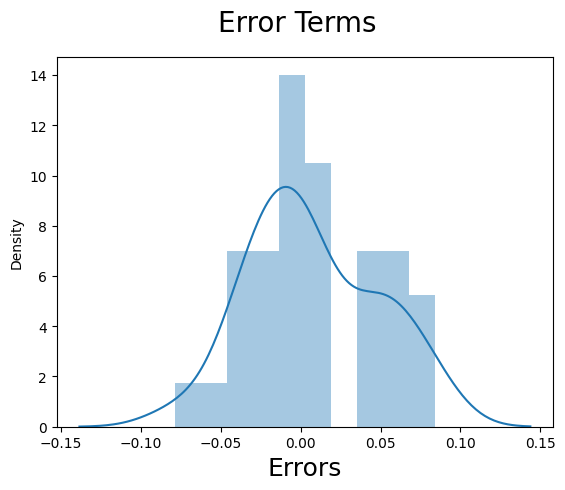

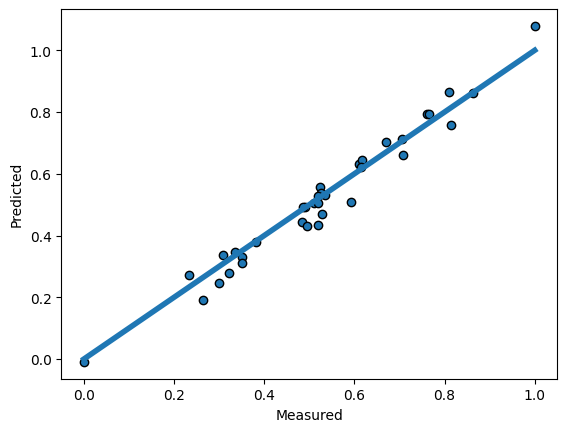

In [718]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_train, y_train_pred)
r_squared = r2_score(y_train, y_train_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

fig=plt.figure()
sns.distplot((y_train-y_train_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()


fig, ax = plt.subplots()
ax.scatter(y_train, y_train_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],  lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [719]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

f = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train[features], y_train, scoring='r2', cv=f)
scores
y_pred = cross_val_predict(lm, X_train[features], y_train, cv=f)



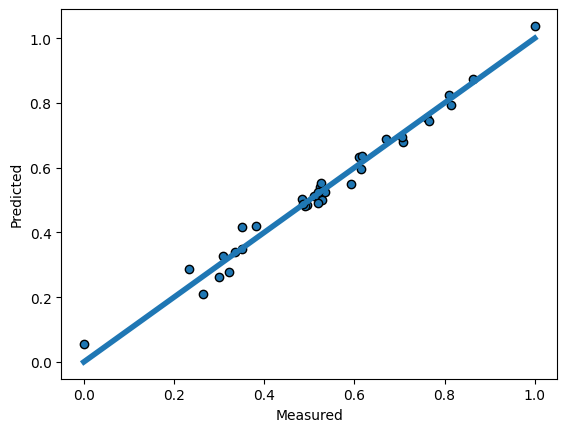

In [700]:

fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],  lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [720]:
df_test[df_test.columns]=scaler.fit_transform(df_test[df_test.columns])
X_test=df_test.drop('gmv',1)
y_test=df_test['gmv']


In [721]:
y_test_pred= lm_m.predict(X_test[features])

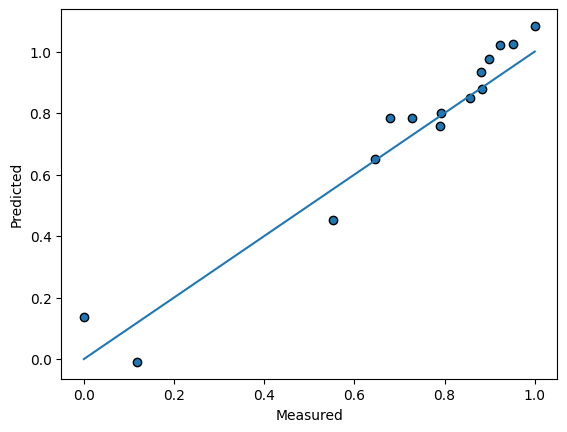

In [722]:
# y_test.min()
# y_test.max()
fig, ax = plt.subplots()
ax.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])#,  lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

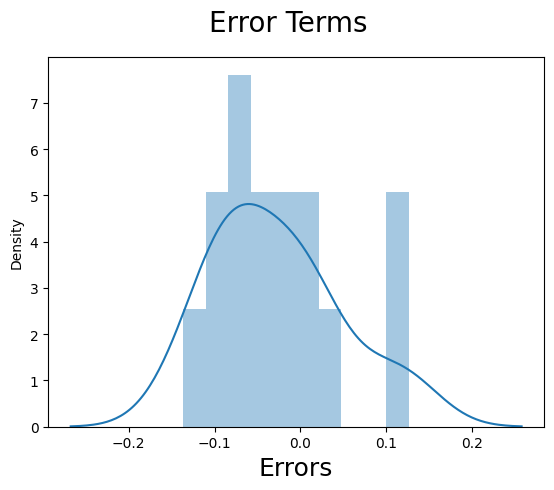

In [723]:
fig=plt.figure()
sns.distplot((y_test-y_test_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

In [724]:
features

Index(['discount_per', 'Content_Marketing_AD'], dtype='object')

# Home Audio

In [725]:
##
ha=EleData3[EleData3.product_analytic_sub_category=='homeaudio']
# camera.discount_per
# EleData3.product_analytic_sub_category.value_counts()

In [726]:
ha.isnull().sum()
## analysis and all pending
ha_dummies=pd.get_dummies(ha.product_analytic_vertical_derived)
ha=pd.concat([ha,ha_dummies],axis=1)

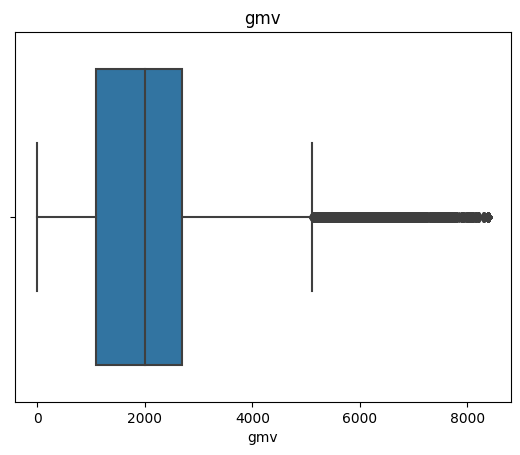

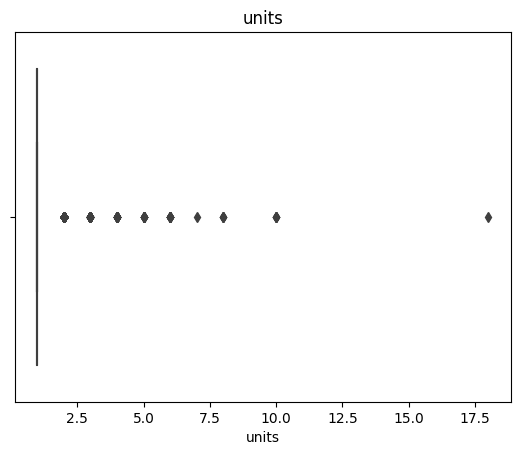

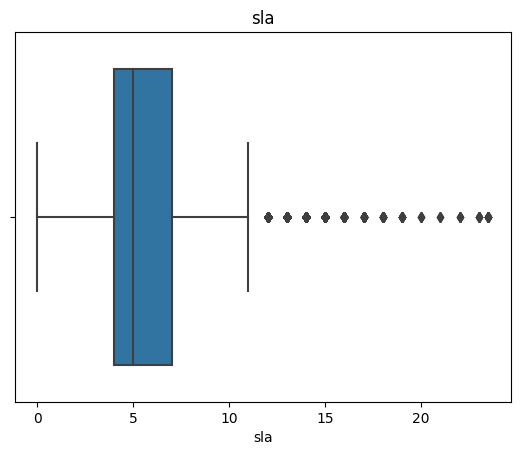

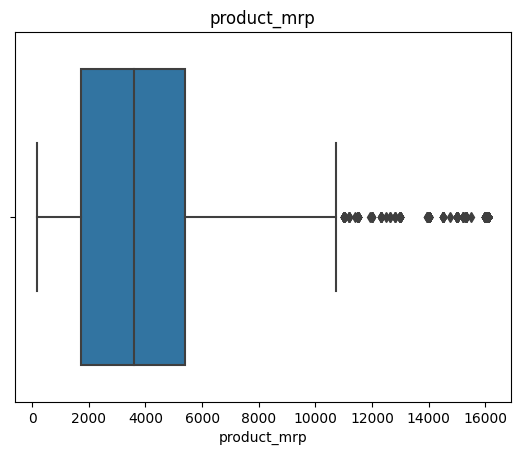

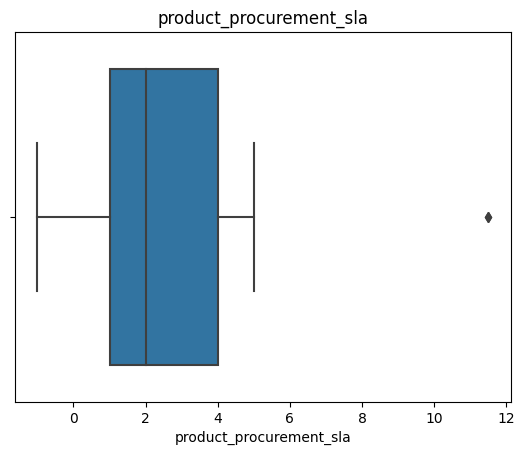

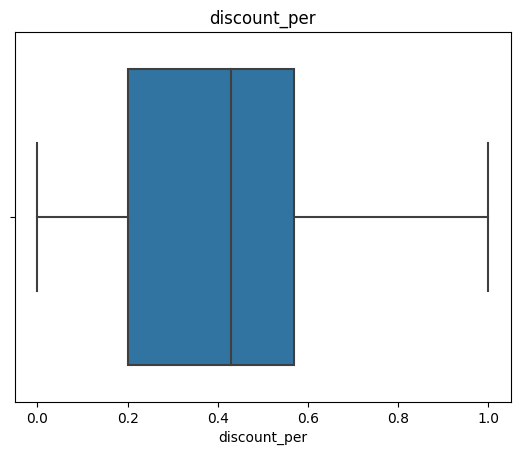

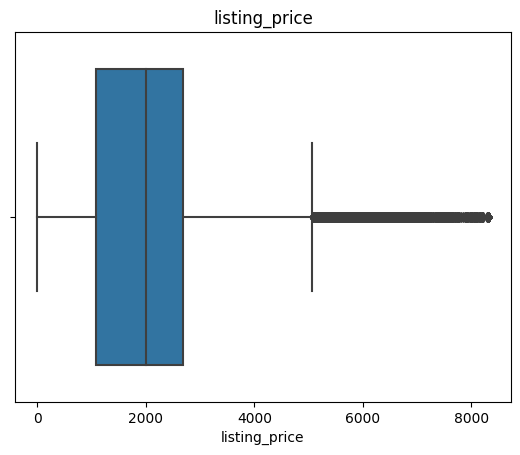

In [313]:
for i in num:
  sns.boxplot(x=ha[i])
  plt.title(i)
  plt.show()


In [727]:


q1=ha['product_mrp'].quantile(0.25)
q3=ha['product_mrp'].quantile(0.75)
iqr=q1+q3
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
# ha[ha['product_mrp']>112000]
ha.loc[ha['product_mrp']>up,'product_mrp']=up
ha.loc[ha['product_mrp']<lw,'product_mrp']=lw


q1=ha['gmv'].quantile(0.25)
q3=ha['gmv'].quantile(0.75)
iqr=q1+q3
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
ha.loc[ha['gmv']>up,'gmv']=up
ha.loc[ha['gmv']<lw,'gmv']=lw


q1=ha['listing_price'].quantile(0.25)
q3=ha['listing_price'].quantile(0.75)
iqr=q1+q3
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
ha.loc[ha['listing_price']>up,'listing_price']=up
ha.loc[ha['listing_price']<lw,'listing_price']=lw


q1=ha['discount_per'].quantile(0.25)
q3=ha['discount_per'].quantile(0.75)
iqr=q1+q3
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
# ha[ha['discount_per']>1.39]
q1=ha['sla'].quantile(0.25)
q3=ha['sla'].quantile(0.75)
iqr=q1+q3
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
ha.loc[ha['sla']>up,'sla']=up
ha.loc[ha['sla']<lw,'sla']=lw
q1=ha['product_procurement_sla'].quantile(0.25)
q3=ha['product_procurement_sla'].quantile(0.75)
iqr=q1+q3
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
ha.loc[ha['product_procurement_sla']>up,'product_procurement_sla']=up
ha.loc[ha['product_procurement_sla']<lw,'product_procurement_sla']=lw

-8966.0   16100.0
-4594.5   8387.5
-4555.5   8312.5
-0.9550000000000001   1.725
-12.5   23.5
-6.5   11.5


In [315]:
ha.columns

Index(['order_date', 'Month', 'order_item_id', 'gmv', 'units',
       'order_payment_type', 'sla', 'product_analytic_category',
       'product_analytic_sub_category', 'product_mrp',
       'product_procurement_sla', 'product_analytic_vertical_derived', 'week',
       'listing_price', 'discount_per', 'sale_date', 'Stock_Index', 'NPS',
       'Year', 'pay_date_flag', 'Holiday_flag', 'Others', 'fmradio',
       'homeaudiospeaker'],
      dtype='object')

In [728]:

ha_wk=ha.groupby(['week']).agg({"order_item_id":"nunique",'gmv':'sum','units':'sum','order_payment_type':'sum','sla':'mean',
                                        'product_mrp':'sum','product_procurement_sla':'mean','listing_price':'sum',
                                         'discount_per':'sum','Stock_Index':'max','NPS':'max','pay_date_flag':'max',
                                          "Holiday_flag": "nunique",'sale_date':"nunique","fmradio":"sum","homeaudiospeaker":"sum"}).round(2)

ha_wk=pd.merge(ha_wk,weekly_kpis,on='week')

ha_wk.rename(columns={"sales_date":"num_of_sales"},inplace=True)

ha_wk.drop(['heat_deg_c','mon_temp_c','Year','Month','Day','Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other'],1,inplace=True)

ha_wk.order_payment_type.value_counts()
ha_wk.rename(columns={'order_item_id':'order_count',"order_payment_type":"order_payment_cod",'mon_temp_c':"min_temp_c","pay_date_flag":"pay_day_in_wk"},inplace=True)
ha_wk["cod_per"]=ha_wk["order_payment_cod"]/ha_wk["order_count"]
ha_wk.drop("order_payment_cod",1,inplace=True)
ha_wk.rename(columns={'sale_date':"num_of_sales"},inplace=True)


In [730]:
ha_wk['sales_per']=(ha_wk['num_of_sales']-1)/7
ha_wk.drop('num_of_sales',1,inplace=True)

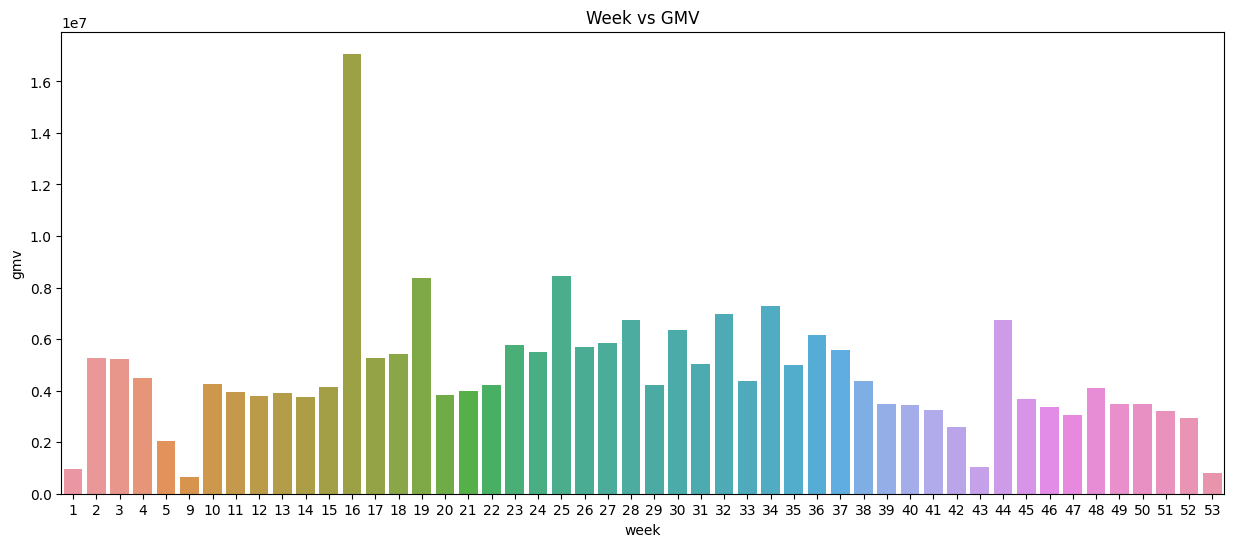

In [729]:
plt.figure(figsize=(15,6))
sns.barplot(x=ha_wk['week'],y=ha_wk['gmv'])
plt.title("Week vs GMV")
plt.show()

### 16 , 19 , 25, 30 ,32,34  ,44 week

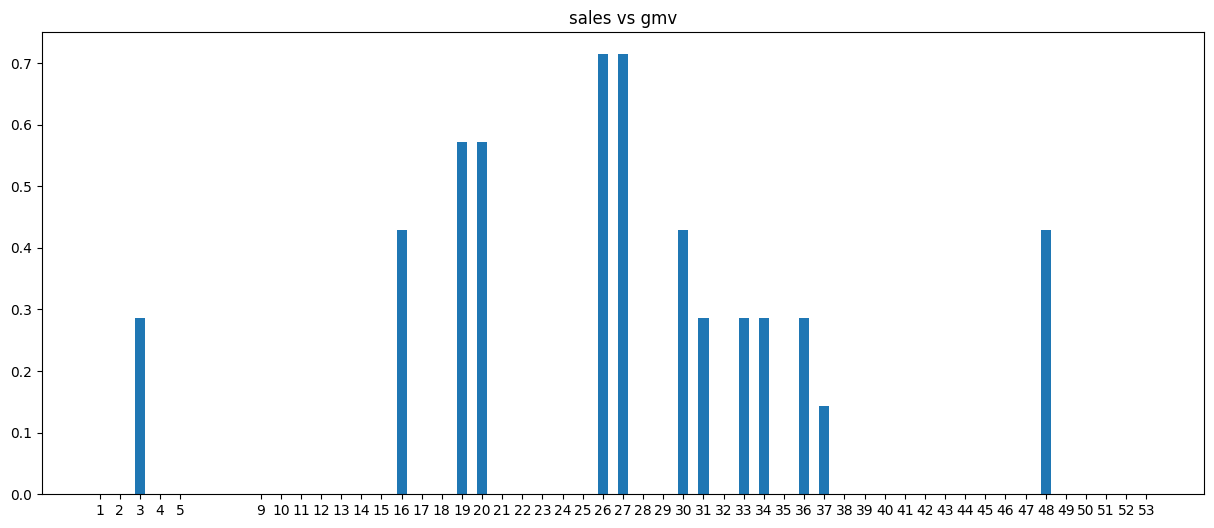

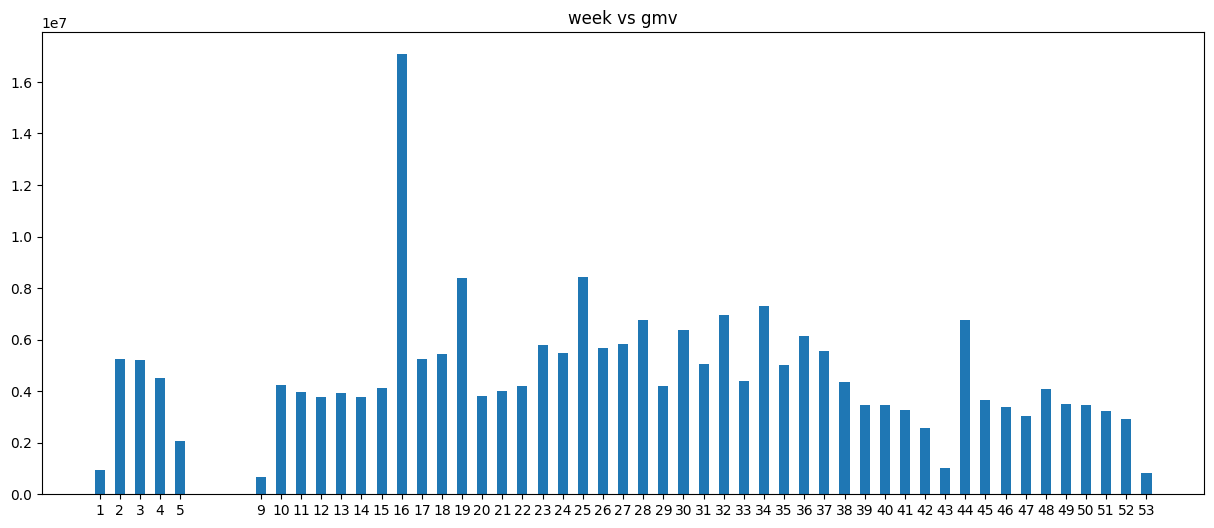

In [319]:
plt.figure(figsize=(15,6))
width=0.5
plt.bar(x=ha_wk['week'],height=ha_wk['sales_per'],width=width)
plt.xticks(ha_wk['week'])
plt.title('sales vs gmv')
plt.show()
plt.figure(figsize=(15,6))
plt.bar(x=ha_wk['week'],height=ha_wk['gmv'],width=width)
plt.xticks(ha_wk['week'])
plt.title('week vs gmv')
plt.show()


## sales 16 , 19, 20, 26,27,30,31, 33,34,48
## doesnt have much impact specially week 20 ,33,34 etc

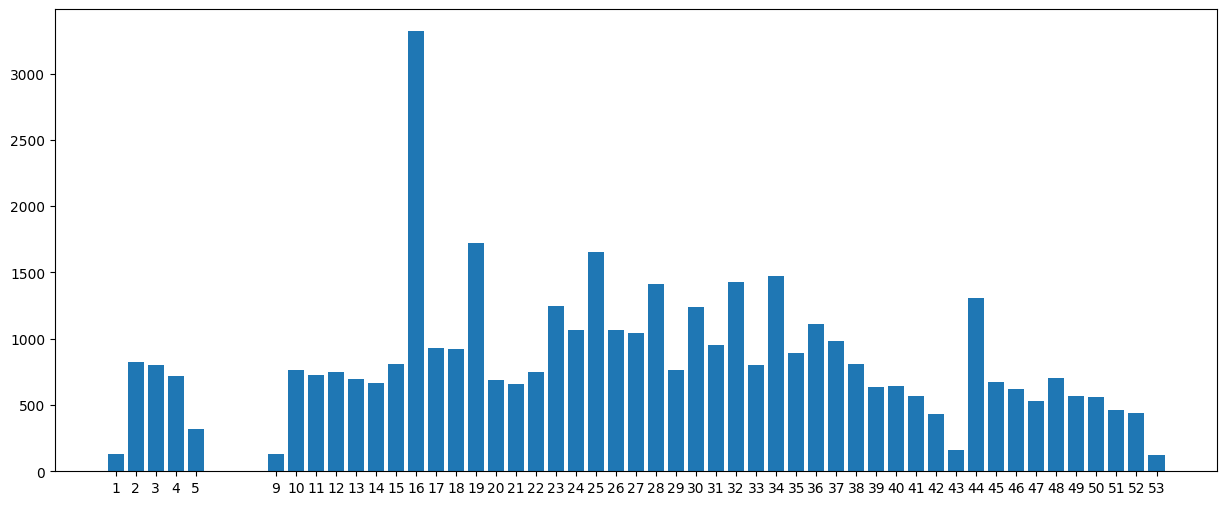

In [ ]:
plt.figure(figsize=(15,6))
plt.bar(x=ha_wk['week'],height=ha_wk['discount_per'])
plt.xticks(ha_wk['week'])
plt.show()

# 16,19,23,25,28,30,32,34,44
## impacting gmv

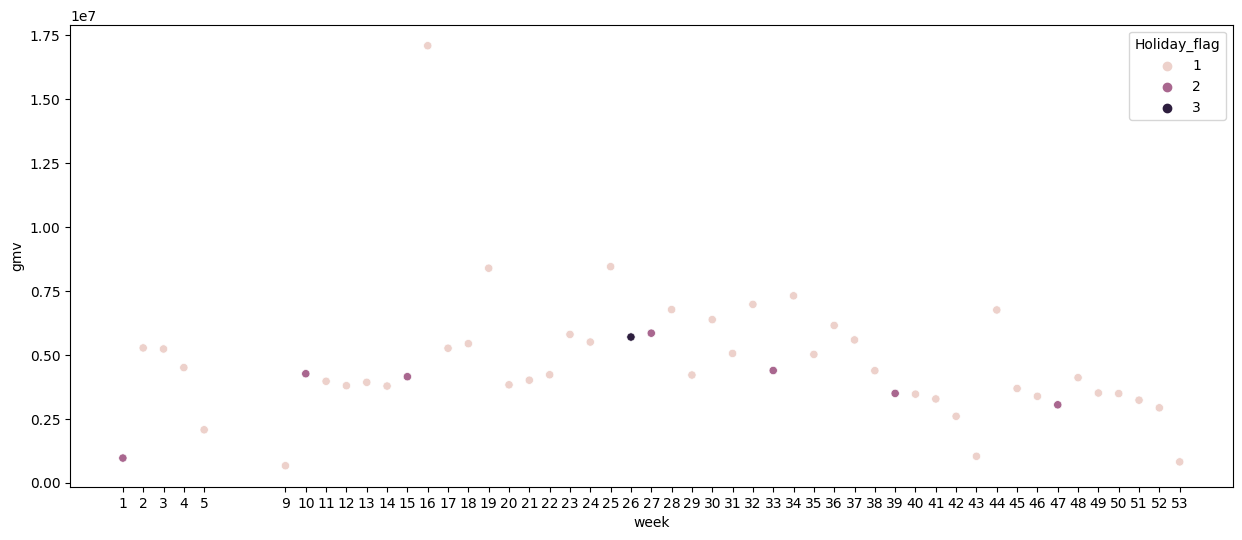

In [ ]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=ha_wk['week'],y=ha_wk['gmv'],hue=ha_wk['Holiday_flag'])
plt.xticks(ha_wk['week'])
plt.show()


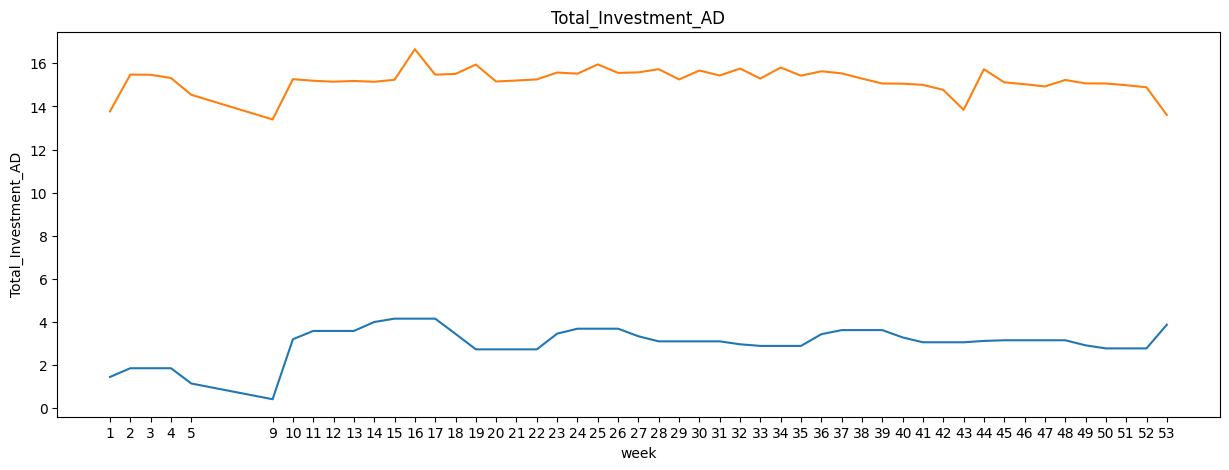

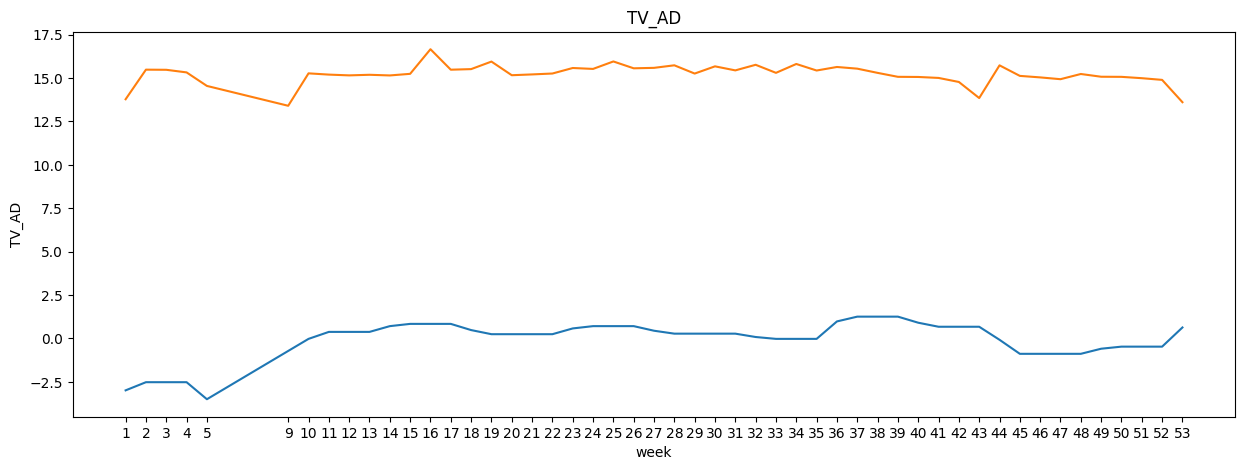

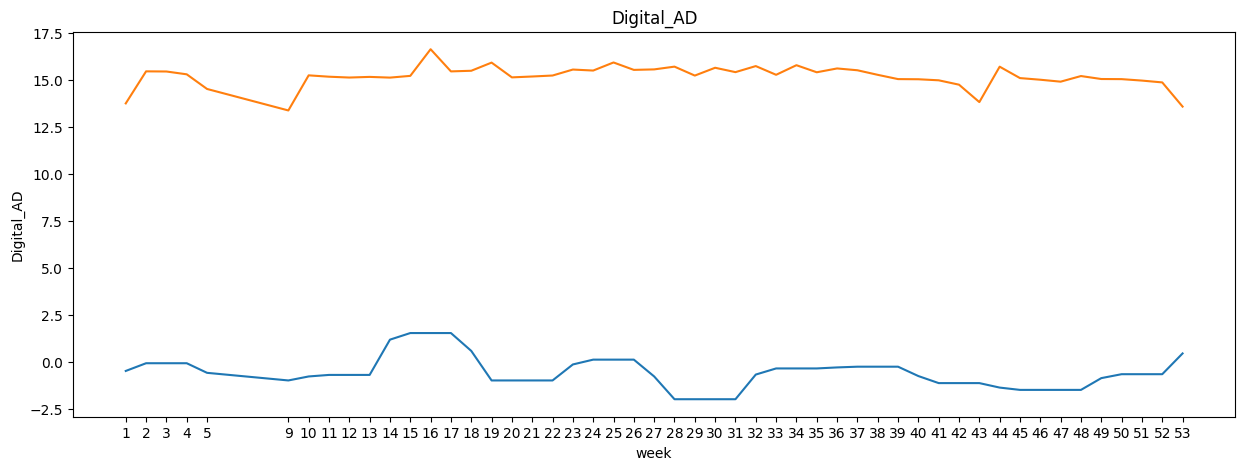

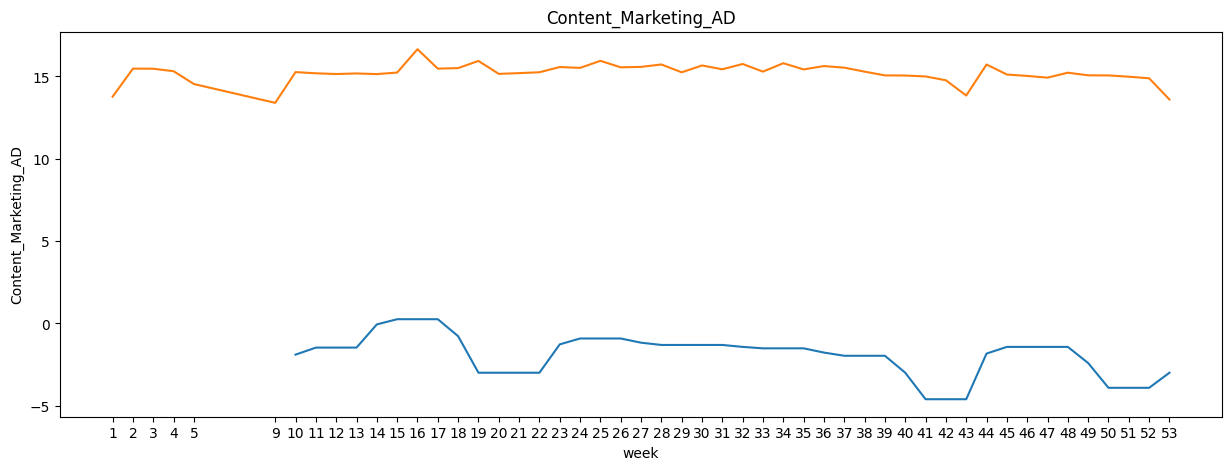

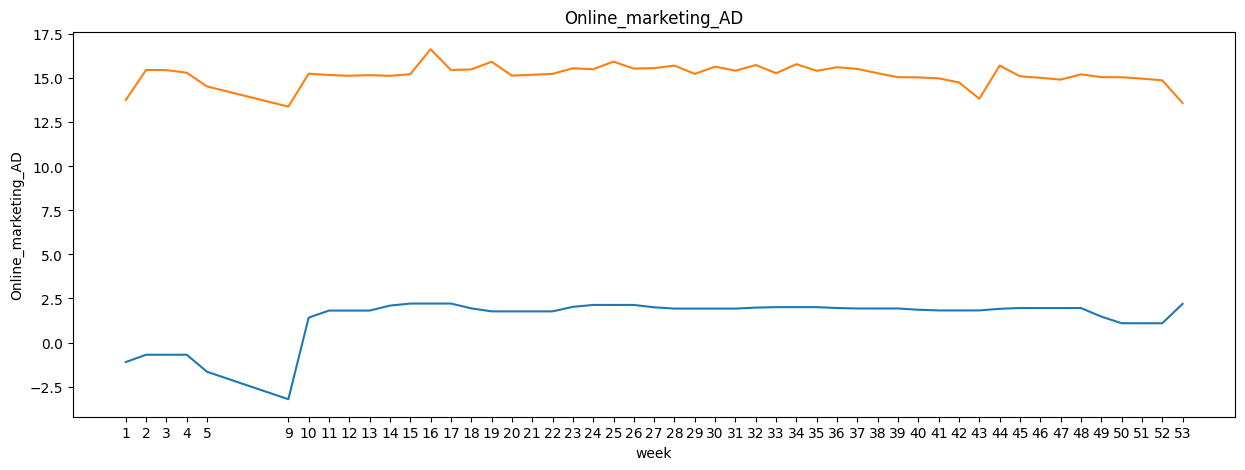

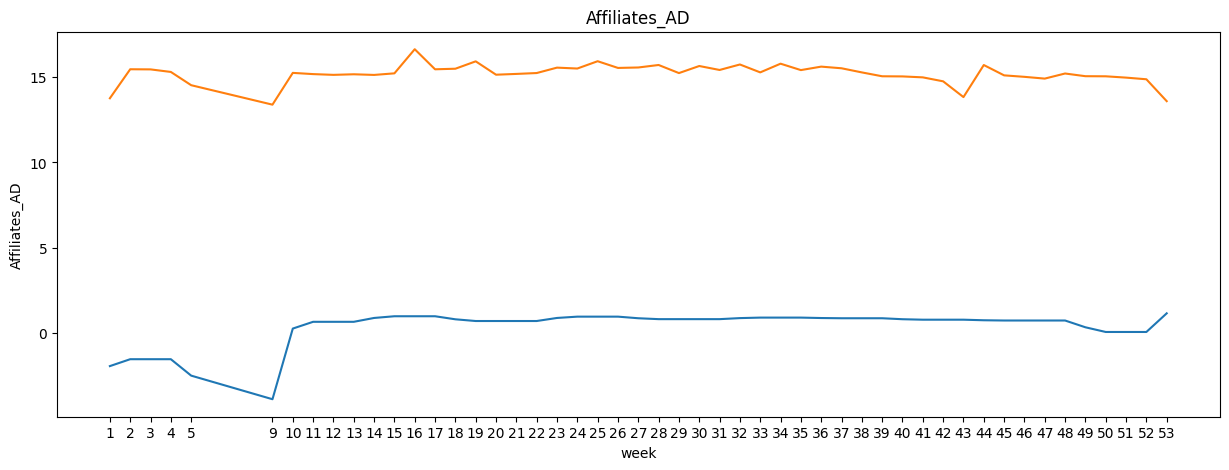

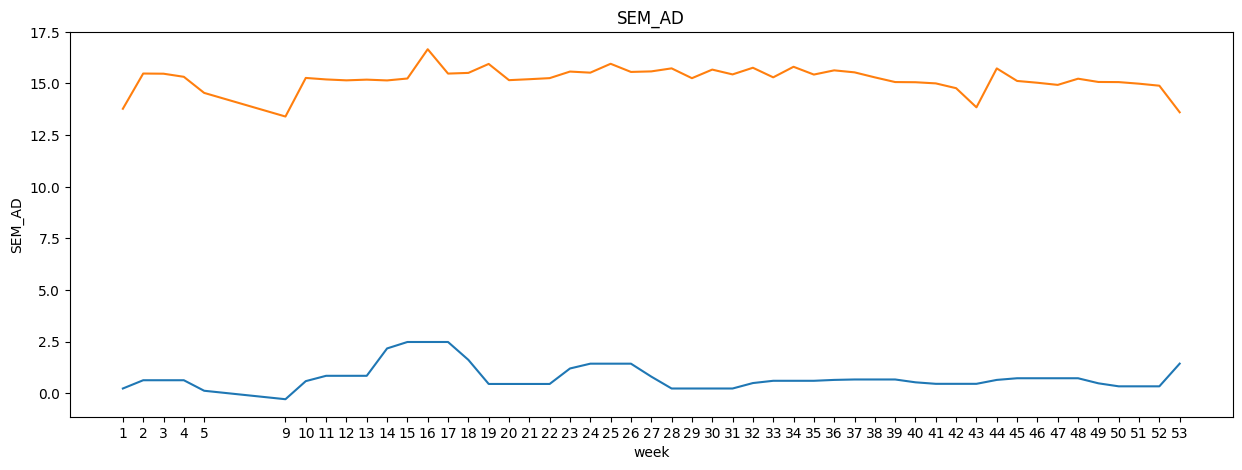

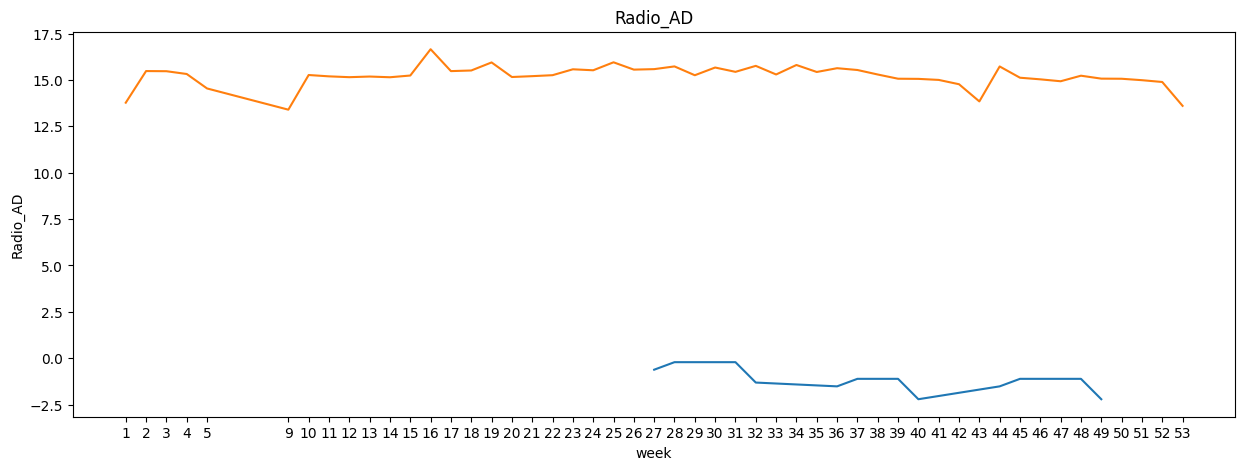

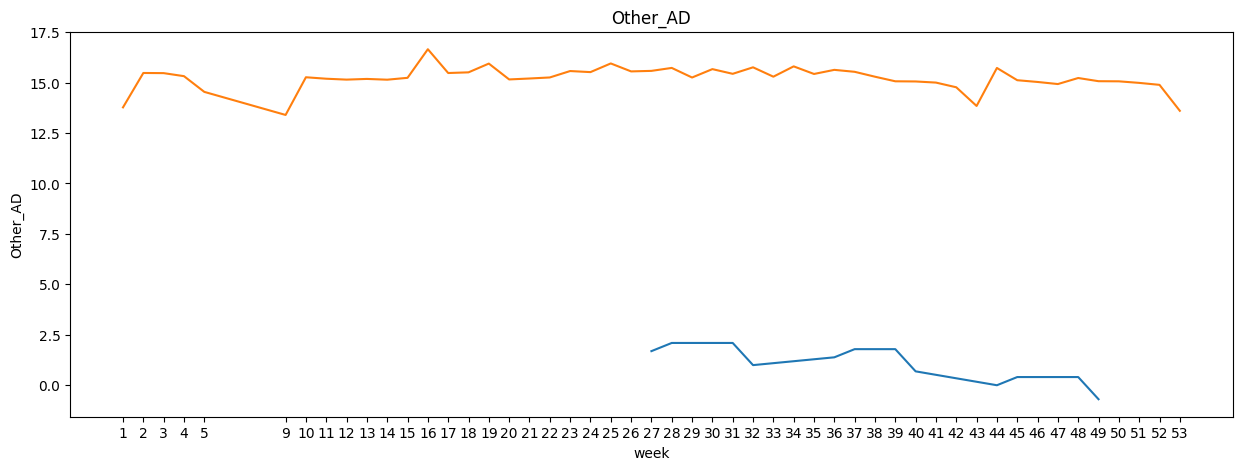

In [ ]:
markinv = ['Total_Investment_AD', 'TV_AD','Digital_AD', 'Content_Marketing_AD', 'Online_marketing_AD','Affiliates_AD', 'SEM_AD', 'Radio_AD', 'Other_AD','gmv']

# average_sale_per_week
# plt.figure(figsize=(25, 19))
x=1
for i in markinv:
  if i != 'gmv':
    # plt.subplot(9,1,x)
    plt.figure(figsize=(15, 5))
    plt.title(i)
    sns.lineplot(x=ha_wk['week'],y=nm.log(ha_wk[i]))
    sns.lineplot(x=ha_wk['week'],y=nm.log(ha_wk['gmv']))
    plt.xticks(ha_wk['week'])
    x=x+1
    plt.show()

## radio , other , conent , digital and total : not required



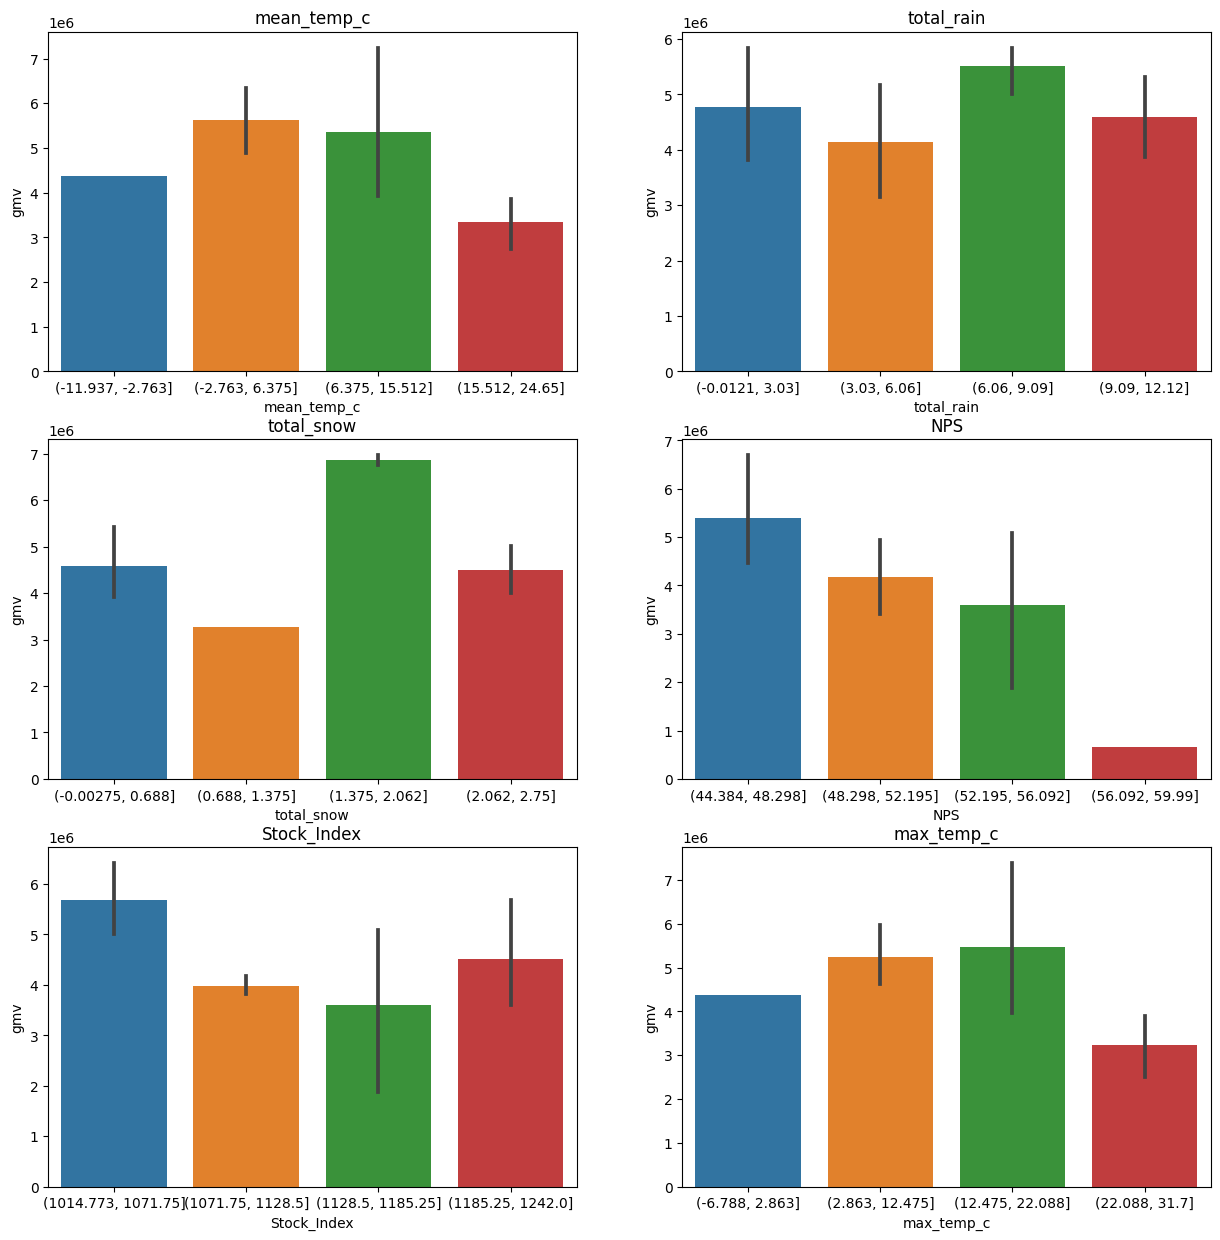

In [ ]:
wc = ['mean_temp_c', 'total_rain', 'total_snow','NPS',"Stock_Index",'max_temp_c']

plt.figure(figsize=(15, 15))
x=1
for i in wc:
  plt.subplot(3,2,x)
  plt.title(i)
  sns.barplot(y=ha_wk['gmv'],x=pd.cut(ha_wk[i],bins=4))
  x=x+1


# max and mean almost same impact : so max temp can be remobed

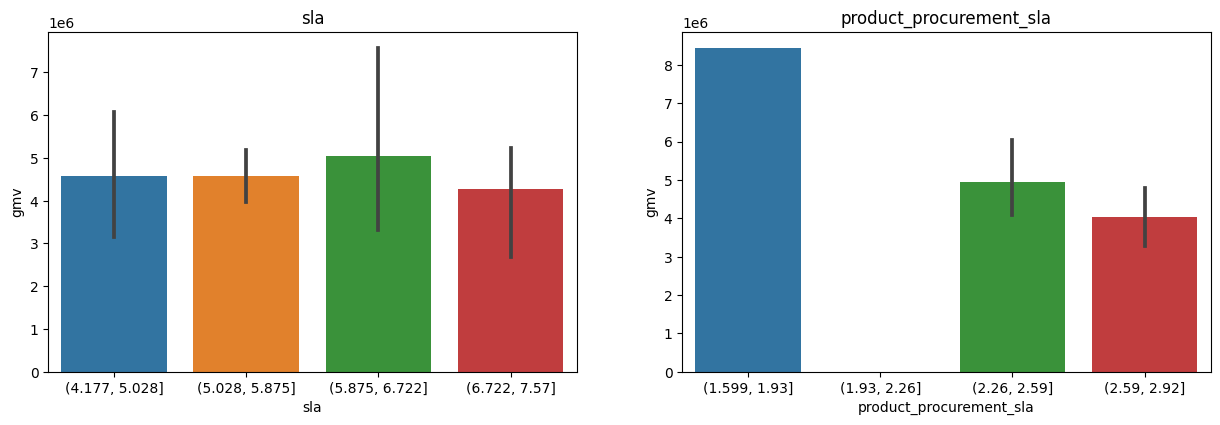

In [ ]:
wc = ['sla','product_procurement_sla']

plt.figure(figsize=(15, 15))
x=1
for i in wc:
  plt.subplot(3,2,x)
  plt.title(i)
  sns.barplot(y=ha_wk['gmv'],x=pd.cut(ha_wk[i],bins=4))
  x=x+1

## product procurement sla has a impact

In [731]:
ha_wk.drop(['sla','max_temp_c',"Radio_AD","Digital_AD","Content_Marketing_AD",
            "Total_Investment_AD","Holiday_flag","units","order_count","product_mrp","sales_per"],1,inplace=True)


In [732]:
ha_wk.drop(['Other_AD'],1,inplace=True)

df_train, df_test = train_test_split(ha_wk, train_size = 0.7, test_size = 0.3, random_state = 100)
scaler=MinMaxScaler()

scale_var=camera.columns
df_train[df_train.columns]=scaler.fit_transform(df_train[df_train.columns])
X_train=df_train.drop('gmv',1)
y_train=df_train['gmv']
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=18, step=1)
selector.fit(X_train, y_train)

# print(selector.support_)
# print(selector.ranking_)
df=pd.DataFrame(list(zip(X_train.columns,selector.support_,selector.ranking_)))
features =X_train.columns[selector.support_]
features



Index(['week', 'product_procurement_sla', 'listing_price', 'discount_per',
       'Stock_Index', 'NPS', 'pay_day_in_wk', 'fmradio', 'homeaudiospeaker',
       'mean_temp_c', 'cool_deg_c', 'total_rain', 'TV_AD', 'Sponsorship_AD',
       'Online_marketing_AD', 'Affiliates_AD', 'SEM_AD', 'cod_per'],
      dtype='object')

In [733]:
x_train_m =build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.746e+05
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           5.81e-39
Time:                        18:56:25   Log-Likelihood:                 227.57
No. Observations:                  35   AIC:                            -417.1
Df Residuals:                      16   BIC:                            -387.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features      VIF
15            Affiliates_AD  3575.20
8          homeaudiospeaker  3026.02
14      Online_marketing_AD  2796.32
2             listing_price  2465.63
3              discount_per   789.17
7                   fmradio    66.16
12                    TV_AD    60.16
9               mean_temp_c    54.04
1   product_procurement_sla    38.83
17                  cod_per    37.25
4               Stock_Index    31.80
13           Sponsorship_AD    31.15
16                   SEM_AD    23.95
10               cool_deg_c    13.49
0                      week    11.64
5                       NPS    11.25
11               total_rain     3.15
6             pay_day_in_wk     2.84

In [734]:
features=features.drop('Affiliates_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.736e+05
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           3.63e-41
Time:                        18:56:31   Log-Likelihood:                 225.41
No. Observations:                  35   AIC:                            -414.8
Df Residuals:                      17   BIC:                            -386.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features      VIF
8          homeaudiospeaker  2719.32
2             listing_price  2426.43
3              discount_per   677.38
14      Online_marketing_AD    67.62
7                   fmradio    65.62
9               mean_temp_c    45.06
16                  cod_per    34.45
13           Sponsorship_AD    30.86
1   product_procurement_sla    30.47
12                    TV_AD    17.81
4               Stock_Index    16.27
10               cool_deg_c    13.07
0                      week    11.62
5                       NPS    11.10
15                   SEM_AD    10.24
6             pay_day_in_wk     2.73
11               total_rain     2.70

In [735]:
features=features.drop('homeaudiospeaker',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.552e+05
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           6.34e-43
Time:                        18:56:41   Log-Likelihood:                 221.38
No. Observations:                  35   AIC:                            -408.8
Df Residuals:                      18   BIC:                            -382.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features     VIF
2             listing_price  614.43
3              discount_per  486.33
13      Online_marketing_AD   56.97
8               mean_temp_c   43.52
7                   fmradio   39.10
15                  cod_per   34.44
1   product_procurement_sla   26.91
12           Sponsorship_AD   21.44
4               Stock_Index   16.08
11                    TV_AD   15.60
9                cool_deg_c   12.35
5                       NPS   10.77
0                      week   10.29
14                   SEM_AD    9.74
6             pay_day_in_wk    2.72
10               total_rain    2.66

In [736]:
features=features.drop('listing_price',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     223.7
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           4.08e-18
Time:                        18:56:49   Log-Likelihood:                 104.92
No. Observations:                  35   AIC:                            -177.8
Df Residuals:                      19   BIC:                            -153.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
12      Online_marketing_AD  56.08
7               mean_temp_c  42.69
14                  cod_per  32.69
6                   fmradio  32.10
1   product_procurement_sla  22.25
11           Sponsorship_AD  19.48
10                    TV_AD  15.58
3               Stock_Index  15.48
2              discount_per  13.44
8                cool_deg_c  12.18
4                       NPS   9.90
0                      week   9.25
13                   SEM_AD   7.23
9                total_rain   2.65
5             pay_day_in_wk   2.54

In [737]:
features=features.drop('Online_marketing_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     242.7
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           3.65e-19
Time:                        18:56:58   Log-Likelihood:                 104.25
No. Observations:                  35   AIC:                            -178.5
Df Residuals:                      20   BIC:                            -155.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
7               mean_temp_c  41.19
6                   fmradio  28.17
13                  cod_per  21.23
1   product_procurement_sla  21.09
11           Sponsorship_AD  14.59
10                    TV_AD  13.81
3               Stock_Index  12.64
2              discount_per  10.59
8                cool_deg_c  10.40
4                       NPS   9.28
0                      week   7.56
12                   SEM_AD   6.95
9                total_rain   2.65
5             pay_day_in_wk   2.38

In [738]:
features=features.drop('mean_temp_c',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     268.6
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           2.67e-20
Time:                        18:57:05   Log-Likelihood:                 103.88
No. Observations:                  35   AIC:                            -179.8
Df Residuals:                      21   BIC:                            -158.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
6                   fmradio  26.07
12                  cod_per  21.16
1   product_procurement_sla  20.86
9                     TV_AD  13.39
10           Sponsorship_AD  11.48
2              discount_per  10.38
4                       NPS   9.25
3               Stock_Index   8.84
0                      week   7.46
11                   SEM_AD   6.49
7                cool_deg_c   4.38
8                total_rain   2.53
5             pay_day_in_wk   2.18

In [739]:
features=features.drop('fmradio',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     222.2
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           4.64e-20
Time:                        18:57:13   Log-Likelihood:                 98.380
No. Observations:                  35   AIC:                            -170.8
Df Residuals:                      22   BIC:                            -150.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
1   product_procurement_sla  20.40
11                  cod_per  19.67
8                     TV_AD  13.28
9            Sponsorship_AD  10.11
4                       NPS   8.45
3               Stock_Index   7.96
10                   SEM_AD   6.41
0                      week   5.62
2              discount_per   5.10
6                cool_deg_c   4.03
7                total_rain   2.33
5             pay_day_in_wk   2.15

In [740]:
features=features.drop('product_procurement_sla',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     229.7
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           8.58e-21
Time:                        18:57:22   Log-Likelihood:                 96.679
No. Observations:                  35   AIC:                            -169.4
Df Residuals:                      23   BIC:                            -150.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0284      0.038     -0.

Features    VIF
10         cod_per  13.63
7            TV_AD  12.86
8   Sponsorship_AD  10.00
2      Stock_Index   7.57
3              NPS   7.27
9           SEM_AD   6.33
0             week   5.62
1     discount_per   5.04
5       cool_deg_c   4.03
6       total_rain   2.29
4    pay_day_in_wk   2.15

In [741]:
features=features.drop('cod_per',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     252.0
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           8.75e-22
Time:                        18:57:30   Log-Likelihood:                 95.890
No. Observations:                  35   AIC:                            -169.8
Df Residuals:                      24   BIC:                            -152.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0041      0.020      0.

Features    VIF
7           TV_AD  11.66
8  Sponsorship_AD   9.77
3             NPS   7.25
2     Stock_Index   6.96
9          SEM_AD   5.99
0            week   5.62
1    discount_per   3.72
5      cool_deg_c   3.52
6      total_rain   2.17
4   pay_day_in_wk   2.09

In [742]:
features=features.drop('week',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     291.6
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           4.93e-23
Time:                        18:57:37   Log-Likelihood:                 95.890
No. Observations:                  35   AIC:                            -171.8
Df Residuals:                      25   BIC:                            -156.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0041      0.020      0.

Features   VIF
7  Sponsorship_AD  9.76
6           TV_AD  8.38
2             NPS  6.92
8          SEM_AD  4.99
1     Stock_Index  4.91
0    discount_per  3.67
4      cool_deg_c  3.29
5      total_rain  2.17
3   pay_day_in_wk  2.09

In [743]:
features=features.drop('TV_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     340.8
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           2.60e-24
Time:                        18:57:50   Log-Likelihood:                 95.870
No. Observations:                  35   AIC:                            -173.7
Df Residuals:                      26   BIC:                            -159.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0060      0.016      0.

Features   VIF
2             NPS  5.63
1     Stock_Index  4.74
7          SEM_AD  4.67
6  Sponsorship_AD  4.48
0    discount_per  3.31
4      cool_deg_c  2.37
3   pay_day_in_wk  2.09
5      total_rain  1.92

In [744]:
features=features.drop('Stock_Index',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     399.6
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           1.45e-25
Time:                        18:58:01   Log-Likelihood:                 95.659
No. Observations:                  35   AIC:                            -175.3
Df Residuals:                      27   BIC:                            -162.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0019      0.014      0.

Features   VIF
5  Sponsorship_AD  4.46
6          SEM_AD  4.29
1             NPS  3.94
0    discount_per  3.27
3      cool_deg_c  2.37
4      total_rain  1.92
2   pay_day_in_wk  1.88

In [745]:
features=features.drop('total_rain',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     480.7
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           6.79e-27
Time:                        18:58:10   Log-Likelihood:                 95.561
No. Observations:                  35   AIC:                            -177.1
Df Residuals:                      28   BIC:                            -166.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4.836e-05      0.012      0.

Features   VIF
4  Sponsorship_AD  4.30
5          SEM_AD  4.14
1             NPS  3.34
0    discount_per  3.22
3      cool_deg_c  2.13
2   pay_day_in_wk  1.81

In [746]:
features=features.drop('Sponsorship_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     583.9
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           3.64e-28
Time:                        18:58:20   Log-Likelihood:                 95.164
No. Observations:                  35   AIC:                            -178.3
Df Residuals:                      29   BIC:                            -169.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0066      0.009     -0.711

Features   VIF
1            NPS  3.30
0   discount_per  3.04
4         SEM_AD  2.10
3     cool_deg_c  2.06
2  pay_day_in_wk  1.79

In [747]:
features=features.drop('pay_day_in_wk',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     713.7
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           2.85e-29
Time:                        18:58:26   Log-Likelihood:                 94.187
No. Observations:                  35   AIC:                            -178.4
Df Residuals:                      30   BIC:                            -170.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0049      0.009     -0.531   

Features   VIF
1           NPS  3.02
0  discount_per  2.99
2    cool_deg_c  2.05
3        SEM_AD  2.03

In [748]:
lm = sm.OLS(y_train,X_train[features]).fit() # fitting the model
print(lm.summary()) # model summary
y_train_pred=lm.predict(X_train[features])

                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              2618.
Date:                Sat, 07 Oct 2023   Prob (F-statistic):                    1.01e-38
Time:                        18:58:37   Log-Likelihood:                          94.023
No. Observations:                  35   AIC:                                     -180.0
Df Residuals:                      31   BIC:                                     -173.8
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

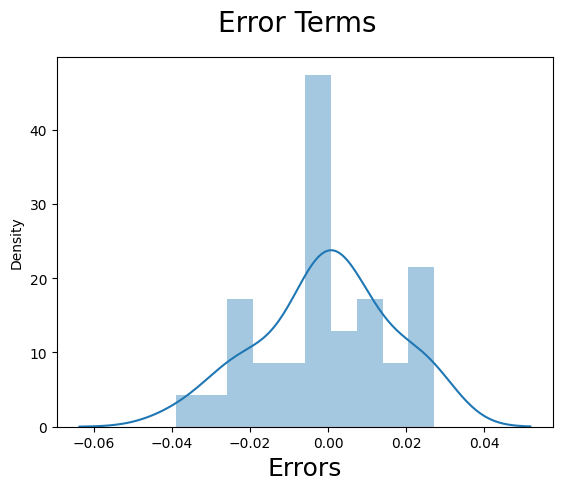

Text(0, 0.5, 'y_pred')

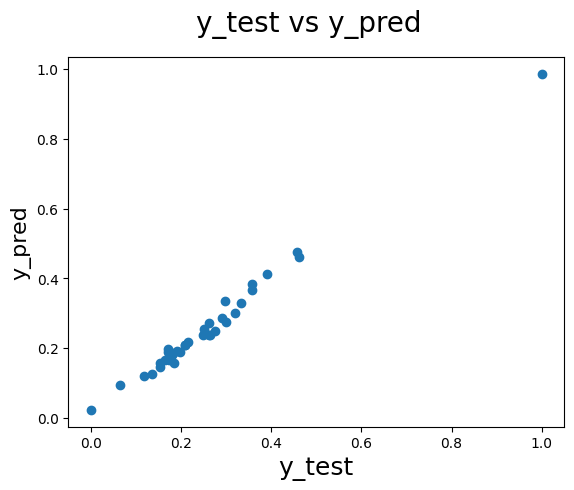

In [749]:
fig=plt.figure()
sns.distplot((y_train-y_train_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train ,y_train_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)


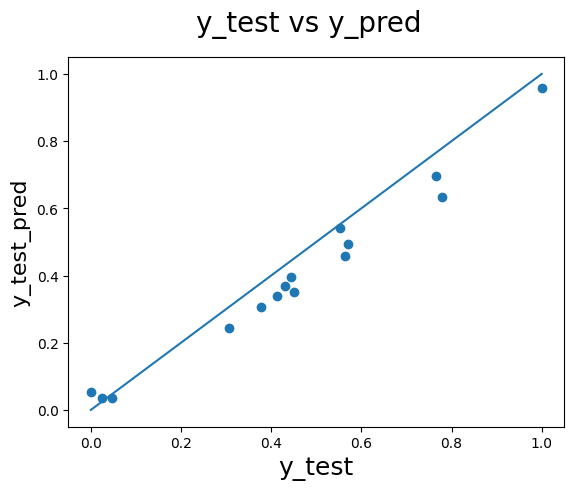

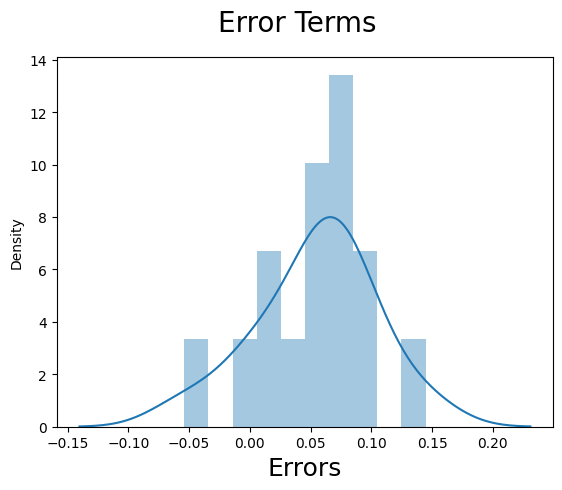

In [750]:
df_test[df_train.columns]=scaler.fit_transform(df_test[df_train.columns])
X_test=df_test.drop('gmv',1)
y_test=df_test['gmv']
X_test=sm.add_constant(X_test)
X_test=X_test[features]
y_test_pred=lm.predict(X_test)

# Plotting y_test and y_pred to understand the spread

fig,ax = plt.subplots()
ax.scatter(y_test, y_test_pred )
fig.suptitle('y_test vs y_pred', fontsize = 20)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])#,  lw=1)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

fig=plt.figure()
sns.distplot((y_test-y_test_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()


Multiplicative

In [ ]:

# ha_wk=ha.groupby(['week']).agg({"order_item_id":"nunique",'gmv':'sum','units':'sum','order_payment_type':'sum','sla':'mean',
#                                         'product_mrp':'sum','product_procurement_sla':'mean','listing_price':'sum',
#                                          'discount_per':'sum','Stock_Index':'max','NPS':'max','pay_date_flag':'max',
#                                           "Holiday_flag": "nunique",'sale_date':"nunique"}).round(2)

# ha_wk=pd.merge(ha_wk,weekly_kpis,on='week')

# ha_wk.rename(columns={"sales_date":"num_of_sales"},inplace=True)

# ha_wk.drop(['heat_deg_c','mon_temp_c','Year','Month','Day','Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
#        'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other'],1,inplace=True)

# ha_wk.order_payment_type.value_counts()
# ha_wk.rename(columns={'order_item_id':'order_count',"order_payment_type":"order_payment_cod",'mon_temp_c':"min_temp_c","pay_date_flag":"pay_day_in_wk"},inplace=True)
# ha_wk["cod_per"]=ha_wk["order_payment_cod"]/ha_wk["order_count"]
# ha_wk.drop("order_payment_cod",1,inplace=True)
# ha_wk.rename(columns={'sale_date':"num_of_sales"},inplace=True)
# ha_wk['sales_per']=(ha_wk['num_of_sales']-1)/7
# ha_wk.drop('num_of_sales',1,inplace=True)

In [751]:
ha_wk[ha_wk.columns]=nm.log(ha_wk[ha_wk.columns])

ha_wk=ha_wk.replace([nm.inf, -nm.inf], 0)
ha_wk=ha_wk.fillna(0)

# ha_wk.drop(['product_mrp','order_count','Other_AD','units'],1,inplace=True)

In [752]:
df_train, df_test = train_test_split(ha_wk, train_size = 0.7, test_size = 0.3, random_state = 100)
scaler=MinMaxScaler()

scale_var=camera.columns
df_train[df_train.columns]=scaler.fit_transform(df_train[df_train.columns])
X_train=df_train.drop('gmv',1)
y_train=df_train['gmv']
# X_train


In [753]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=15, step=1)
selector.fit(X_train, y_train)

df=pd.DataFrame(list(zip(X_train.columns,selector.support_,selector.ranking_)))
features =X_train.columns[selector.support_]
features


Index(['week', 'product_procurement_sla', 'listing_price', 'discount_per',
       'Stock_Index', 'NPS', 'fmradio', 'homeaudiospeaker', 'mean_temp_c',
       'total_rain', 'Sponsorship_AD', 'Online_marketing_AD', 'Affiliates_AD',
       'SEM_AD', 'cod_per'],
      dtype='object')

In [754]:
x_train_m =build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.923e+05
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           5.92e-46
Time:                        18:59:02   Log-Likelihood:                 223.40
No. Observations:                  35   AIC:                            -414.8
Df Residuals:                      19   BIC:                            -389.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features       VIF
11      Online_marketing_AD  12260.77
12            Affiliates_AD  11846.83
7          homeaudiospeaker   6428.38
2             listing_price   4503.71
3              discount_per   2140.76
6                   fmradio    158.87
14                  cod_per     93.32
0                      week     60.55
10           Sponsorship_AD     52.40
1   product_procurement_sla     33.76
8               mean_temp_c     20.97
13                   SEM_AD     17.68
5                       NPS     14.14
4               Stock_Index     11.33
9                total_rain      8.84

In [755]:
features=features.drop('Online_marketing_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.492e+05
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           5.18e-47
Time:                        18:59:09   Log-Likelihood:                 216.86
No. Observations:                  35   AIC:                            -403.7
Df Residuals:                      20   BIC:                            -380.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features      VIF
7          homeaudiospeaker  5675.82
2             listing_price  4484.69
3              discount_per  1566.33
11            Affiliates_AD   149.26
6                   fmradio   143.25
13                  cod_per    78.10
0                      week    55.54
10           Sponsorship_AD    50.84
1   product_procurement_sla    32.84
8               mean_temp_c    19.90
12                   SEM_AD    14.22
5                       NPS    11.84
4               Stock_Index    11.13
9                total_rain     8.83

In [756]:
features=features.drop('homeaudiospeaker',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.507e+05
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           4.00e-49
Time:                        18:59:15   Log-Likelihood:                 214.88
No. Observations:                  35   AIC:                            -401.8
Df Residuals:                      21   BIC:                            -380.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features      VIF
2             listing_price  1200.68
3              discount_per  1115.26
10            Affiliates_AD   116.61
6                   fmradio    74.22
12                  cod_per    61.79
0                      week    54.72
9            Sponsorship_AD    36.58
1   product_procurement_sla    29.22
7               mean_temp_c    18.65
11                   SEM_AD    12.68
5                       NPS    10.90
4               Stock_Index     9.67
8                total_rain     8.77

In [757]:
features=features.drop('listing_price',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     174.2
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           6.49e-19
Time:                        18:59:21   Log-Likelihood:                 94.503
No. Observations:                  35   AIC:                            -163.0
Df Residuals:                      22   BIC:                            -142.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features     VIF
9             Affiliates_AD  110.29
5                   fmradio   74.15
11                  cod_per   57.28
0                      week   51.70
2              discount_per   46.28
8            Sponsorship_AD   35.37
1   product_procurement_sla   28.07
6               mean_temp_c   17.37
10                   SEM_AD   11.25
4                       NPS    9.98
3               Stock_Index    9.66
7                total_rain    8.68

In [758]:
features=features.drop('Affiliates_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     195.9
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           5.23e-20
Time:                        18:59:27   Log-Likelihood:                 94.258
No. Observations:                  35   AIC:                            -164.5
Df Residuals:                      23   BIC:                            -145.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
5                   fmradio  70.49
10                  cod_per  55.27
2              discount_per  42.90
8            Sponsorship_AD  29.52
0                      week  24.58
1   product_procurement_sla  23.46
6               mean_temp_c  15.18
9                    SEM_AD  11.14
3               Stock_Index   8.97
7                total_rain   7.73
4                       NPS   7.27

In [759]:
features=features.drop('fmradio',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     224.8
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           3.38e-21
Time:                        18:59:31   Log-Likelihood:                 94.249
No. Observations:                  35   AIC:                            -166.5
Df Residuals:                      24   BIC:                            -149.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
9                  cod_per  42.94
7           Sponsorship_AD  26.16
2             discount_per  23.68
1  product_procurement_sla  22.33
0                     week  18.79
5              mean_temp_c  14.84
8                   SEM_AD  11.00
3              Stock_Index   8.27
6               total_rain   7.73
4                      NPS   7.25

In [760]:
features=features.drop('cod_per',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     223.2
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           1.34e-21
Time:                        18:59:36   Log-Likelihood:                 91.596
No. Observations:                  35   AIC:                            -163.2
Df Residuals:                      25   BIC:                            -147.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
7           Sponsorship_AD  25.69
1  product_procurement_sla  19.28
0                     week  17.99
5              mean_temp_c  12.79
2             discount_per  11.83
8                   SEM_AD  10.99
3              Stock_Index   7.94
6               total_rain   7.56
4                      NPS   7.25

In [761]:
features=features.drop('Stock_Index',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     256.8
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           9.81e-23
Time:                        18:59:48   Log-Likelihood:                 91.309
No. Observations:                  35   AIC:                            -164.6
Df Residuals:                      26   BIC:                            -150.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
1  product_procurement_sla  19.26
6           Sponsorship_AD  17.20
0                     week  12.76
2             discount_per  11.47
4              mean_temp_c   8.47
7                   SEM_AD   8.00
5               total_rain   7.52
3                      NPS   7.07

In [762]:
features=features.drop('week',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     299.5
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           6.77e-24
Time:                        19:00:03   Log-Likelihood:                 91.008
No. Observations:                  35   AIC:                            -166.0
Df Residuals:                      27   BIC:                            -153.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
0  product_procurement_sla  18.25
5           Sponsorship_AD  10.64
1             discount_per   9.94
3              mean_temp_c   7.89
2                      NPS   7.07
4               total_rain   6.98
6                   SEM_AD   6.07

In [763]:
features=features.drop('product_procurement_sla',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     347.6
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           5.99e-25
Time:                        19:00:18   Log-Likelihood:                 90.291
No. Observations:                  35   AIC:                            -166.6
Df Residuals:                      28   BIC:                            -155.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0072      0.029     -0.

Features   VIF
4  Sponsorship_AD  9.94
0    discount_per  8.27
2     mean_temp_c  7.70
5          SEM_AD  5.95
1             NPS  5.89
3      total_rain  5.61

In [764]:
features=features.drop('total_rain',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     426.2
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           3.31e-26
Time:                        19:00:27   Log-Likelihood:                 90.054
No. Observations:                  35   AIC:                            -168.1
Df Residuals:                      29   BIC:                            -158.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0187      0.022     -0.

Features   VIF
3  Sponsorship_AD  9.81
2     mean_temp_c  7.67
0    discount_per  6.16
4          SEM_AD  5.90
1             NPS  5.12

In [765]:
features=features.drop('Sponsorship_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     511.4
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           3.96e-27
Time:                        19:00:37   Log-Likelihood:                 88.763
No. Observations:                  35   AIC:                            -167.5
Df Residuals:                      30   BIC:                            -159.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0347      0.020     -1.744   

Features   VIF
0  discount_per  5.44
2   mean_temp_c  5.44
1           NPS  4.92
3        SEM_AD  4.37

In [766]:
features=features.drop('SEM_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     679.1
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           2.39e-28
Time:                        19:00:59   Log-Likelihood:                 88.128
No. Observations:                  35   AIC:                            -168.3
Df Residuals:                      31   BIC:                            -162.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0336      0.020     -1.688   

Features   VIF
2   mean_temp_c  3.81
1           NPS  3.21
0  discount_per  2.82

In [767]:
lm = sm.OLS(y_train,X_train[features]).fit() # fitting the model
print(lm.summary()) # model summary
y_train_pred=lm.predict(X_train[features])


                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                              8097.
Date:                Sat, 07 Oct 2023   Prob (F-statistic):                    3.72e-46
Time:                        19:01:07   Log-Likelihood:                          86.589
No. Observations:                  35   AIC:                                     -167.2
Df Residuals:                      32   BIC:                                     -162.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

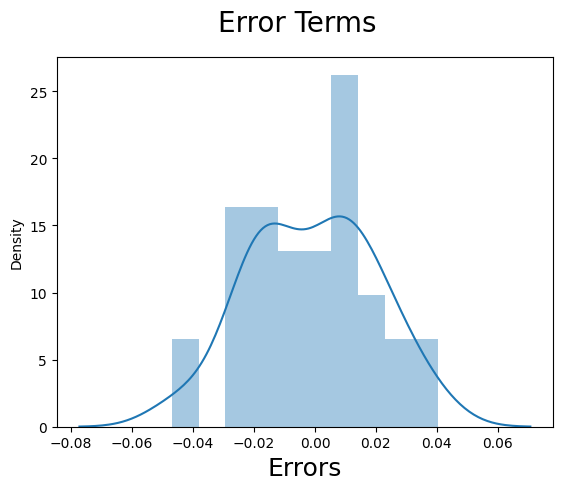

Text(0, 0.5, 'y_pred')

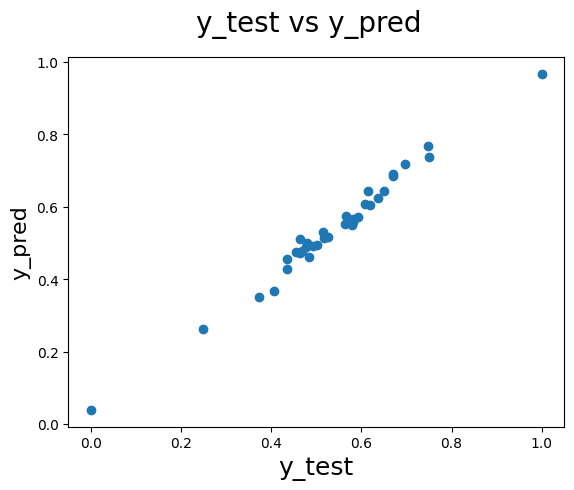

In [768]:
fig=plt.figure()
sns.distplot((y_train-y_train_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train ,y_train_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)


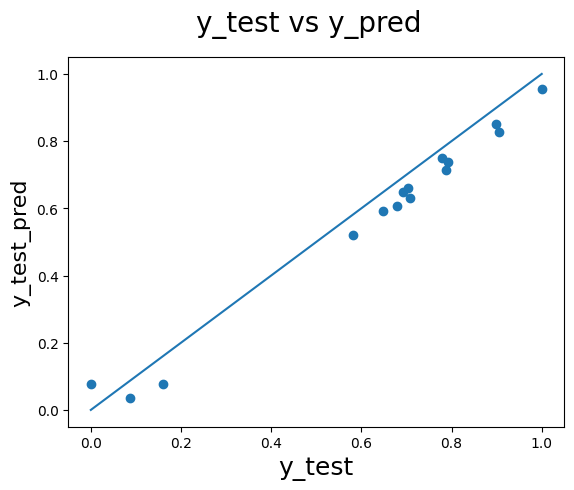

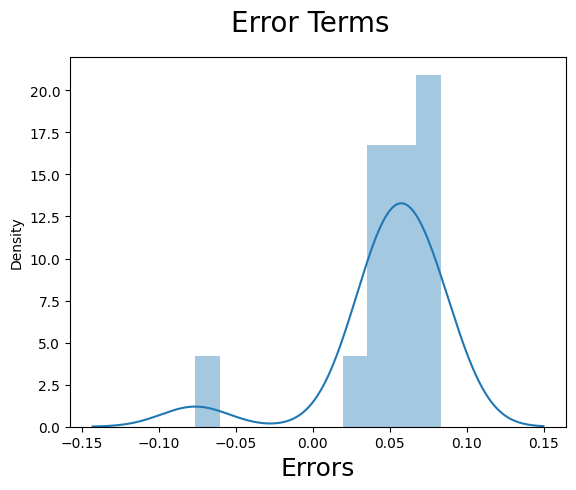

In [769]:
df_test[df_train.columns]=scaler.fit_transform(df_test[df_train.columns])
X_test=df_test.drop('gmv',1)
y_test=df_test['gmv']
X_test=sm.add_constant(X_test)
X_test=X_test[features]
y_test_pred=lm.predict(X_test)

# Plotting y_test and y_pred to understand the spread

fig,ax = plt.subplots()
ax.scatter(y_test, y_test_pred )
fig.suptitle('y_test vs y_pred', fontsize = 20)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])#,  lw=1)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

fig=plt.figure()
sns.distplot((y_test-y_test_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()


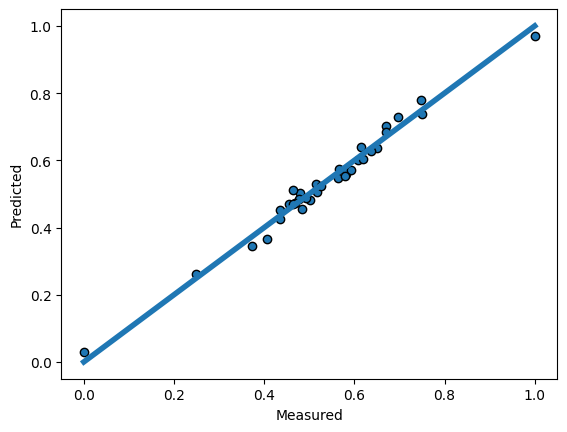

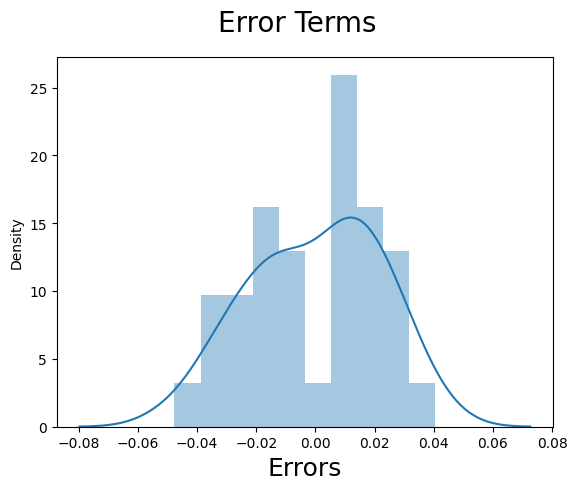

In [770]:
f = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train[features], y_train, scoring='r2', cv=f)
scores
y_pred = cross_val_predict(lm, X_train[features], y_train, cv=f)



fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],  lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

fig=plt.figure()
sns.distplot((y_train-y_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()


In [368]:
features

Index(['discount_per', 'NPS', 'SEM_AD'], dtype='object')

Gaming Accessories

In [428]:
game=EleData3[EleData3.product_analytic_sub_category=='gamingaccessory']
# game.discount_per


In [429]:
# game.columns
game_dum=pd.get_dummies(game.product_analytic_vertical_derived)
game=pd.concat([game,game_dum],axis=1)

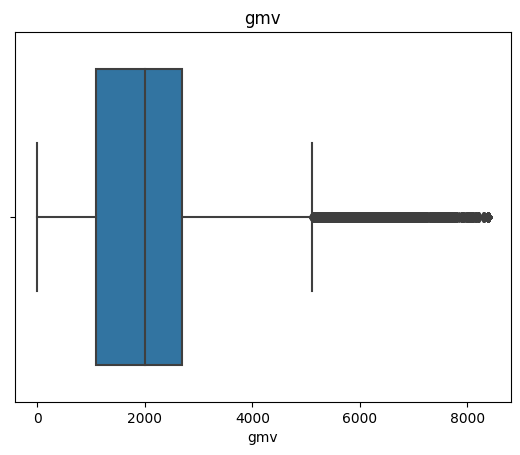

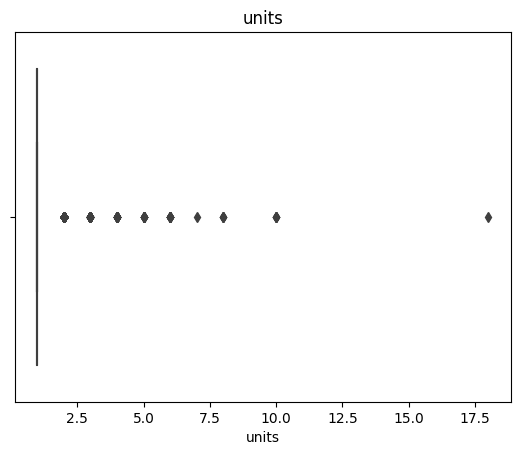

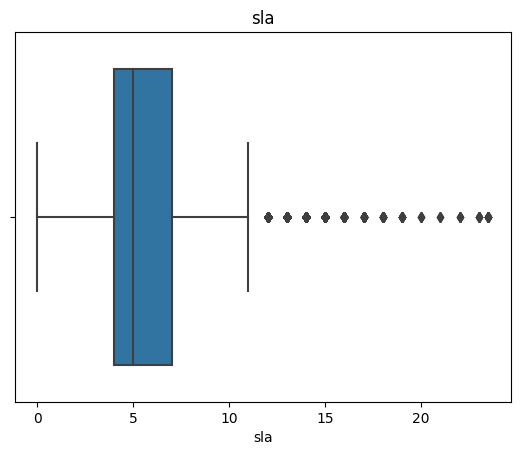

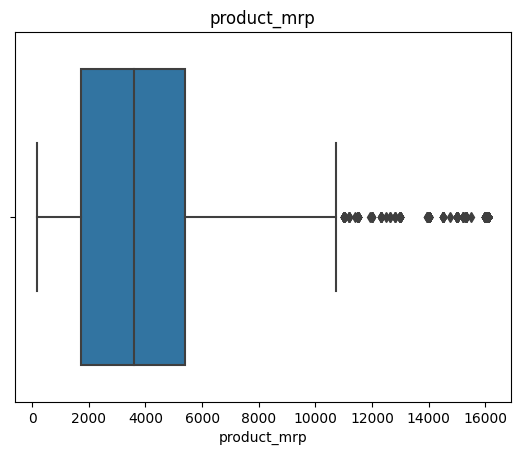

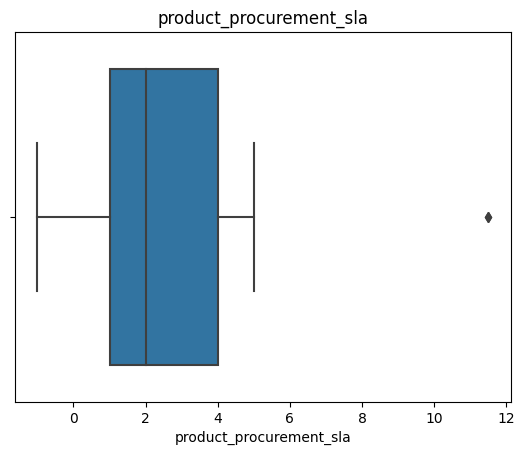

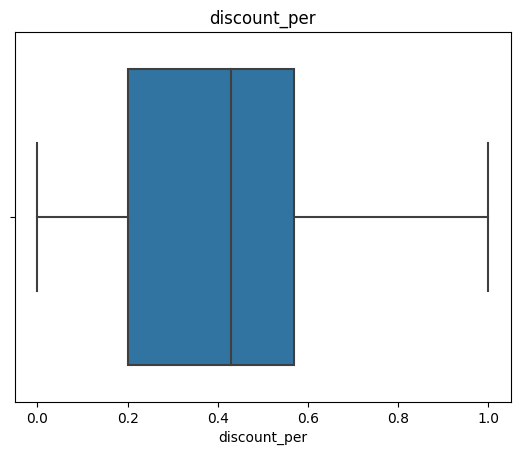

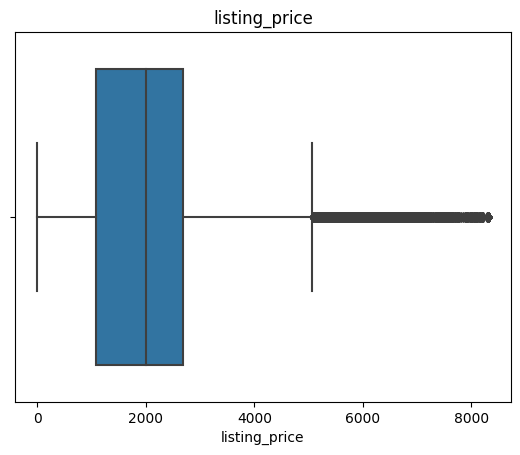

In [430]:
for i in num:
  sns.boxplot(x=ha[i])
  plt.title(i)
  plt.show()

In [431]:


q1=game['product_mrp'].quantile(0.25)
q3=game['product_mrp'].quantile(0.75)
iqr=q1+q3
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
game.loc[game['product_mrp']>up,'product_mrp']=up
game.loc[game['product_mrp']<lw,'product_mrp']=lw


q1=game['gmv'].quantile(0.25)
q3=game['gmv'].quantile(0.75)
iqr=q1+q3
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
game.loc[game['gmv']>up,'gmv']=up
game.loc[game['gmv']<lw,'gmv']=lw


q1=game['listing_price'].quantile(0.25)
q3=game['listing_price'].quantile(0.75)
iqr=q1+q3
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
game.loc[game['listing_price']>up,'listing_price']=up
game.loc[game['listing_price']<lw,'listing_price']=lw


q1=game['discount_per'].quantile(0.25)
q3=game['discount_per'].quantile(0.75)
iqr=q1+q3
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
# game[game['discount_per']>1.39]
q1=game['sla'].quantile(0.25)
q3=game['sla'].quantile(0.75)
iqr=q1+q3
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
game.loc[game['sla']>up,'sla']=up
game.loc[game['sla']<lw,'sla']=lw
q1=game['product_procurement_sla'].quantile(0.25)
q3=game['product_procurement_sla'].quantile(0.75)
iqr=q1+q3
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
game.loc[game['product_procurement_sla']>up,'product_procurement_sla']=up
game.loc[game['product_procurement_sla']<lw,'product_procurement_sla']=lw


-2924.5   5273.5
-1552.0   2776.0
-1488.5   2667.5
-1.07   1.9700000000000002
-12.5   23.5
-5.5   10.5


In [432]:
game_wk=game.groupby(['week']).agg({"order_item_id":"nunique",'gmv':'sum','units':'sum','order_payment_type':'sum','sla':'mean',
                                        'product_mrp':'sum','product_procurement_sla':'mean','listing_price':'sum',
                                         'discount_per':'sum','Stock_Index':'max','NPS':'max','pay_date_flag':'max',
                                          "Holiday_flag": "nunique",'sale_date':"nunique"}).round(2)

game_wk=pd.merge(game_wk,weekly_kpis,on='week')

game_wk.rename(columns={"sales_date":"num_of_sales"},inplace=True)

# game_wk.drop(['heat_deg_c','mon_temp_c','Year','Month','Day','Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
      #  'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other'],1,inplace=True)

game_wk.drop(['heat_deg_c','mon_temp_c','Year','Month','Day'],1,inplace=True)

game_wk.order_payment_type.value_counts()
game_wk.rename(columns={'order_item_id':'order_count',"order_payment_type":"order_payment_cod",'mon_temp_c':"min_temp_c","pay_date_flag":"pay_day_in_wk"},inplace=True)
game_wk["cod_per"]=game_wk["order_payment_cod"]/game_wk["order_count"]
game_wk.drop("order_payment_cod",1,inplace=True)
game_wk.rename(columns={'sale_date':"num_of_sales"},inplace=True)

game_wk['sales_per']=(game_wk['num_of_sales']-1)/7
game_wk.drop('num_of_sales',1,inplace=True)

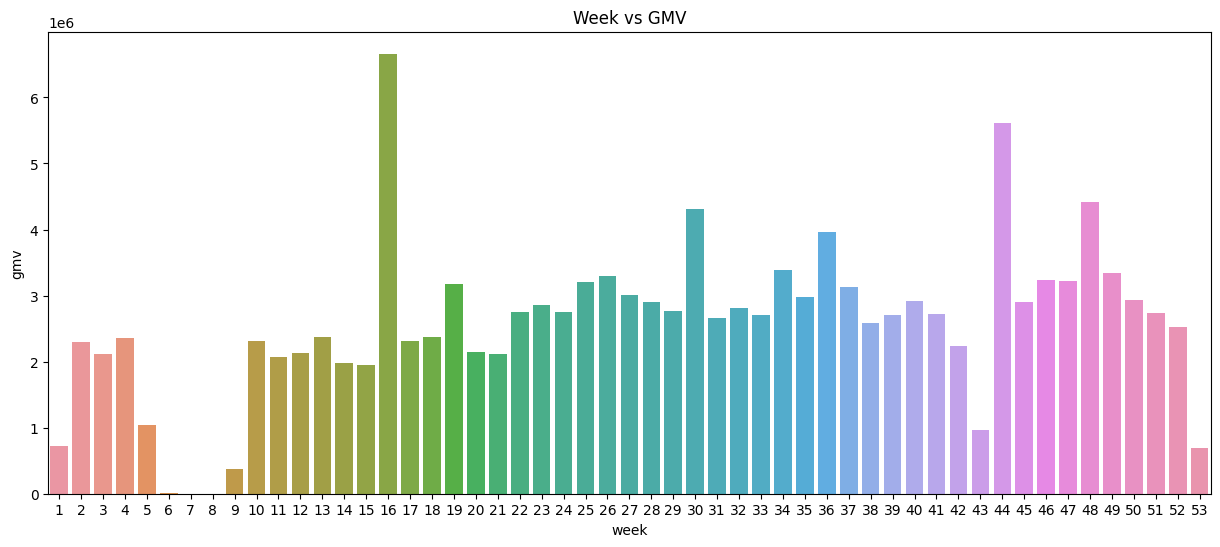

In [433]:
plt.figure(figsize=(15,6))
sns.barplot(x=game_wk['week'],y=game_wk['gmv'])
plt.title("Week vs GMV")
plt.show()
## 16 , 19, 20, 34, 36, 44

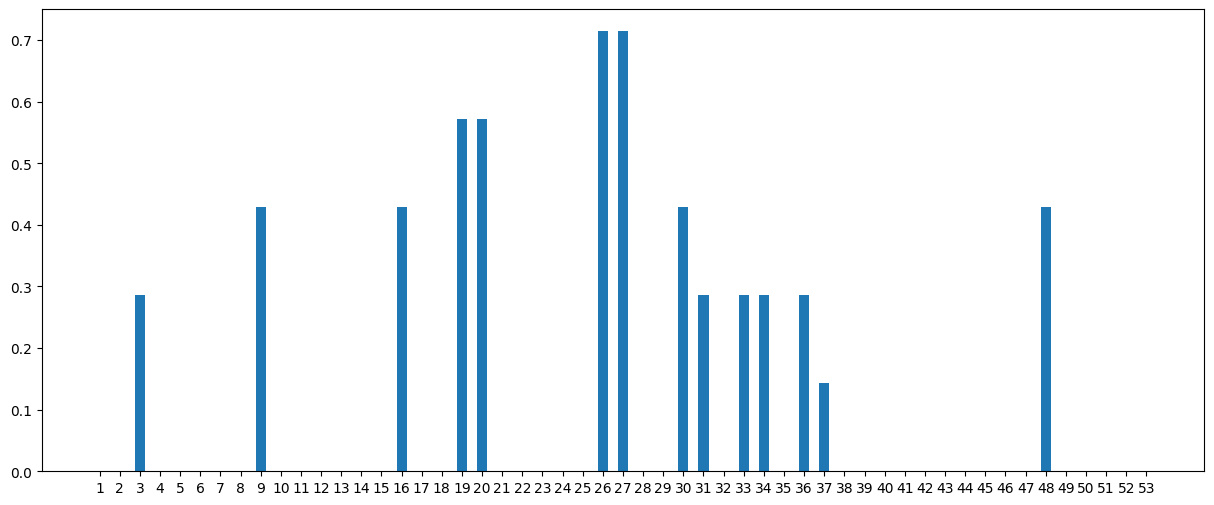

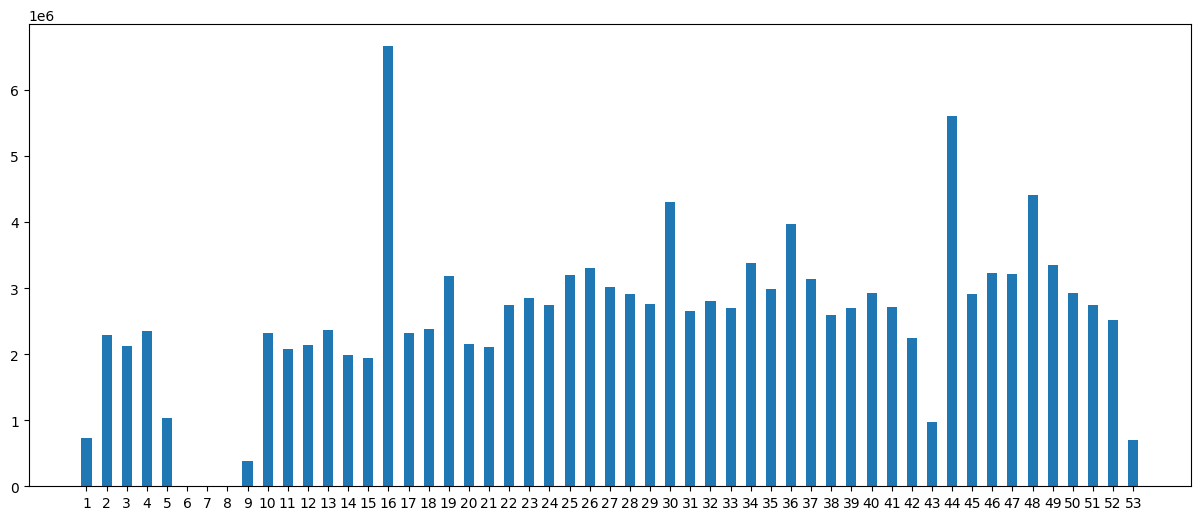

In [ ]:
plt.figure(figsize=(15,6))
width=0.5
plt.bar(x=game_wk['week'],height=game_wk['sales_per'],width=width)
plt.xticks(game_wk['week'])
plt.show()
plt.figure(figsize=(15,6))
plt.bar(x=game_wk['week'],height=game_wk['gmv'],width=width)
plt.xticks(game_wk['week'])
plt.show()


## sales per as impact

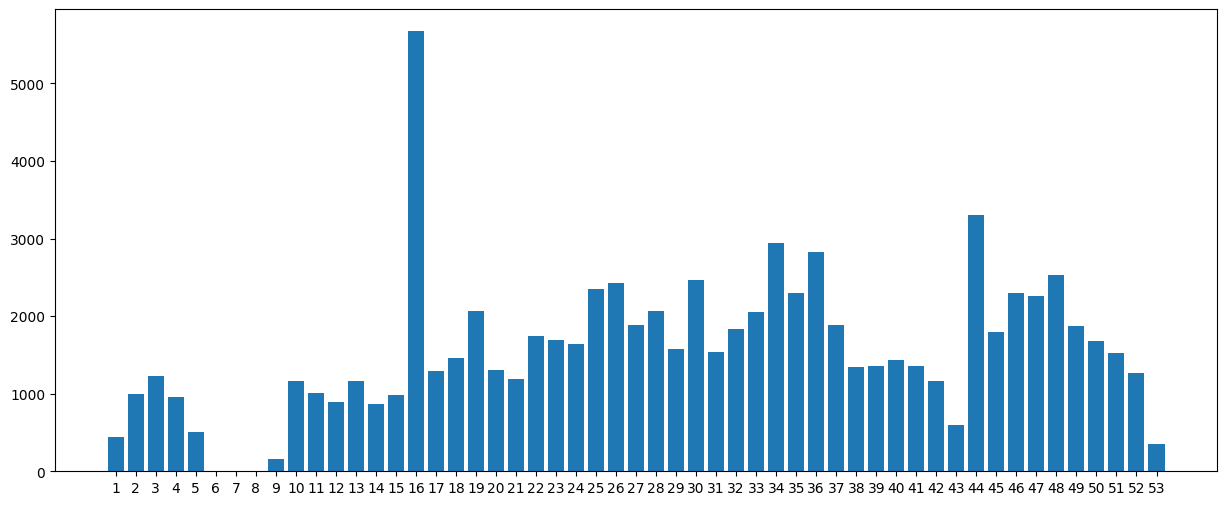

In [ ]:
plt.figure(figsize=(15,6))
plt.bar(x=game_wk['week'],height=game_wk['discount_per'])
plt.xticks(game_wk['week'])
plt.show()

## not very much changes because of discount


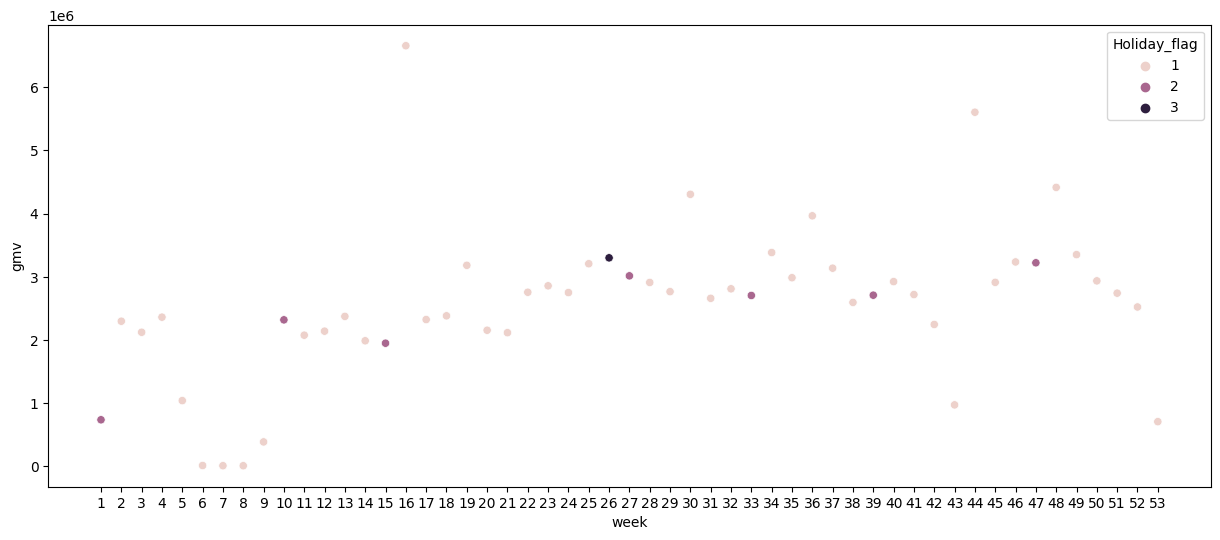

In [ ]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=game_wk['week'],y=game_wk['gmv'],hue=game_wk['Holiday_flag'])
plt.xticks(game_wk['week'])
plt.show()


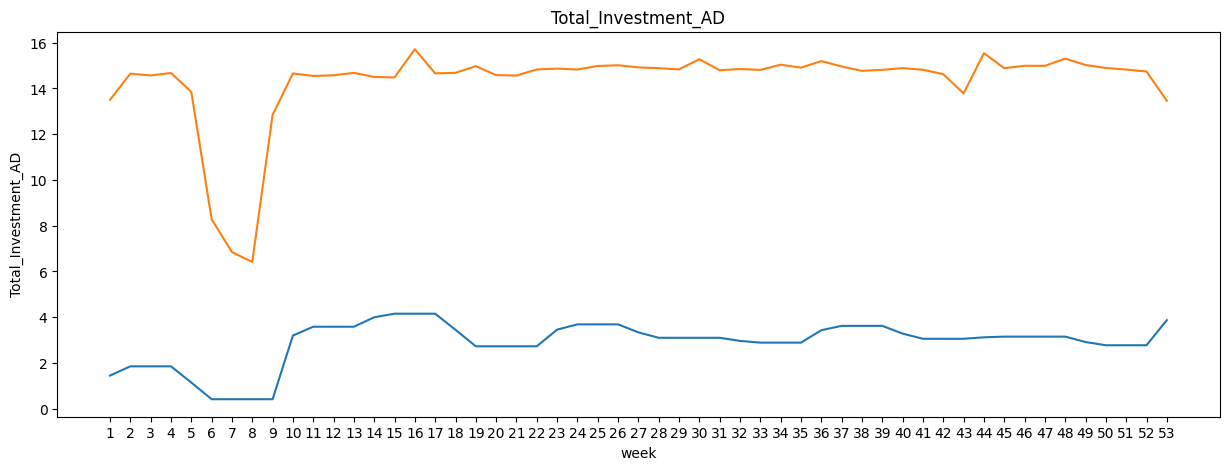

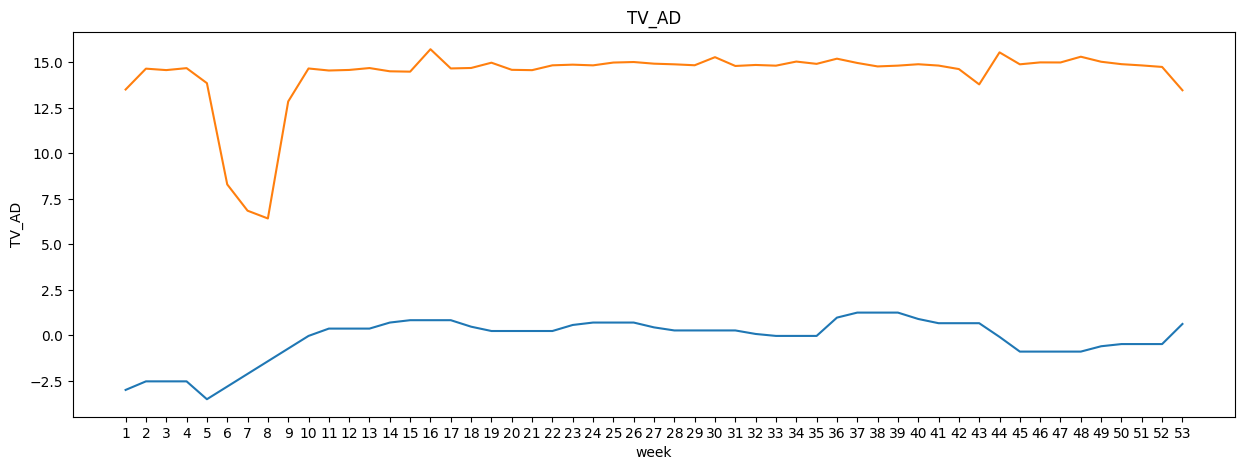

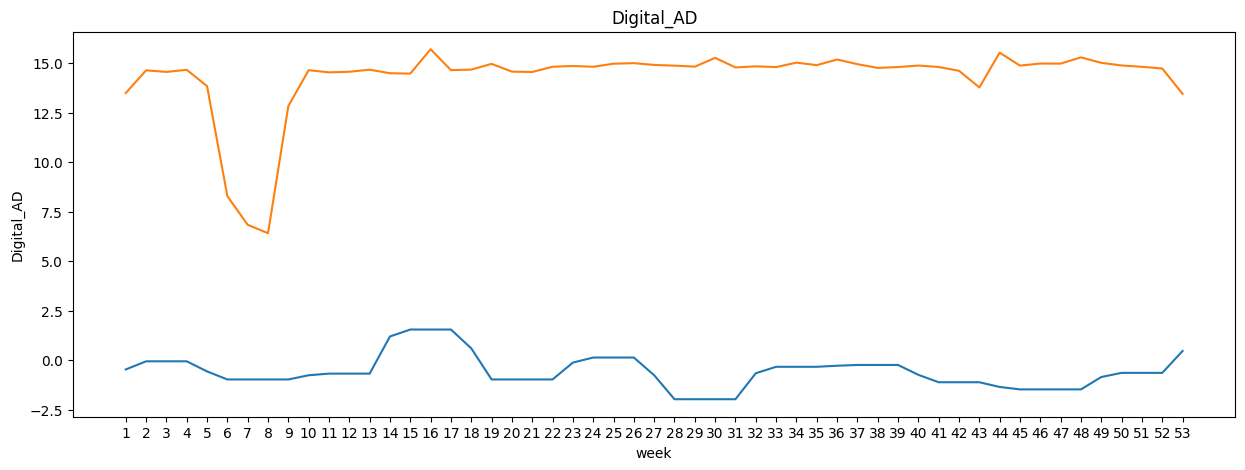

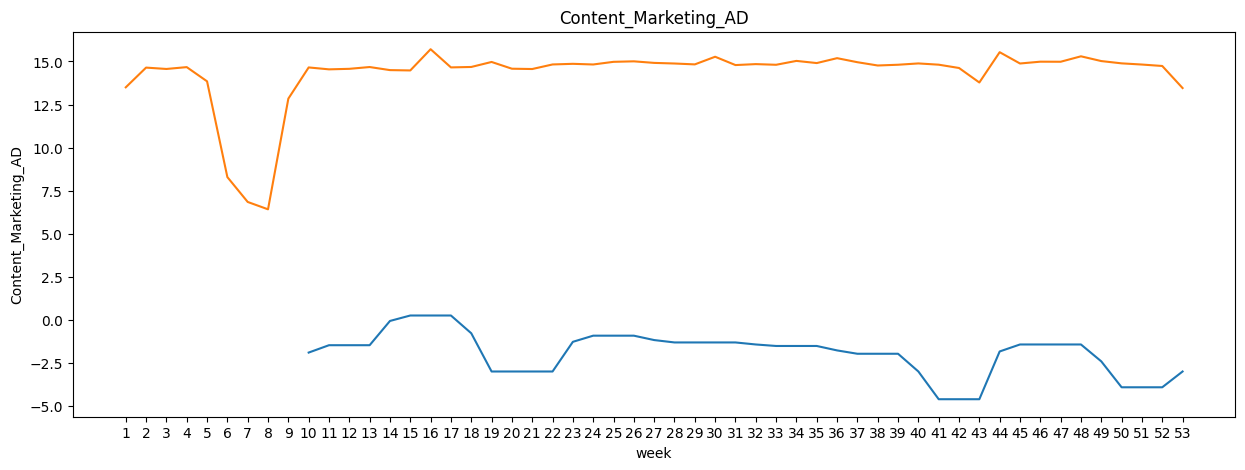

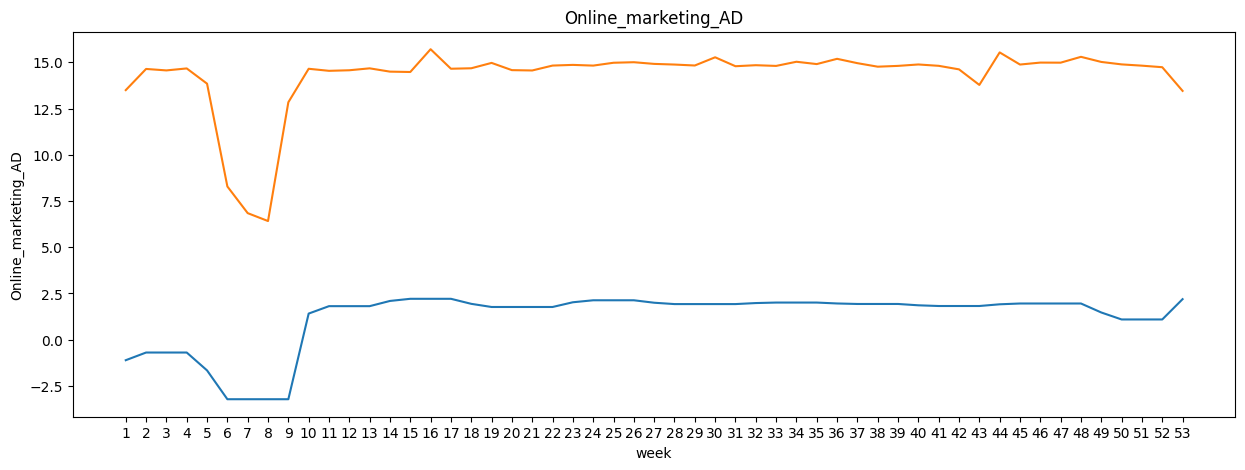

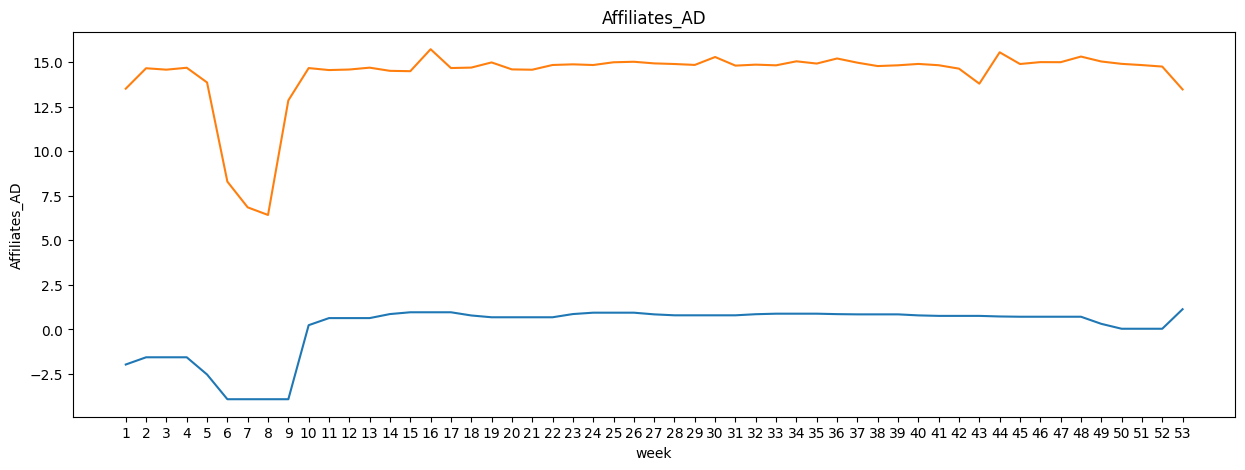

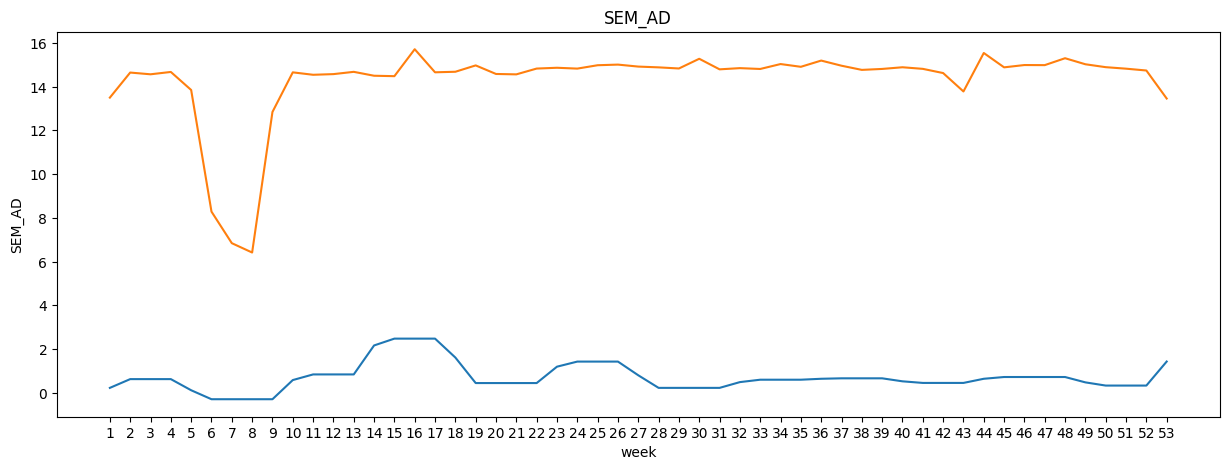

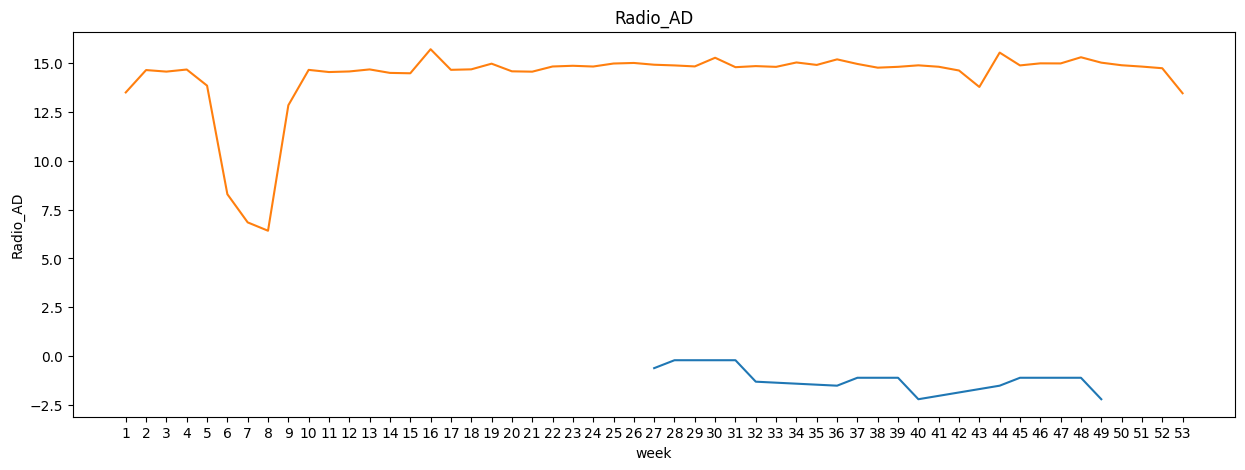

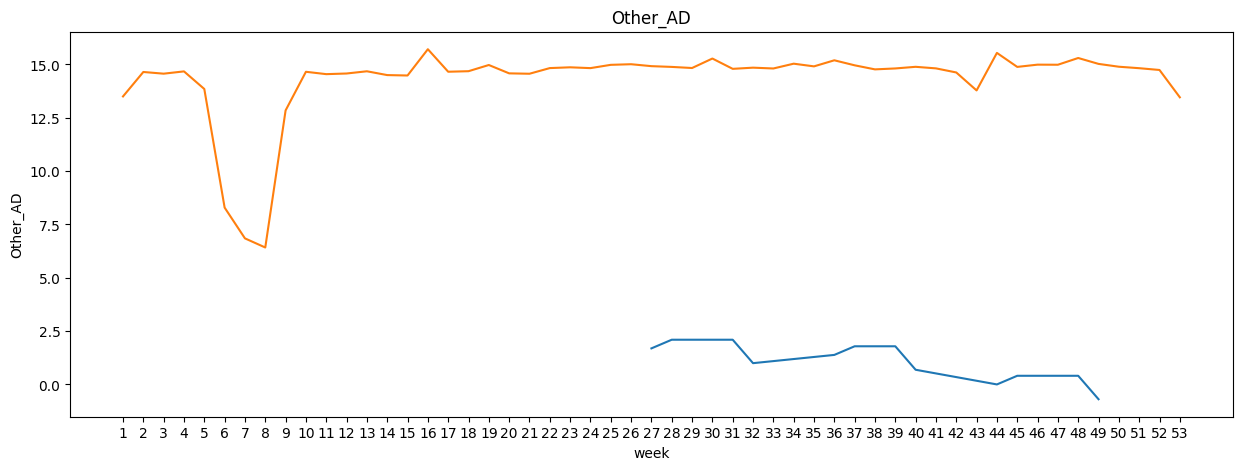

In [ ]:
markinv = ['Total_Investment_AD', 'TV_AD','Digital_AD', 'Content_Marketing_AD', 'Online_marketing_AD','Affiliates_AD', 'SEM_AD', 'Radio_AD', 'Other_AD','gmv']

# average_sale_per_week
# plt.figure(figsize=(25, 19))
x=1
for i in markinv:
  if i != 'gmv':
    # plt.subplot(9,1,x)
    plt.figure(figsize=(15, 5))
    plt.title(i)
    sns.lineplot(x=game_wk['week'],y=nm.log(game_wk[i]))
    sns.lineplot(x=game_wk['week'],y=nm.log(game_wk['gmv']))
    plt.xticks(game_wk['week'])
    x=x+1
    plt.show()

## affiliates , digital and other and total


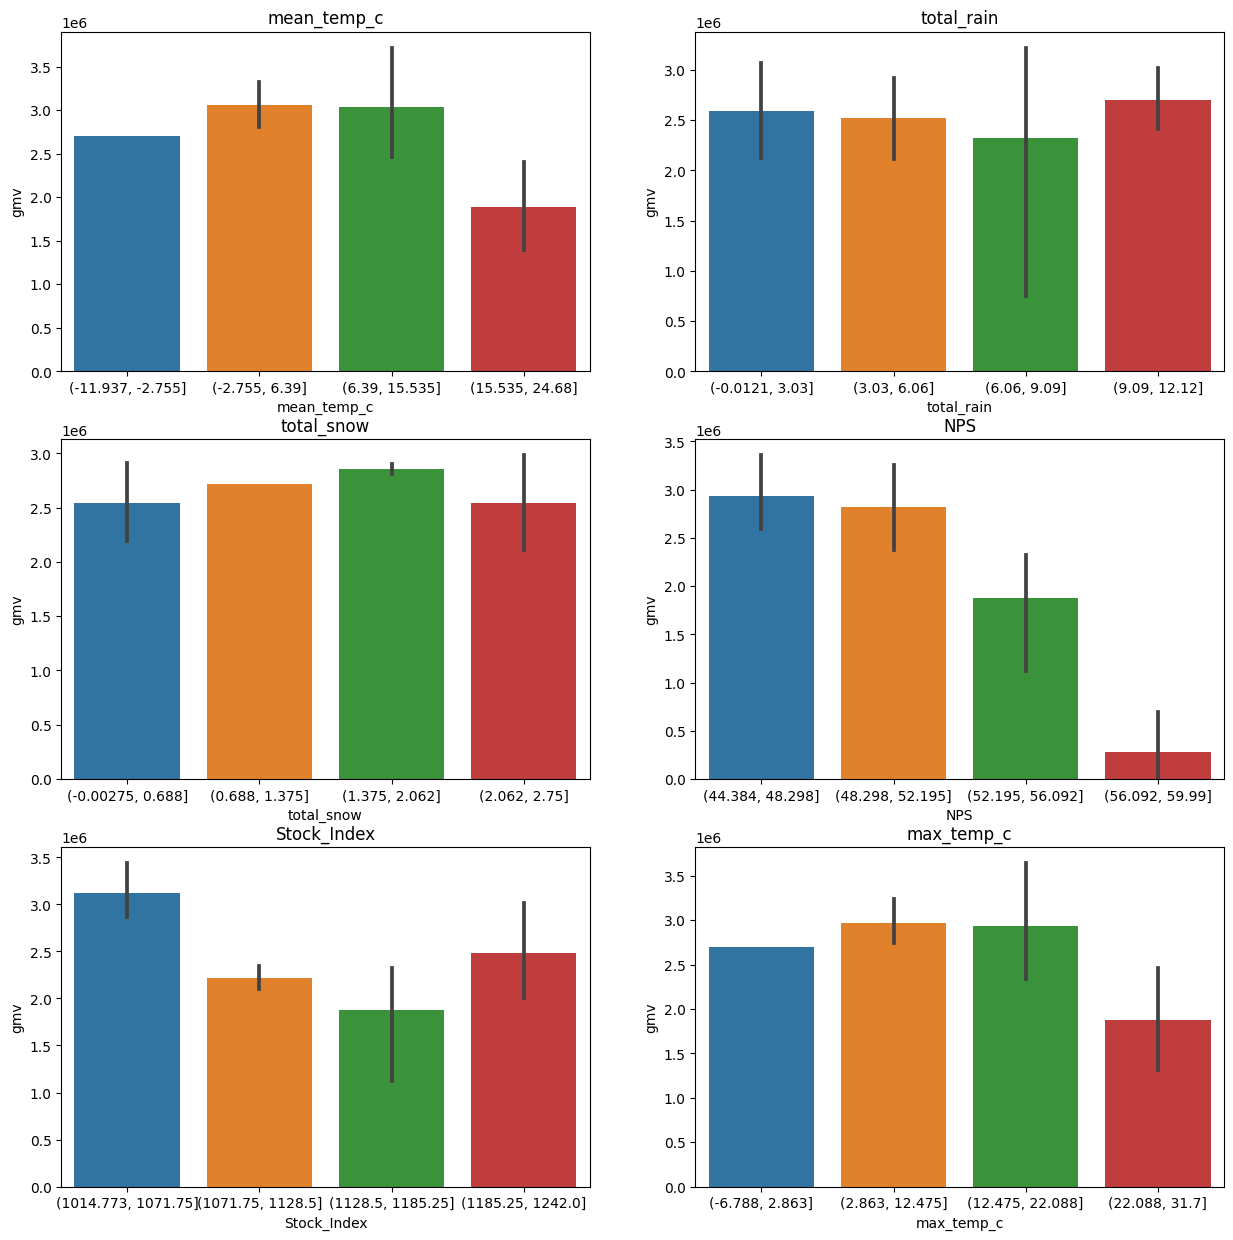

In [ ]:
wc = ['mean_temp_c', 'total_rain', 'total_snow','NPS',"Stock_Index",'max_temp_c']

plt.figure(figsize=(15, 15))
x=1
for i in wc:
  plt.subplot(3,2,x)
  plt.title(i)
  sns.barplot(y=game_wk['gmv'],x=pd.cut(game_wk[i],bins=4))
  x=x+1

  ## max temp can be kept


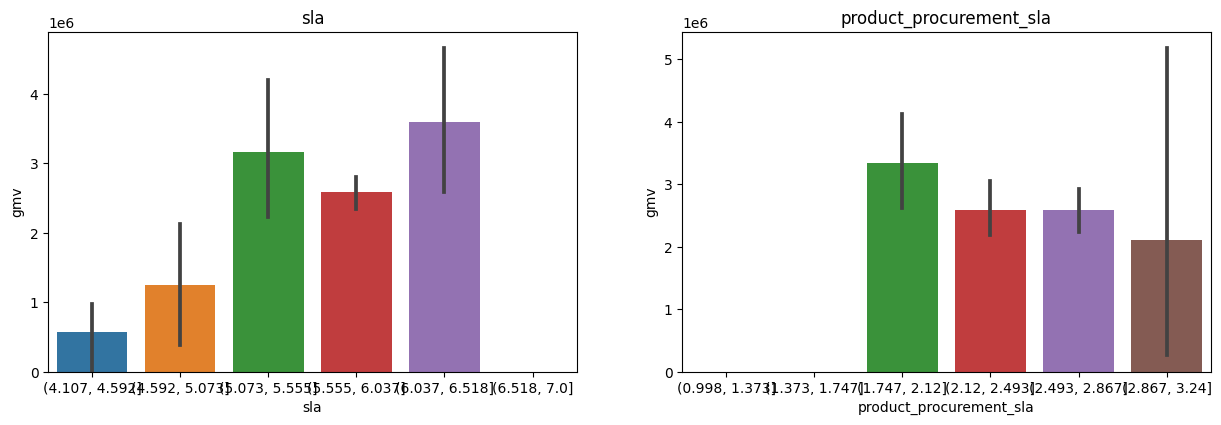

In [ ]:
wc = ['sla','product_procurement_sla']

plt.figure(figsize=(15, 15))
x=1
for i in wc:
  plt.subplot(3,2,x)
  plt.title(i)
  sns.barplot(y=game_wk['gmv'],x=pd.cut(game_wk[i],bins=6))
  x=x+1

## sla not required

In [434]:
game_wk.drop(['order_count','units','Other_AD','product_mrp','sla','total_snow','total_rain','cool_deg_c','max_temp_c','Affiliates_AD',
              'Digital_AD','Other_AD'],1,inplace=True)

In [435]:
df_train, df_test = train_test_split(game_wk, train_size = 0.7, test_size = 0.3, random_state = 100)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

scale_var=camera.columns
df_train[df_train.columns]=scaler.fit_transform(df_train[df_train.columns])
# df_train
X_train=df_train.drop('gmv',1)
y_train=df_train['gmv']


In [436]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=15, step=1)
selector.fit(X_train, y_train)


RFE(estimator=SVR(kernel='linear'), n_features_to_select=15)

In [437]:
df=pd.DataFrame(list(zip(X_train.columns,selector.support_,selector.ranking_)))
features =X_train.columns[selector.support_]
features


Index(['week', 'product_procurement_sla', 'listing_price', 'discount_per',
       'NPS', 'pay_day_in_wk', 'mean_temp_c', 'TV', 'Sponsorship',
       'Online marketing', 'Radio', 'TV_AD', 'Content_Marketing_AD',
       'Online_marketing_AD', 'SEM_AD'],
      dtype='object')

In [438]:
x_train_m =build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.737e+04
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           4.41e-44
Time:                        18:24:05   Log-Likelihood:                 204.29
No. Observations:                  37   AIC:                            -376.6
Df Residuals:                      21   BIC:                            -350.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features     VIF
9          Online marketing  608.66
13      Online_marketing_AD  568.21
11                    TV_AD  415.68
7                        TV  360.05
12     Content_Marketing_AD  231.33
14                   SEM_AD  190.17
2             listing_price  139.50
3              discount_per   83.19
8               Sponsorship   44.38
6               mean_temp_c   20.45
1   product_procurement_sla   18.85
4                       NPS   16.22
10                    Radio   14.73
0                      week   11.83
5             pay_day_in_wk    3.24

In [439]:
features=features.drop('Online marketing',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.102e+04
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           2.93e-46
Time:                        18:24:18   Log-Likelihood:                 203.52
No. Observations:                  37   AIC:                            -377.0
Df Residuals:                      22   BIC:                            -352.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features     VIF
10                    TV_AD  236.81
11     Content_Marketing_AD  224.66
7                        TV  191.30
13                   SEM_AD  182.58
2             listing_price  108.52
3              discount_per   69.82
8               Sponsorship   43.09
12      Online_marketing_AD   37.38
1   product_procurement_sla   18.83
6               mean_temp_c   18.61
4                       NPS   15.97
9                     Radio   14.15
0                      week   11.82
5             pay_day_in_wk    3.22

In [440]:
features=features.drop('TV_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.204e+04
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           3.69e-48
Time:                        18:24:25   Log-Likelihood:                 201.69
No. Observations:                  37   AIC:                            -375.4
Df Residuals:                      23   BIC:                            -352.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features     VIF
10     Content_Marketing_AD  182.57
12                   SEM_AD  149.80
2             listing_price  108.29
3              discount_per   68.29
11      Online_marketing_AD   36.72
8               Sponsorship   32.93
7                        TV   18.04
1   product_procurement_sla   14.97
0                      week   11.68
9                     Radio   11.42
6               mean_temp_c   11.35
4                       NPS   10.88
5             pay_day_in_wk    2.72

In [441]:
features=features.drop('Content_Marketing_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.588e+04
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           2.73e-50
Time:                        18:24:32   Log-Likelihood:                 200.74
No. Observations:                  37   AIC:                            -375.5
Df Residuals:                      24   BIC:                            -354.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
2             listing_price  79.16
3              discount_per  58.22
10      Online_marketing_AD  29.11
8               Sponsorship  27.66
1   product_procurement_sla  14.73
7                        TV  11.80
0                      week  11.63
6               mean_temp_c  11.23
4                       NPS  10.75
11                   SEM_AD   7.27
9                     Radio   3.21
5             pay_day_in_wk   2.72

In [442]:
features=features.drop('listing_price',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     30.78
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           8.66e-12
Time:                        18:24:39   Log-Likelihood:                 60.868
No. Observations:                  37   AIC:                            -97.74
Df Residuals:                      25   BIC:                            -78.41
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
9       Online_marketing_AD  27.71
7               Sponsorship  27.06
1   product_procurement_sla  14.44
6                        TV  11.80
0                      week  11.62
3                       NPS  10.55
2              discount_per  10.47
5               mean_temp_c  10.24
10                   SEM_AD   6.67
8                     Radio   2.93
4             pay_day_in_wk   2.69

In [443]:
features=features.drop('Online_marketing_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     34.25
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           1.95e-12
Time:                        18:25:12   Log-Likelihood:                 60.390
No. Observations:                  37   AIC:                            -98.78
Df Residuals:                      26   BIC:                            -81.06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
7              Sponsorship  23.75
1  product_procurement_sla  14.24
6                       TV  10.94
3                      NPS  10.54
2             discount_per  10.31
5              mean_temp_c   9.71
0                     week   9.05
9                   SEM_AD   6.45
4            pay_day_in_wk   2.39
8                    Radio   2.35

In [444]:
features=features.drop('Sponsorship',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     37.18
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           6.31e-13
Time:                        18:25:18   Log-Likelihood:                 59.343
No. Observations:                  37   AIC:                            -98.69
Df Residuals:                      27   BIC:                            -82.58
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
1  product_procurement_sla  13.16
2             discount_per  10.24
0                     week   8.67
6                       TV   7.25
3                      NPS   6.87
5              mean_temp_c   5.54
8                   SEM_AD   3.62
4            pay_day_in_wk   2.39
7                    Radio   1.92

In [445]:
features=features.drop('product_procurement_sla',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     42.33
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           1.25e-13
Time:                        18:25:26   Log-Likelihood:                 58.929
No. Observations:                  37   AIC:                            -99.86
Df Residuals:                      28   BIC:                            -85.36
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1023      0.058      1.757

Features   VIF
1   discount_per  5.56
4    mean_temp_c  5.48
0           week  5.00
5             TV  4.27
2            NPS  3.99
7         SEM_AD  3.62
3  pay_day_in_wk  2.37
6          Radio  1.78

In [446]:
features=features.drop('TV',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     50.10
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           1.69e-14
Time:                        18:25:38   Log-Likelihood:                 58.927
No. Observations:                  37   AIC:                            -101.9
Df Residuals:                      29   BIC:                            -88.97
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1044      0.044      2.370

Features   VIF
1   discount_per  5.55
4    mean_temp_c  5.39
2            NPS  3.97
0           week  3.70
6         SEM_AD  2.49
3  pay_day_in_wk  2.34
5          Radio  1.76

In [447]:
features=features.drop('pay_day_in_wk',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     60.24
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           2.17e-15
Time:                        18:25:48   Log-Likelihood:                 58.862
No. Observations:                  37   AIC:                            -103.7
Df Residuals:                      30   BIC:                            -92.45
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1030      0.043      2.386   

Features   VIF
3   mean_temp_c  5.36
1  discount_per  5.01
2           NPS  3.81
0          week  3.70
5        SEM_AD  2.49
4         Radio  1.75

In [448]:
features=features.drop('SEM_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     72.32
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           3.73e-16
Time:                        18:25:57   Log-Likelihood:                 58.311
No. Observations:                  37   AIC:                            -104.6
Df Residuals:                      31   BIC:                            -94.96
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0839      0.038      2.198   

Features   VIF
3   mean_temp_c  4.35
1  discount_per  3.56
0          week  3.51
2           NPS  3.17
4         Radio  1.71

In [449]:
features=features.drop('NPS',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     88.91
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           7.29e-17
Time:                        18:26:05   Log-Likelihood:                 57.488
No. Observations:                  37   AIC:                            -105.0
Df Residuals:                      32   BIC:                            -96.92
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0664      0.035      1.874   

Features   VIF
0          week  3.40
1  discount_per  3.35
2   mean_temp_c  2.19
3         Radio  1.63

In [452]:
features=features.drop('mean_temp_c',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     118.2
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           1.00e-17
Time:                        18:26:24   Log-Likelihood:                 56.911
No. Observations:                  37   AIC:                            -105.8
Df Residuals:                      33   BIC:                            -99.38
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0954      0.021      4.602   

Features   VIF
0          week  2.93
1  discount_per  2.93
2         Radio  1.43

                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                              431.7
Date:                Sat, 07 Oct 2023   Prob (F-statistic):                    5.50e-28
Time:                        18:18:29   Log-Likelihood:                          51.703
No. Observations:                  37   AIC:                                     -95.41
Df Residuals:                      33   BIC:                                     -88.96
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

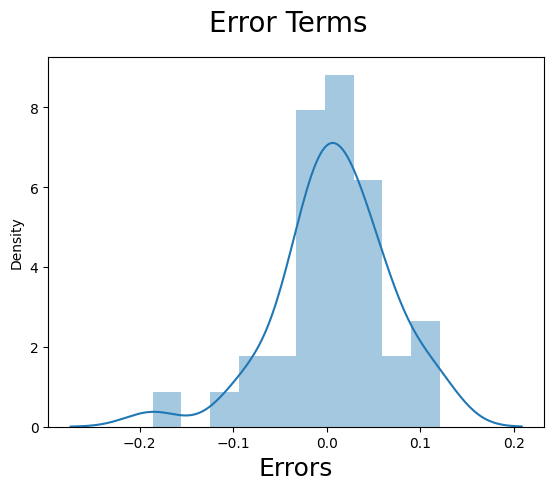

Text(0, 0.5, 'y_pred')

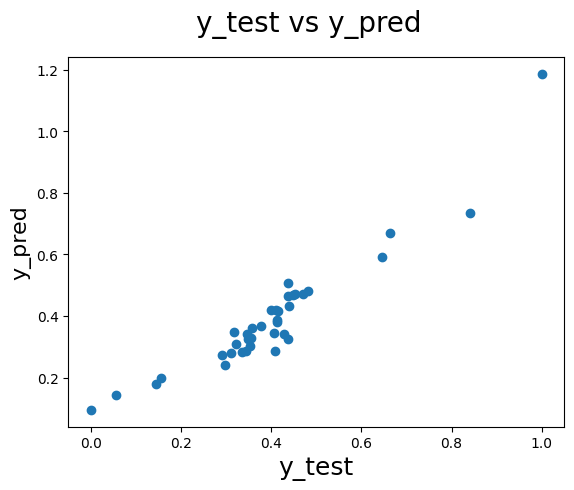

In [396]:
lm = sm.OLS(y_train,X_train[features]).fit() # fitting the model
print(lm.summary()) # model summary
y_train_pred=lm.predict(X_train[features])

fig=plt.figure()
sns.distplot((y_train-y_train_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train ,y_train_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)


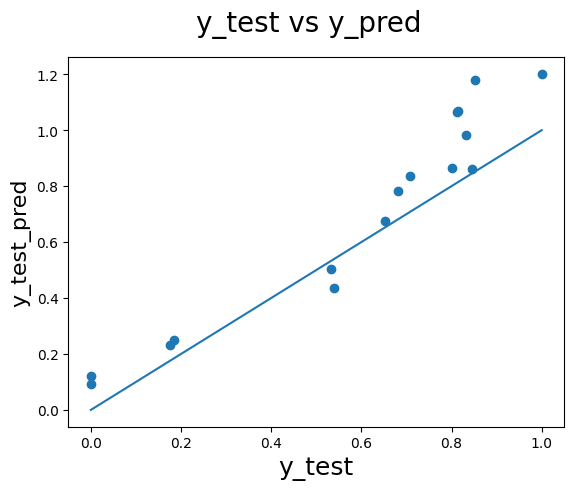

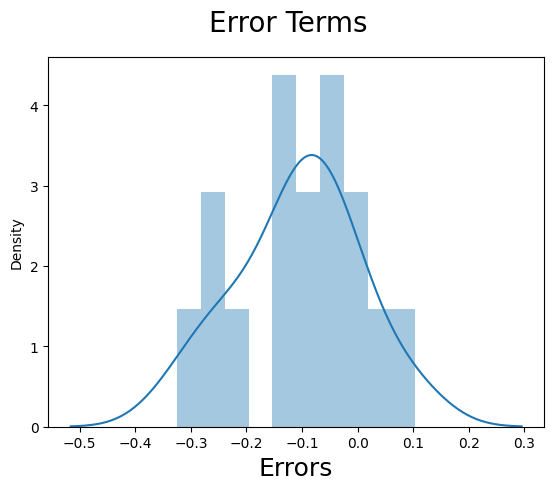

In [397]:
df_test[df_train.columns]=scaler.fit_transform(df_test[df_train.columns])
X_test=df_test.drop('gmv',1)
y_test=df_test['gmv']
X_test=sm.add_constant(X_test)
X_test=X_test[features]
y_test_pred=lm.predict(X_test)

# Plotting y_test and y_pred to understand the spread

fig,ax = plt.subplots()
ax.scatter(y_test, y_test_pred )
fig.suptitle('y_test vs y_pred', fontsize = 20)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])#,  lw=1)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

fig=plt.figure()
sns.distplot((y_test-y_test_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()


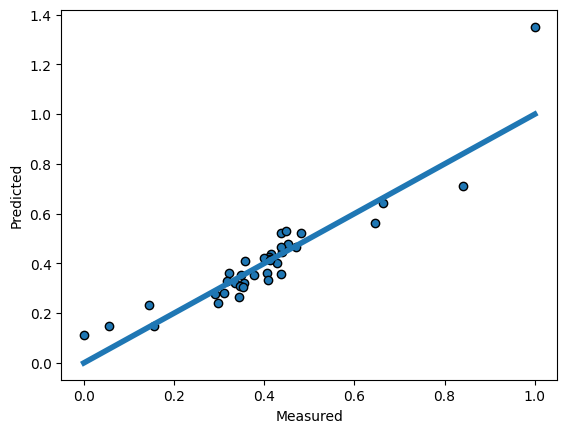

In [398]:
f = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train[features], y_train, scoring='r2', cv=f)
scores
y_pred = cross_val_predict(lm, X_train[features], y_train, cv=f)



fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],  lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
# game_wk=game.groupby(['week']).agg({"order_item_id":"nunique",'gmv':'sum','units':'sum','order_payment_type':'sum','sla':'mean',
#                                         'product_mrp':'sum','product_procurement_sla':'mean','listing_price':'sum',
#                                          'discount_per':'sum','Stock_Index':'max','NPS':'max','pay_date_flag':'max',
#                                           "Holiday_flag": "nunique",'sale_date':"nunique"}).round(2)

# game_wk=pd.merge(game_wk,weekly_kpis,on='week')

# game_wk.rename(columns={"sales_date":"num_of_sales"},inplace=True)

# game_wk.drop(['heat_deg_c','mon_temp_c','Year','Month','Day','Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
#        'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other'],1,inplace=True)

# game_wk.order_payment_type.value_counts()
# game_wk.rename(columns={'order_item_id':'order_count',"order_payment_type":"order_payment_cod",'mon_temp_c':"min_temp_c","pay_date_flag":"pay_day_in_wk"},inplace=True)
# game_wk["cod_per"]=game_wk["order_payment_cod"]/game_wk["order_count"]
# game_wk.drop("order_payment_cod",1,inplace=True)
# game_wk.rename(columns={'sale_date':"num_of_sales"},inplace=True)

# game_wk['sales_per']=(game_wk['num_of_sales']-1)/7
# game_wk.drop('num_of_sales',1,inplace=True)
# game_wk.drop(['order_count','units','Other_AD','product_mrp'],1,inplace=True)

In [399]:
# multiplicative
game_wk[game_wk.columns]=nm.log(game_wk[game_wk.columns])


In [400]:

game_wk=game_wk.replace([nm.inf, -nm.inf], 0)
game_wk=game_wk.fillna(0)

# game_wk.drop(['product_mrp','order_count','Other_AD','units'],1,inplace=True)

In [414]:
df_train, df_test = train_test_split(game_wk, train_size = 0.7, test_size = 0.3, random_state = 100)
scaler=MinMaxScaler()

scale_var=camera.columns
df_train[df_train.columns]=scaler.fit_transform(df_train[df_train.columns])
# df_train
X_train=df_train.drop('gmv',1)
y_train=df_train['gmv']
# X_train


In [416]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=15, step=1)
selector.fit(X_train, y_train)
df=pd.DataFrame(list(zip(X_train.columns,selector.support_,selector.ranking_)))
features =X_train.columns[selector.support_]
features


Index(['week', 'product_procurement_sla', 'listing_price', 'discount_per',
       'Stock_Index', 'NPS', 'mean_temp_c', 'Total_Investment_AD', 'TV_AD',
       'Content_Marketing_AD', 'Online_marketing_AD', 'SEM_AD', 'Radio_AD',
       'cod_per', 'sales_per'],
      dtype='object')

In [417]:
x_train_m =build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.380e+05
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           4.83e-53
Time:                        18:20:12   Log-Likelihood:                 246.15
No. Observations:                  37   AIC:                            -460.3
Df Residuals:                      21   BIC:                            -434.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features      VIF
3              discount_per  3983.94
2             listing_price  3453.54
7       Total_Investment_AD   920.99
10      Online_marketing_AD   885.43
11                   SEM_AD    62.97
0                      week    59.06
13                  cod_per    53.26
8                     TV_AD    41.82
9      Content_Marketing_AD    37.13
5                       NPS    22.64
14                sales_per    19.87
12                 Radio_AD    18.90
6               mean_temp_c    18.36
4               Stock_Index    17.34
1   product_procurement_sla    14.79

In [418]:
features=features.drop('listing_price',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     160.2
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           8.55e-19
Time:                        18:20:17   Log-Likelihood:                 102.58
No. Observations:                  37   AIC:                            -175.2
Df Residuals:                      22   BIC:                            -151.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features     VIF
6       Total_Investment_AD  739.48
9       Online_marketing_AD  718.44
2              discount_per  116.06
10                   SEM_AD   51.32
12                  cod_per   51.11
0                      week   49.59
7                     TV_AD   39.87
8      Content_Marketing_AD   36.64
4                       NPS   22.41
11                 Radio_AD   18.83
5               mean_temp_c   18.35
13                sales_per   17.16
3               Stock_Index   16.60
1   product_procurement_sla   11.87

In [419]:
features=features.drop('Total_Investment_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     145.3
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           7.10e-19
Time:                        18:20:21   Log-Likelihood:                 98.628
No. Observations:                  37   AIC:                            -169.3
Df Residuals:                      23   BIC:                            -146.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features     VIF
8       Online_marketing_AD  152.56
2              discount_per  113.45
11                  cod_per   50.92
0                      week   49.59
7      Content_Marketing_AD   36.48
6                     TV_AD   35.63
9                    SEM_AD   23.85
4                       NPS   22.15
10                 Radio_AD   17.05
12                sales_per   17.01
5               mean_temp_c   13.05
1   product_procurement_sla   11.25
3               Stock_Index    8.81

In [420]:
features=features.drop('Online_marketing_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     164.3
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           5.37e-20
Time:                        18:20:25   Log-Likelihood:                 98.627
No. Observations:                  37   AIC:                            -171.3
Df Residuals:                      24   BIC:                            -150.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
10                  cod_per  50.55
0                      week  44.88
2              discount_per  39.95
7      Content_Marketing_AD  36.43
6                     TV_AD  29.95
8                    SEM_AD  23.79
9                  Radio_AD  16.82
4                       NPS  15.77
11                sales_per  14.83
5               mean_temp_c  12.99
1   product_procurement_sla  11.03
3               Stock_Index   8.54

In [421]:
features=features.drop('cod_per',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     180.9
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           5.60e-21
Time:                        18:20:29   Log-Likelihood:                 98.051
No. Observations:                  37   AIC:                            -172.1
Df Residuals:                      25   BIC:                            -152.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
0                      week  38.88
2              discount_per  38.22
6                     TV_AD  29.76
9                  Radio_AD  15.86
8                    SEM_AD  15.60
10                sales_per  14.40
4                       NPS  11.51
1   product_procurement_sla  11.03
7      Content_Marketing_AD  10.68
5               mean_temp_c   8.88
3               Stock_Index   8.47

In [422]:
features=features.drop('week',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     173.1
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           3.67e-21
Time:                        18:20:32   Log-Likelihood:                 94.797
No. Observations:                  37   AIC:                            -167.6
Df Residuals:                      26   BIC:                            -149.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
1             discount_per  18.90
7                   SEM_AD  14.77
8                 Radio_AD  14.74
9                sales_per  13.86
3                      NPS  11.49
5                    TV_AD  11.41
6     Content_Marketing_AD  10.00
0  product_procurement_sla   9.83
4              mean_temp_c   8.73
2              Stock_Index   8.12

In [423]:
features=features.drop('SEM_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     197.5
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           2.91e-22
Time:                        18:20:45   Log-Likelihood:                 94.589
No. Observations:                  37   AIC:                            -169.2
Df Residuals:                      27   BIC:                            -153.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
1             discount_per  18.90
7                 Radio_AD  14.73
8                sales_per  13.62
5                    TV_AD  10.85
0  product_procurement_sla   9.44
4              mean_temp_c   7.30
2              Stock_Index   6.68
6     Content_Marketing_AD   6.51
3                      NPS   3.98

In [424]:
features=features.drop('Radio_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     223.4
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           2.80e-23
Time:                        18:20:51   Log-Likelihood:                 94.030
No. Observations:                  37   AIC:                            -170.1
Df Residuals:                      28   BIC:                            -155.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
1             discount_per  18.49
7                sales_per  12.20
5                    TV_AD  10.69
0  product_procurement_sla   9.14
4              mean_temp_c   7.08
2              Stock_Index   6.67
6     Content_Marketing_AD   6.34
3                      NPS   3.95

In [425]:
features=features.drop('sales_per',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     241.3
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           6.08e-24
Time:                        18:21:15   Log-Likelihood:                 92.360
No. Observations:                  37   AIC:                            -168.7
Df Residuals:                      29   BIC:                            -155.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
1             discount_per  16.77
5                    TV_AD   9.69
0  product_procurement_sla   9.13
4              mean_temp_c   6.98
2              Stock_Index   6.51
6     Content_Marketing_AD   6.33
3                      NPS   3.83

In [426]:
features=features.drop('TV_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     288.1
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           3.98e-25
Time:                        18:21:31   Log-Likelihood:                 92.161
No. Observations:                  37   AIC:                            -170.3
Df Residuals:                      30   BIC:                            -159.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Features    VIF
1             discount_per  10.40
0  product_procurement_sla   8.84
4              mean_temp_c   6.98
2              Stock_Index   6.46
5     Content_Marketing_AD   6.31
3                      NPS   3.73

In [427]:
features=features.drop('product_procurement_sla',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     350.5
Date:                Sat, 07 Oct 2023   Prob (F-statistic):           2.64e-26
Time:                        18:21:37   Log-Likelihood:                 91.819
No. Observations:                  37   AIC:                            -171.6
Df Residuals:                      31   BIC:                            -162.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0204 

Features   VIF
0          discount_per  6.88
3           mean_temp_c  6.77
1           Stock_Index  6.31
4  Content_Marketing_AD  4.73
2                   NPS  3.34

In [ ]:
features=features.drop('product_procurement_sla',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          2.787e+04
Date:                Fri, 06 Oct 2023   Prob (F-statistic):                    9.08e-57
Time:                        18:23:05   Log-Likelihood:                          88.500
No. Observations:                  37   AIC:                                     -173.0
Df Residuals:                      35   BIC:                                     -169.8
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

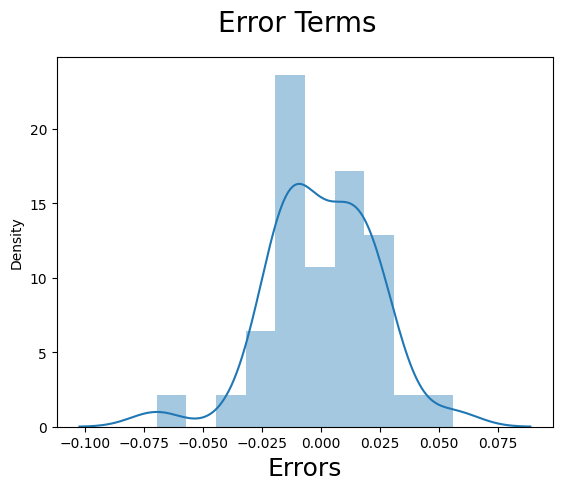

Text(0, 0.5, 'y_pred')

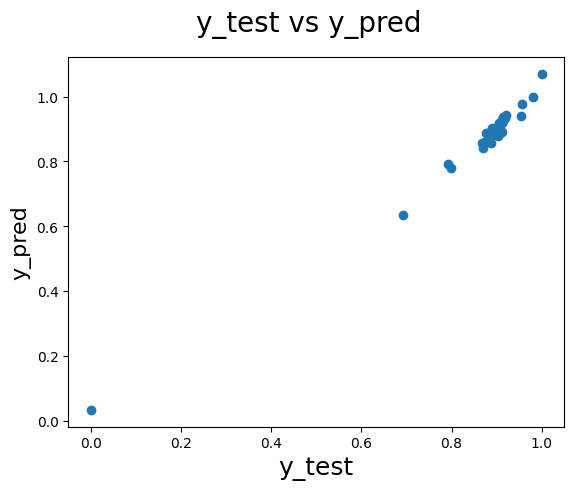

In [ ]:
lm = sm.OLS(y_train,X_train[features]).fit() # fitting the model
print(lm.summary()) # model summary
y_train_pred=lm.predict(X_train[features])

fig=plt.figure()
sns.distplot((y_train-y_train_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train ,y_train_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)


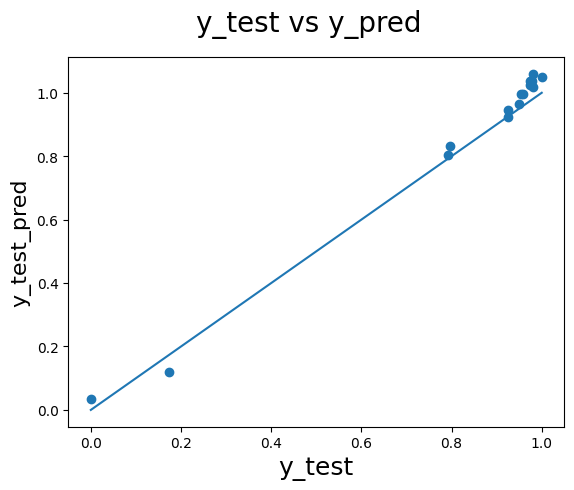

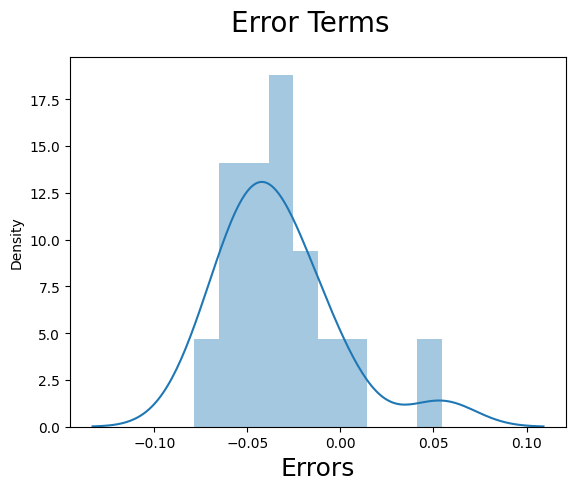

In [ ]:
df_test[df_train.columns]=scaler.fit_transform(df_test[df_train.columns])
X_test=df_test.drop('gmv',1)
y_test=df_test['gmv']
X_test=sm.add_constant(X_test)
X_test=X_test[features]
y_test_pred=lm.predict(X_test)

# Plotting y_test and y_pred to understand the spread

fig,ax = plt.subplots()
ax.scatter(y_test, y_test_pred )
fig.suptitle('y_test vs y_pred', fontsize = 20)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])#,  lw=1)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

fig=plt.figure()
sns.distplot((y_test-y_test_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()


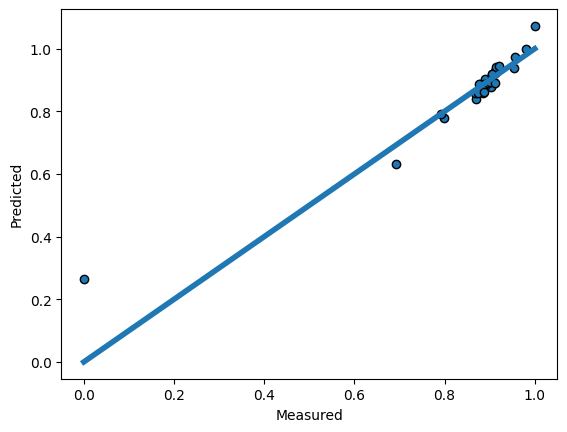

In [ ]:
f = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train[features], y_train, scoring='r2', cv=f)
scores
y_pred = cross_val_predict(lm, X_train[features], y_train, cv=f)



fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],  lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()